In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [0]:
true = '''ADP ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT NOUN PUNCT PUNCT ADP PROPN PUNCT NOUN DET CCONJ NOUN PROPN PROPN PROPN PUNCT ADP ADJ ADP ADJ NOUN PUNCT NOUN ADP ADJ NOUN PUNCT ADP NOUN NOUN DET ADJ PUNCT ADJ NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT NOUN PUNCT PUNCT VERB NOUN PUNCT ADJ NOUN CCONJ ADJ NOUN PUNCT ADP PROPN ADP NOUN CCONJ ADP ADJ NOUN PUNCT DET ADJ NOUN CCONJ ADJ NOUN PUNCT ADP DET NOUN PUNCT VERB ADP DET ADJ NOUN NOUN ADP NUM NOUN PUNCT ADP NOUN ADJ CCONJ ADP ADJ NOUN PUNCT DET PUNCT ADP NOUN CCONJ ADJ NOUN PUNCT SCONJ PRON NOUN CCONJ NOUN ADJ PART VERB PUNCT CCONJ VERB DET NOUN ADJ ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADJ NOUN PUNCT DET PUNCT ADP ADJ NOUN PUNCT CCONJ ADP PROPN VERB DET NOUN NOUN DET PART PUNCT ADV PUNCT ADV PUNCT PART VERB ADP DET DET ADJ NOUN NOUN CCONJ PART VERB NOUN PUNCT CCONJ SCONJ NOUN PUNCT ADJ NOUN CCONJ ADJ NOUN PUNCT ADP DET NOUN ADJ DET NOUN VERB PART VERB PUNCT CCONJ ADP PRON VERB NOUN ADP NUM NOUN ADP NOUN PUNCT CCONJ NOUN ADP DET NOUN PUNCT ADP NOUN PUNCT DET NOUN VERB PART VERB PUNCT CCONJ ADP DET ADJ NOUN ADP NOUN VERB NOUN ADJ NOUN NOUN PUNCT NUM NOUN VERB PUNCT SCONJ ADJ NOUN ADP PRON PART ADP PRON PART VERB PUNCT CCONJ SCONJ VERB ADJ NOUN ADP PROPN ADP NOUN VERB PUNCT CCONJ NOUN CCONJ ADJ VERB PRON PART NOUN ADP ADJ PUNCT ADP NOUN CCONJ ADP NOUN PUNCT SCONJ ADV ADP PROPN NOUN PART VERB PUNCT CCONJ SCONJ NOUN CCONJ ADJ NOUN AUX ADP NOUN VERB PUNCT CCONJ VERB NOUN PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP PROPN VERB PUNCT CCONJ ADP PRON NOUN ADP NUM NOUN PUNCT ADP NUM NOUN PUNCT VERB VERB ADP NOUN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ ADP ADJ NOUN PUNCT NOUN ADP ADJ NOUN PUNCT ADP NOUN NOUN DET ADJ PUNCT ADJ NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT DET ADJ CCONJ ADJ CCONJ ADJ PROPN NOUN PUNCT ADP ADJ NOUN PUNCT VERB PUNCT VERB ADP NOUN PUNCT ADP ADJ NOUN CCONJ ADP ADJ NOUN PUNCT VERB PUNCT CCONJ ADJ PUNCT CCONJ ADJ PUNCT CCONJ ADJ PUNCT CCONJ ADJ PUNCT CCONJ ADJ NOUN PUNCT CCONJ NOUN NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN PUNCT CCONJ PRON VERB ADJ NOUN CCONJ ADJ NOUN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADP NOUN PUNCT CCONJ ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ ADP DET ADJ NOUN PUNCT ADJ NOUN PUNCT PRON PRON VERB ADP DET PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ ADP DET ADP ADJ NOUN PUNCT ADP ADJ NOUN CCONJ NOUN VERB CCONJ ADV ADP ADJ NOUN DET NOUN PART VERB PUNCT CCONJ SCONJ ADP PRON NOUN PUNCT ADP DET PRON ADJ NOUN NOUN PUNCT DET ADJ ADJ NOUN ADP ADJ ADJ NOUN PUNCT ADP ADJ CCONJ ADP ADJ NOUN PRON VERB PUNCT CCONJ DET ADJ NOUN VERB DET PART NOUN ADP PRON NUM VERB PUNCT CCONJ ADP DET ADJ ADJ ADJ NOUN PUNCT ADP NOUN ADJ NOUN PUNCT ADP ADJ CCONJ ADP ADJ NOUN PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN VERB CCONJ ADV VERB ADP ADJ NOUN ADJ NOUN PUNCT ADP ADJ ADP NOUN PUNCT CCONJ ADP PRON ADJ CCONJ ADJ NOUN VERB ADJ NOUN ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ ADJ NOUN PUNCT CCONJ VERB PRON DET NOUN ADP NOUN DET ADP NOUN PUNCT CCONJ DET NOUN VERB ADP PRON PUNCT ADP DET ADJ NOUN PUNCT ADP ADJ PUNCT CCONJ ADP NOUN PART VERB DET NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ CCONJ ADJ CCONJ ADP NOUN NOUN PUNCT CCONJ ADP ADJ CCONJ ADJ NOUN ADP PROPN ADJ NOUN PART VERB PUNCT CCONJ ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN PUNCT CCONJ DET NOUN PUNCT VERB NOUN DET PUNCT SCONJ ADV ADP DET ADJ CCONJ ADJ NOUN ADP NOUN CCONJ ADP NOUN ADJ NOUN PART VERB PUNCT CCONJ ADJ NOUN ADP DET NOUN VERB PUNCT CCONJ ADJ NOUN AUX ADP NOUN ADP NOUN ADP ADJ NOUN PUNCT ADP ADJ NOUN ADV PUNCT CCONJ ADP NOUN NOUN VERB ADP ADJ PUNCT ADP ADJ NOUN PUNCT ADP NOUN ADV PUNCT ADP ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ CCONJ ADJ NOUN PUNCT VERB ADP NOUN NOUN PUNCT PRON ADP DET VERB PUNCT CCONJ NOUN ADP ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ DET ADJ NOUN PUNCT VERB ADP ADJ NOUN ADP ADJ NOUN CCONJ ADP DET ADJ ADJ NOUN PUNCT CCONJ DET DET ADJ NOUN NOUN ADP NOUN ADJ CCONJ ADJ NOUN VERB DET ADV CCONJ ADP ADJ NOUN VERB PART ADV PUNCT SCONJ PRON PUNCT VERB ADP PRON DET ADJ NOUN NOUN CCONJ ADJ NOUN PUNCT ADP DET NOUN NOUN CCONJ NOUN PUNCT ADJ NOUN CCONJ ADJ NOUN PUNCT PRON ADP PRON VERB ADV PUNCT ADP ADJ NOUN PUNCT VERB ADP DET NOUN PUNCT ADV PUNCT ADP NOUN PUNCT ADP PRON PUNCT ADV ADP DET VERB ADP NOUN ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP DET PUNCT ADP NOUN PUNCT PRON VERB ADP ADJ NOUN PUNCT ADJ NOUN VERB PUNCT CCONJ ADP ADJ NOUN PUNCT ADP NOUN NOUN PART DET ADJ PUNCT ADJ NOUN ADJ NOUN PUNCT VERB PUNCT ADP NOUN DET ADJ NOUN NOUN ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP VERB PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ ADJ NOUN PUNCT ADJ NOUN ADP ADJ CCONJ ADP ADJ NOUN VERB PUNCT ADP ADJ NOUN PUNCT ADP ADJ ADJ NOUN PUNCT ADJ NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN VERB VERB PUNCT VERB ADP NOUN CCONJ ADP NOUN PUNCT CCONJ VERB CCONJ VERB DET NOUN ADJ CCONJ ADJ NOUN ADJ PUNCT ADJ NOUN CCONJ ADJ ADJ NOUN PUNCT ADP NOUN CCONJ ADP NOUN DET ADJ CCONJ ADJ NOUN PUNCT PRON PRON ADP PRON VERB PUNCT SCONJ ADJ CCONJ ADJ NOUN ADP ADJ ADP NOUN PUNCT CCONJ ADJ ADP ADJ ADP NOUN PART AUX PUNCT CCONJ ADP DET ADP PRON ADJ NOUN CCONJ ADJ ADJ NOUN CCONJ NOUN VERB VERB ADV PUNCT SCONJ PRON ADP NOUN PART AUX PUNCT CCONJ VERB VERB DET NOUN ADJ NOUN PUNCT ADP DET CCONJ ADP ADJ NOUN PUNCT CCONJ DET NOUN VERB ADP ADJ NOUN ADV ADP NOUN PUNCT CCONJ SCONJ DET ADJ CCONJ ADJ NOUN PUNCT ADP NOUN DET NOUN PUNCT ADP ADJ ADJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT ADP PRON VERB VERB CCONJ VERB PART VERB PUNCT CCONJ ADP ADJ NOUN PUNCT ADP PRON NOUN PUNCT VERB NOUN ADP NUM NOUN ADP NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN VERB NOUN PUNCT SCONJ ADP DET NOUN PRON ADP ADJ PART AUX PUNCT CCONJ ADP ADJ NOUN PUNCT ADP DET ADJ NOUN NOUN CCONJ ADP ADJ NOUN PUNCT ADP ADJ CCONJ ADP ADJ NOUN ADJ NOUN VERB VERB DET NOUN ADJ CCONJ ADJ NOUN PUNCT VERB ADP PRON ADJ NOUN CCONJ ADJ NOUN PUNCT PRON PRON VERB PUNCT ADP ADJ CCONJ ADP ADJ CCONJ ADP ADJ NOUN PUNCT NUM ADP DET NOUN ADJ PUNCT CCONJ ADP NOUN DET ADJ NOUN PUNCT CCONJ VERB VERB ADP PRON NOUN PUNCT VERB ADP NOUN CCONJ ADP NOUN PUNCT ADV PUNCT CCONJ ADP NUM CCONJ ADP NUM NOUN PUNCT CCONJ ADP DET NOUN VERB ADV PUNCT NUM ADP DET NOUN PRON NOUN DET NOUN VERB VERB PUNCT SCONJ ADJ CCONJ ADJ NOUN ADP ADJ CCONJ ADJ NOUN NOUN ADP NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN ADP ADJ CCONJ ADJ NOUN ADP NOUN CCONJ PRON AUX ADP ADJ PART AUX PUNCT CCONJ SCONJ PUNCT ADP DET PRON NOUN CCONJ ADP NOUN PUNCT ADJ VERB DET NOUN DET NOUN ADP NOUN PUNCT CCONJ ADJ DET DET NOUN ADP DET ADJ NOUN VERB PART VERB PUNCT ADP DET PUNCT SCONJ ADJ AUX PUNCT NUM ADP PRON ADP PRON NOUN PUNCT ADP PRON NOUN PUNCT VERB VERB PUNCT CCONJ SCONJ PUNCT ADP ADJ NOUN PUNCT VERB ADJ DET NOUN CCONJ ADJ PRON NOUN PUNCT CCONJ ADP PRON VERB VERB PRON NOUN CCONJ NOUN ADJ PUNCT CCONJ NUM ADP PRON ADV PUNCT ADP NOUN PRON PUNCT PRON VERB ADP PRON PUNCT VERB VERB ADJ NOUN PUNCT CCONJ PRON DET VERB VERB ADJ NOUN CCONJ ADP NOUN ADJ NOUN VERB ADP ADJ NOUN PUNCT CCONJ ADP DET NOUN VERB ADP DET NOUN ADV PUNCT PRON ADJ NOUN VERB PUNCT CCONJ PRON PART VERB PUNCT SCONJ ADV ADP DET ADV AUX VERB PUNCT CCONJ ADJ NOUN PUNCT ADP NOUN CCONJ NOUN ADJ NOUN PUNCT VERB VERB ADP ADJ NOUN ADJ NOUN PUNCT CCONJ NOUN CCONJ NOUN DET NOUN CCONJ NOUN VERB ADP PRON PUNCT ADP NOUN CCONJ ADP NOUN PUNCT CCONJ PART VERB PART ADP PRON PUNCT CCONJ PART ADP DET ADJ NOUN ADJ NOUN PART VERB PART PUNCT CCONJ DET ADJ NOUN ADP ADJ CCONJ ADJ NOUN VERB VERB PRON ADJ NOUN ADP DET NOUN CCONJ PART VERB PRON PUNCT SCONJ DET NOUN ADP NOUN ADV PART AUX PUNCT CCONJ ADP PRON ADV ADP NOUN ADJ NOUN VERB AUX PUNCT CCONJ DET NOUN VERB NOUN ADP NOUN PUNCT CCONJ SCONJ DET ADJ NOUN CCONJ ADJ NOUN VERB ADJ PUNCT CCONJ ADJ NOUN VERB PART VERB PUNCT CCONJ ADP DET NOUN ADJ NOUN VERB VERB ADP DET NOUN PUNCT CCONJ ADP NOUN ADP ADJ CCONJ ADP ADJ NOUN ADP DET PART ADJ NOUN NOUN PUNCT DET VERB ADP DET NOUN PUNCT ADP NOUN PUNCT ADP ADJ CCONJ ADP ADJ CCONJ ADP ADJ PUNCT ADP ADJ NOUN PUNCT ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ PROPN ADP NOUN ADJ CCONJ ADJ NOUN CCONJ DET NOUN VERB PUNCT CCONJ NOUN DET VERB ADJ NOUN ADV PUNCT CCONJ ADP NOUN DET DET NOUN VERB ADP PROPN PUNCT ADP DET NOUN PUNCT ADV PUNCT ADP NOUN PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP DET NOUN VERB PART VERB PUNCT CCONJ PART ADP DET NOUN DET NOUN PART VERB PUNCT CCONJ ADP ADJ NOUN VERB PUNCT ADP ADJ NOUN PUNCT DET PART NOUN NOUN PUNCT CCONJ ADP ADJ ADP ADJ CCONJ ADP ADJ NOUN PUNCT ADP DET ADJ NOUN NOUN PUNCT CCONJ ADP NOUN PROPN ADJ DET ADJ ADJ NOUN CCONJ DET ADJ NOUN NOUN PUNCT VERB DET ADJ NOUN NOUN ADP PROPN ADP NOUN PUNCT CCONJ ADP ADJ NOUN NOUN VERB PUNCT ADP ADJ NOUN CCONJ ADP ADJ NOUN PUNCT ADJ NOUN CCONJ ADJ DET NOUN VERB ADP ADJ NOUN PUNCT ADJ NOUN CCONJ NOUN PUNCT PRON ADP DET NOUN ADJ NOUN ADP PRON VERB PUNCT CCONJ VERB PRON DET NOUN ADP NOUN ADP NUM NOUN PUNCT ADP NOUN PUNCT ADJ NOUN ADP NOUN PUNCT ADJ ADP NOUN PUNCT DET ADP NOUN NOUN PUNCT CCONJ PRON ADP PRON ADP NOUN DET NOUN AUX ADJ PUNCT CCONJ ADP DET NOUN PRON VERB PART VERB PUNCT CCONJ ADP NOUN DET NOUN VERB PRON ADP ADJ NOUN PUNCT PRON PART ADJ NOUN PUNCT DET NOUN PUNCT CCONJ DET NOUN VERB PRON ADP NOUN ADV PUNCT SCONJ PRON ADP NOUN ADV PART AUX PUNCT CCONJ NOUN PUNCT ADP PRON NOUN PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT VERB CCONJ DET ADP NOUN CCONJ ADP ADJ NOUN DET NOUN VERB ADV PART VERB PUNCT CCONJ ADP ADJ PART ADP ADJ CCONJ ADP ADJ NOUN PUNCT ADP NOUN ADJ NOUN PROPN PROPN PROPN CCONJ PROPN PUNCT ADJ ADJ NOUN CCONJ ADJ NOUN NOUN PUNCT VERB PUNCT PROPN PUNCT ADJ ADJ NOUN CCONJ ADJ NOUN PUNCT ADP NOUN PUNCT ADJ NOUN PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN PUNCT VERB ADP PRON VERB ADP ADJ NOUN ADJ CCONJ ADJ ADJ NOUN CCONJ ADJ NOUN PUNCT CCONJ VERB ADP PROPN ADP ADJ NOUN PUNCT ADP NOUN ADP NUM NOUN PUNCT ADJ NOUN ADP NOUN PUNCT CCONJ ADJ ADP NOUN NOUN PUNCT ADP ADJ NOUN PUNCT ADP DET NOUN PUNCT ADP NOUN CCONJ PART VERB NOUN PUNCT CCONJ NOUN VERB ADP NOUN ADJ NOUN PRON PART ADJ NOUN ADP ADJ NOUN PUNCT ADP NOUN PUNCT CCONJ ADP PRON ADP ADJ NOUN CCONJ ADP NOUN VERB ADJ NOUN PUNCT CCONJ NOUN ADV CCONJ ADV ADP NOUN DET NOUN VERB PART VERB PUNCT CCONJ ADP ADJ ADP ADJ NOUN PUNCT NOUN ADP ADJ NOUN PUNCT ADP DET ADJ NOUN NOUN PUNCT VERB PUNCT ADJ CCONJ ADJ NOUN ADP ADJ NOUN CCONJ ADP NOUN VERB PUNCT CCONJ ADP NOUN VERB PUNCT ADP NOUN ADJ ADJ NOUN PUNCT CCONJ ADP NOUN ADJ NOUN CCONJ NOUN PUNCT ADP PROPN ADP ADJ NOUN PUNCT CCONJ VERB DET NOUN ADP PROPN PRON PART NOUN CCONJ NOUN PUNCT ADP DET NOUN CCONJ ADP NOUN CCONJ ADP ADJ PUNCT ADP NOUN ADP NUM NOUN PUNCT ADP NOUN CCONJ ADP NOUN NOUN ADP ADJ NOUN PUNCT ADV SCONJ PRON NOUN ADP NOUN DET CCONJ CCONJ ADP NOUN VERB PUNCT SCONJ DET ADJ CCONJ ADJ NOUN ADP DET NOUN VERB PRON VERB ADP NOUN PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP NOUN DET NOUN PUNCT CCONJ ADP PROPN ADP NOUN ADV VERB DET NOUN PART VERB CCONJ DET ADJ NOUN NOUN ADP NOUN PUNCT ADP NOUN CCONJ ADP NOUN DET NOUN PUNCT ADP ADJ NOUN VERB PART VERB PUNCT CCONJ VERB VERB ADP ADJ NOUN CCONJ ADP NOUN NOUN CCONJ VERB NOUN ADJ PUNCT SCONJ ADJ NOUN CCONJ NOUN CCONJ NOUN DET NOUN PUNCT ADP NOUN PUNCT ADP DET NOUN PUNCT ADV VERB CCONJ ADP ADJ NOUN ADP PROPN VERB ADP NOUN PUNCT CCONJ SCONJ PRON ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT ADP PRON NOUN VERB PART ADJ NOUN PUNCT CCONJ PRON VERB AUX ADJ NOUN ADP NOUN CCONJ VERB AUX ADP NOUN ADP ADJ ADJ NOUN PUNCT CCONJ NOUN PRON CCONJ NOUN AUX VERB ADP PRON PART ADJ NOUN PUNCT CCONJ ADV VERB PRON ADJ NOUN PUNCT ADP DET NOUN PUNCT PRON VERB ADP ADJ PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ NOUN PUNCT ADJ NOUN CCONJ ADJ NOUN PUNCT ADP ADJ NOUN NOUN DET ADJ PUNCT ADJ NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT NOUN PUNCT CCONJ NOUN DET ADJ PUNCT ADJ PART NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT PUNCT NOUN PUNCT CCONJ ADP DET ADJ NOUN NOUN PART PUNCT DET VERB ADP ADJ NOUN PUNCT DET NOUN ADP NOUN CCONJ ADP NOUN ADJ CCONJ ADJ NOUN CCONJ ADJ DET ADJ NOUN PUNCT ADP ADJ NOUN ADP NOUN PUNCT CCONJ ADP ADJ ADJ NOUN ADP NOUN PUNCT ADV CCONJ ADV VERB PUNCT CCONJ ADP NOUN VERB PUNCT ADJ DET NOUN ADJ NOUN CCONJ ADJ NOUN CCONJ NOUN PUNCT ADP ADJ NOUN PUNCT ADP NOUN CCONJ ADJ NOUN PUNCT ADP NOUN DET ADJ CCONJ ADJ NOUN PUNCT CCONJ VERB ADP PRON ADP DET NOUN PUNCT VERB ADP NOUN CCONJ ADP NOUN PUNCT ADP PRON ADP ADJ PART DET ADJ NOUN NOUN PUNCT CCONJ VERB DET DET ADJ NOUN VERB ADP PROPN PUNCT ADP DET ADJ NOUN PUNCT PRON NOUN CCONJ NOUN CCONJ NOUN PUNCT ADP DET NOUN CCONJ ADP NOUN CCONJ ADP ADJ PUNCT ADP NOUN ADP NUM NOUN PUNCT ADP NOUN CCONJ ADP NOUN NOUN ADP ADJ NOUN PUNCT ADV PUNCT ADV PUNCT PART VERB ADP DET DET ADJ NOUN NOUN PUNCT CCONJ ADJ ADP DET NOUN PUNCT CCONJ PART VERB DET ADJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN DET ADJ NOUN PUNCT CCONJ NOUN ADP NOUN NOUN PUNCT VERB PRON NOUN CCONJ ADJ NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT ADP PRON NOUN PUNCT ADP NUM NOUN ADP NOUN CCONJ ADP NOUN ADJ PUNCT ADP ADJ NOUN ADJ NOUN PUNCT ADP PRON SCONJ PRON ADJ NOUN CCONJ ADJ NOUN ADP PRON ADP ADV VERB ADJ NOUN NOUN CCONJ NOUN CCONJ NOUN PART VERB PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP DET NOUN PUNCT CCONJ ADP DET ADJ NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT PART VERB CCONJ DET ADJ NOUN NOUN ADP PRON NOUN ADP NOUN CCONJ ADP NOUN DET NOUN ADV ADP ADJ ADJ NOUN PUNCT PART VERB PUNCT CCONJ PART ADP PRON PRON ADP DET ADJ NOUN ADJ NOUN CCONJ NOUN CCONJ NOUN PART VERB PUNCT ADP PRON PUNCT SCONJ PRON ADJ NOUN CCONJ ADJ NOUN ADP PRON NOUN CCONJ ADJ NOUN ADP DET NOUN CCONJ NOUN CCONJ NOUN CCONJ NOUN PART VERB PUNCT ADV SCONJ PART ADP ADJ NOUN DET NOUN PRON NOUN VERB PART VERB PART PUNCT ADP PRON PUNCT SCONJ PUNCT ADP PRON ADJ NOUN PUNCT VERB ADJ PUNCT ADP ADJ NOUN CCONJ ADP ADJ NOUN PUNCT ADJ NOUN CCONJ VERB ADP NOUN ADP PRON NOUN PUNCT CCONJ DET DET NOUN CCONJ NOUN PRON NOUN ADJ ADJ NOUN VERB CCONJ VERB ADJ NOUN PUNCT CCONJ CCONJ ADV PRON NOUN CCONJ ADJ NOUN PUNCT ADP ADJ NOUN NOUN CCONJ ADP ADJ ADP ADJ NOUN ADP NOUN PUNCT ADP DET ADJ NOUN VERB ADP PRON NOUN PUNCT ADJ ADJ NOUN CCONJ ADJ NOUN VERB ADP NOUN CCONJ ADP PROPN PART VERB PUNCT CCONJ ADP ADJ DET ADJ NOUN NOUN VERB ADP PRON NOUN ADP ADJ NOUN CCONJ ADP NOUN CCONJ NOUN PUNCT CCONJ SCONJ PRON ADJ NOUN CCONJ NOUN CCONJ NOUN DET NOUN VERB PUNCT ADP NOUN PUNCT ADP DET NOUN ADV CCONJ VERB ADP PROPN ADP ADJ NOUN ADP NOUN PUNCT CCONJ SCONJ PRON ADJ NOUN CCONJ NOUN CCONJ NOUN ADP NOUN PUNCT ADP ADJ ADP ADJ NOUN PUNCT ADV ADP DET NOUN PUNCT DET ADJ NOUN VERB PART ADJ NOUN PUNCT CCONJ PRON ADP DET AUX ADP ADJ NOUN PUNCT VERB NOUN CCONJ VERB AUX ADP NOUN CCONJ ADP NOUN ADP NOUN PUNCT ADP PROPN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN PRON CCONJ NOUN VERB AUX ADP PRON ADJ NOUN ADV PUNCT CCONJ ADP PRON PUNCT ADP DET NOUN PUNCT ADP NOUN VERB VERB DET ADJ NOUN NOUN PUNCT CCONJ ADP ADJ NOUN CCONJ ADP NOUN NOUN PUNCT PUNCT CCONJ SCONJ ADP PRON AUX DET ADJ NOUN NOUN VERB PUNCT CCONJ PRON AUX ADP DET DET ADJ NOUN NOUN VERB PUNCT CCONJ ADP DET NOUN ADJ CCONJ ADJ NOUN CCONJ ADJ NOUN ADP PRON ADJ NOUN ADV PART ADP PRON PART VERB PUNCT CCONJ ADP DET NOUN CCONJ ADP NOUN ADP DET NOUN ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT PRON ADJ NOUN CCONJ NOUN NOUN DET PART ADJ PART ADP PRON PRON PUNCT CCONJ ADV ADP PRON ADJ NOUN PUNCT DET NOUN CCONJ NOUN PART VERB PUNCT CCONJ DET DET ADJ NOUN NOUN ADV ADP NOUN VERB VERB ADP PROPN ADP ADJ NOUN ADP NOUN PUNCT CCONJ ADP ADJ ADJ NOUN PUNCT ADP NOUN DET ADJ NOUN CCONJ ADP DET ADJ PUNCT DET ADJ NOUN NOUN VERB PUNCT VERB PRON VERB ADP PRON ADP DET ADP ADJ DET ADJ NOUN NOUN PUNCT ADP PRON PUNCT CCONJ SCONJ PRON PRON ADJ NOUN CCONJ NOUN VERB ADP PRON DET NOUN VERB PUNCT CCONJ PRON VERB ADP PRON ADP PRON ADJ NOUN VERB PUNCT VERB ADP PROPN PUNCT NOUN ADJ PUNCT NOUN ADP ADJ NOUN PUNCT NOUN PUNCT NOUN PUNCT NOUN PROPN PROPN PUNCT VERB PROPN PROPN PUNCT NOUN PUNCT NUM PUNCT NOUN ADP ADJ NOUN PUNCT VERB ADJ NOUN NOUN NOUN PROPN PROPN PUNCT ADP NOUN PUNCT ADP NOUN VERB ADJ NOUN PUNCT ADP NOUN ADJ NOUN PUNCT NOUN CCONJ NOUN PROPN PROPN VERB ADP NOUN PUNCT ADP ADJ NOUN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN CCONJ ADP NOUN PUNCT VERB ADJ ADJ NOUN ADP DET NOUN PUNCT ADP NUM ADP NUM NOUN ADP NOUN PUNCT CCONJ DET NUM NOUN PUNCT CCONJ VERB ADP ADJ NOUN ADV ADJ PART NOUN PUNCT CCONJ SCONJ PRON DET NOUN ADV PART VERB PUNCT CCONJ DET NOUN VERB AUX ADP PRON ADV PUNCT PUNCT PUNCT NOUN PROPN PROPN PUNCT PUNCT NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN VERB NOUN NOUN DET ADJ CCONJ VERB NOUN ADJ NOUN NOUN PROPN PROPN PUNCT ADP ADJ NOUN ADP ADJ NOUN NOUN ADP ADJ NOUN VERB ADP PRON NOUN DET ADP NOUN NOUN PROPN PROPN ADJ PUNCT CCONJ VERB PRON NOUN DET VERB ADV PUNCT CCONJ DET ADJ NOUN PUNCT CCONJ VERB PRON VERB ADP NOUN PUNCT CCONJ VERB PRON NOUN ADP NOUN PUNCT CCONJ PRON DET NOUN PART VERB PUNCT CCONJ PRON PUNCT NOUN DET PUNCT PART VERB PRON NOUN CCONJ NOUN PUNCT VERB ADP NOUN ADP NOUN PUNCT CCONJ PRON VERB ADP PRON PUNCT CCONJ VERB PRON VERB NOUN PUNCT CCONJ PRON PUNCT NOUN DET ADP PRON VERB PUNCT CCONJ PRON VERB ADP DET NOUN PUNCT CCONJ VERB PUNCT CCONJ ADP DET PRON NOUN VERB PUNCT CCONJ ADP DET PRON NOUN DET VERB ADV CCONJ VERB ADP NOUN CCONJ ADP NOUN CCONJ DET ADJ NOUN NOUN PRON PART VERB ADJ NOUN PUNCT CCONJ ADP DET NOUN CCONJ ADP DET NOUN ADP NOUN PUNCT ADP ADJ NOUN ADV VERB PUNCT ADJ NOUN PUNCT NOUN PUNCT PUNCT VERB PRON ADJ PUNCT VERB NOUN PRON VERB ADP ADJ ADJ NOUN PUNCT SCONJ PRON ADJ NOUN DET PUNCT VERB ADP NOUN CCONJ ADP NOUN PUNCT ADP NOUN ADJ NOUN PART VERB PUNCT CCONJ ADP DET DET ADJ NOUN VERB PUNCT NOUN NOUN PUNCT VERB VERB PUNCT PUNCT X X X PUNCT PUNCT X PUNCT PUNCT ADJ NOUN NOUN ADP ADJ NOUN NOUN VERB PUNCT VERB ADP DET VERB PRON NOUN PUNCT PUNCT ADP ADJ NOUN PROPN PUNCT ADV ADV ADV ADJ PUNCT PUNCT ADJ NOUN ADP ADJ NOUN NOUN VERB PUNCT VERB ADP DET VERB NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN CCONJ PROPN PROPN VERB PRON NOUN PUNCT PUNCT X X PUNCT VERB ADP NOUN PUNCT ADP ADJ ADP ADJ NOUN NOUN ADP ADJ NOUN ADP NOUN NOUN ADJ NOUN ADP NOUN PROPN PROPN PROPN CCONJ ADP NOUN PROPN PROPN CCONJ CCONJ PROPN PROPN ADP ADJ NOUN VERB ADJ CCONJ ADP ADJ NOUN ADP NOUN NOUN PROPN PROPN PUNCT CCONJ ADP ADJ CCONJ ADJ NOUN VERB PUNCT ADP ADJ NOUN ADJ NOUN NOUN PROPN PROPN ADP NOUN NUM NOUN VERB NOUN PROPN PROPN NOUN PROPN PROPN PUNCT CCONJ VERB PUNCT VERB PART NOUN NOUN PRON NOUN PROPN PROPN NOUN PART PROPN PROPN ADP NOUN ADP ADJ NOUN ADP NOUN ADP ADJ PROPN ADP ADJ NOUN NOUN PUNCT CCONJ DET ADJ NOUN ADP PRON VERB ADP NOUN PUNCT CCONJ ADP NOUN VERB PUNCT SCONJ NOUN PRON PROPN PROPN VERB DET PROPN ADP PRON PUNCT SCONJ PROPN PROPN VERB ADP DET PROPN NOUN ADP NUM NOUN PUNCT CCONJ DET PART PROPN VERB PUNCT X X PUNCT ADP DET PROPN VERB ADP NOUN NOUN PUNCT CCONJ DET PROPN ADP DET PRON PROPN ADJ VERB NOUN ADP NOUN PUNCT CCONJ ADJ NOUN ADJ PROPN PROPN ADP NOUN VERB PUNCT VERB ADP NOUN PRON PROPN ADP NOUN NOUN PROPN PUNCT CCONJ VERB PART ADP DET PROPN DET PROPN VERB CCONJ VERB PUNCT CCONJ VERB PART VERB PRON ADP NOUN PUNCT CCONJ VERB VERB ADP NOUN PUNCT CCONJ PRON PART PROPN ADP DET PRON NOUN VERB ADP DET NOUN PUNCT CCONJ PRON PART ADP NOUN VERB PUNCT ADP PRON VERB ADP NOUN PUNCT CCONJ NOUN PRON DET PROPN VERB ADP NOUN PUNCT CCONJ ADP PRON ADP PRON AUX NOUN CCONJ NOUN PUNCT PRON PART VERB PUNCT CCONJ VERB PRON VERB ADP PRON ADP PRON ADP NOUN ADP NOUN PUNCT CCONJ DET NOUN PROPN PROPN ADP ADJ NOUN VERB PUNCT ADP PRON PRON PROPN PROPN VERB ADP NOUN NOUN PUNCT ADP DET NOUN CCONJ DET NOUN PUNCT CCONJ NOUN PROPN PROPN ADP NOUN VERB ADP NOUN PUNCT CCONJ VERB NOUN PROPN PROPN PUNCT VERB PART ADP PRON ADP NOUN DET NOUN PROPN NOUN PUNCT CCONJ VERB PRON VERB ADP NOUN PUNCT CCONJ NOUN PRON VERB DET ADJ NOUN PUNCT X X PUNCT CCONJ VERB DET PROPN DET PROPN VERB ADP NOUN PUNCT ADJ PART PUNCT CCONJ PRON PART PROPN VERB ADP NOUN ADP NOUN ADP NOUN PUNCT PRON ADP ADJ PROPN PUNCT ADP ADJ NOUN PUNCT ADP NOUN VERB PRON ADP NOUN ADP NOUN PUNCT CCONJ PRON ADP DET NOUN VERB PUNCT CCONJ VERB PRON PART NOUN PUNCT ADP NOUN ADP NOUN PUNCT CCONJ ADP NOUN NOUN ADJ NOUN DET PROPN PROPN VERB PART PUNCT CCONJ ADP NOUN VERB PUNCT ADP NOUN PUNCT CCONJ VERB NOUN PROPN PROPN PUNCT VERB PART PRON PROPN ADP ADJ NOUN ADP NOUN ADP PROPN PROPN PUNCT CCONJ VERB PART ADP PRON NOUN PROPN PROPN ADJ ADP NOUN ADV PUNCT CCONJ VERB PRON NOUN CCONJ NOUN ADP NOUN CCONJ VERB ADP NOUN PUNCT CCONJ PRON PART PROPN PROPN PUNCT VERB ADP NOUN CCONJ PRON ADP NOUN ADP ADJ VERB PUNCT CCONJ PRON PART PROPN ADP DET NOUN VERB PUNCT CCONJ PRON PART NOUN PROPN VERB PUNCT VERB ADP PRON ADP NOUN ADP ADJ NOUN ADJ NOUN NOUN PROPN PROPN ADP NOUN PUNCT SCONJ PRON VERB NOUN PROPN ADP NOUN ADP PRON PUNCT VERB PART PRON ADP PRON PROPN NOUN ADP NUM NOUN PUNCT CCONJ DET PART PROPN VERB ADP PRON VERB ADP NOUN NOUN PUNCT CCONJ PRON PROPN ADP DET PRON PROPN ADJ VERB NOUN ADP NOUN PUNCT PUNCT X X PUNCT CCONJ NOUN PROPN PROPN VERB PUNCT NOUN PART PRON ADP PRON PROPN PROPN ADP NOUN AUX PUNCT CCONJ VERB PART PRON PART ADP NOUN PUNCT ADP NOUN ADP NOUN PUNCT CCONJ NOUN NOUN PROPN PROPN ADP PRON ADV VERB PUNCT ADJ NOUN NOUN ADP ADJ NOUN NOUN VERB VERB VERB ADJ NOUN PUNCT ADV ADP PRON VERB NOUN PUNCT ADP NOUN SCONJ PRON PUNCT ADP PRON ADP NOUN PUNCT ADP DET NOUN VERB PRON PUNCT ADV CCONJ ADP NOUN PUNCT CCONJ ADP PRON VERB VERB PUNCT PUNCT X X PUNCT CCONJ ADP NOUN ADJ NOUN VERB NOUN CCONJ NOUN CCONJ ADJ CCONJ ADJ ADJ NOUN NOUN NUM NOUN CCONJ NUM NOUN NOUN PUNCT NUM NOUN PUNCT ADV NUM NOUN PUNCT PUNCT PUNCT ADV NOUN PROPN PROPN VERB NOUN PROPN PROPN ADP NOUN PUNCT CCONJ ADV ADP PRON VERB NOUN PUNCT CCONJ ADP DET NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADV PUNCT CCONJ ADP PRON ADP PRON NOUN VERB PUNCT PRON PRON PART VERB PUNCT PUNCT X X PUNCT ADP NOUN NUM NOUN NOUN VERB PUNCT VERB PRON ADP ADJ NOUN PUNCT CCONJ ADP PROPN NOUN PUNCT ADP PRON DET NOUN ADP NOUN VERB PUNCT SCONJ PART VERB DET NOUN PROPN PROPN ADP PROPN PROPN VERB NOUN PUNCT CCONJ ADP PART PRON ADP DET PROPN VERB NOUN PUNCT CCONJ SCONJ PART PROPN PROPN VERB ADP PRON PROPN ADP NOUN PUNCT CCONJ PROPN PART PROPN PUNCT VERB ADP PRON PROPN ADP NOUN PUNCT CCONJ VERB PRON ADP NOUN ADP NOUN PUNCT NUM NOUN NOUN VERB PUNCT VERB PART PRON ADP NOUN PUNCT SCONJ NOUN PROPN PROPN ADP PROPN VERB ADP NOUN PUNCT CCONJ ADV PRON PRON VERB CCONJ ADP DET NOUN PUNCT PRON PART VERB PUNCT ADP NOUN NOUN NOUN PROPN PROPN PROPN NOUN PROPN PROPN NOUN VERB PUNCT VERB PRON PUNCT SCONJ PROPN PROPN VERB ADP ADJ NOUN NOUN ADJ PUNCT CCONJ PRON PRON VERB PUNCT PRON PART VERB PUNCT CCONJ VERB PART ADV ADJ NOUN ADJ CCONJ VERB ADP NOUN PUNCT PUNCT X X PUNCT ADJ NOUN NOUN PROPN NOUN PROPN VERB PUNCT NOUN PART ADP ADJ NOUN VERB PRON ADP DET NOUN ADP NOUN PUNCT ADV NOUN PUNCT VERB ADP ADJ NOUN NOUN NUM NOUN PUNCT CCONJ ADP PRON PART ADP NOUN ADP NOUN ADV PUNCT CCONJ VERB PUNCT VERB VERB PUNCT CCONJ ADP NOUN PART ADJ PROPN VERB NOUN ADP NOUN PROPN PROPN PUNCT CCONJ PROPN PART PROPN VERB PROPN ADP NOUN PUNCT CCONJ VERB PART PRON ADP NOUN CCONJ ADP ADJ NOUN PROPN PUNCT SCONJ VERB DET PROPN ADP PROPN PROPN VERB NOUN PUNCT CCONJ NOUN PART AUX NUM NOUN PUNCT CCONJ ADP PRON PART ADP PRON VERB NOUN PUNCT PROPN VERB ADP NOUN PUNCT PUNCT X X PUNCT CCONJ ADJ NOUN NOUN ADP ADJ NOUN ADP ADJ PUNCT NOUN PUNCT NOUN NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN CCONJ PROPN PROPN NOUN PROPN PROPN PUNCT ADP DET PRON NOUN CCONJ ADP DET NOUN NOUN PROPN PROPN VERB ADP NOUN PUNCT ADP NOUN VERB PUNCT CCONJ NOUN PROPN PROPN ADP NOUN ADP NOUN ADP NOUN VERB PUNCT CCONJ VERB ADJ NOUN NOUN PROPN PROPN PUNCT ADP ADJ PART ADP ADJ NOUN VERB ADP PRON PROPN ADP NOUN NOUN PRON NOUN PART PROPN PROPN ADJ CCONJ VERB PRON PROPN VERB CCONJ VERB PRON ADP NOUN NOUN PUNCT CCONJ PRON PART PROPN VERB PRON ADP DET NOUN ADP NOUN PUNCT CCONJ PRON VERB NOUN PUNCT CCONJ PRON ADP PRON VERB PUNCT CCONJ VERB PRON PROPN DET PROPN PART NOUN CCONJ PART ADP DET NOUN PUNCT ADP NOUN ADP NOUN PUNCT PART VERB ADJ NOUN PUNCT VERB DET ADV PART ADP PRON NOUN ADP NOUN VERB ADP NOUN PUNCT PUNCT X X PUNCT CCONJ NOUN PROPN PROPN VERB PUNCT CCONJ ADP NOUN VERB DET PART NOUN PUNCT PRON PART ADP NOUN ADP NOUN PUNCT CCONJ ADJ PRON ADP NOUN ADP PRON PART VERB PUNCT CCONJ NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN CCONJ PROPN PROPN VERB ADJ CCONJ ADJ NOUN PRON VERB PUNCT CCONJ PRON PROPN ADP ADJ NOUN VERB NOUN PROPN PROPN VERB ADP PRON ADP NOUN PUNCT PUNCT X X PUNCT CCONJ ADJ NOUN NOUN ADP NUM NOUN ADP DET NOUN NOUN PUNCT NOUN PUNCT NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN CCONJ PROPN PROPN VERB PUNCT CCONJ NOUN PUNCT NOUN PUNCT VERB NOUN PUNCT VERB NOUN PUNCT PRON VERB NOUN ADJ NOUN ADJ ADP ADJ NOUN PUNCT PROPN PROPN ADP NOUN PUNCT NUM NOUN PUNCT VERB PUNCT ADP NOUN PROPN PROPN DET NOUN VERB PART PUNCT CCONJ ADP ADJ NOUN ADP PROPN PROPN ADP NOUN NOUN VERB PUNCT CCONJ NOUN ADP ADJ NOUN ADP NOUN NOUN ADJ NOUN NOUN PROPN PROPN PROPN CCONJ NOUN PUNCT PUNCT PUNCT ADJ NOUN NOUN PROPN PROPN VERB NOUN PUNCT CCONJ ADP NOUN VERB PUNCT PUNCT X X PUNCT NOUN ADJ NOUN ADP NUM NOUN ADP ADJ PUNCT NOUN PUNCT NOUN NOUN PROPN PROPN PROPN CCONJ NOUN PUNCT PUNCT PUNCT ADP ADJ NOUN ADP NOUN NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN ADP NOUN ADP DET ADJ NOUN VERB PUNCT VERB VERB ADP NOUN NOUN ADJ NOUN ADP PRON PUNCT NOUN PROPN PROPN PROPN CCONJ ADP NOUN PUNCT NOUN PROPN PROPN ADP NOUN NUM NOUN ADP NOUN PUNCT PUNCT PUNCT CCONJ DET NOUN PUNCT PUNCT PUNCT PROPN PROPN CCONJ PROPN PROPN CCONJ PROPN PROPN PUNCT ADP ADJ NOUN VERB ADP NOUN NOUN ADJ NOUN ADP PRON PUNCT NOUN PROPN PROPN PROPN PUNCT PUNCT X X PUNCT CCONJ NOUN PROPN PROPN CCONJ PROPN PROPN ADP NOUN VERB PUNCT SCONJ PART NOUN PROPN PROPN NOUN PROPN PROPN VERB ADP NOUN PUNCT CCONJ PRON ADP DET NOUN ADV PART VERB PUNCT CCONJ VERB PART ADP PRON ADP NOUN PUNCT ADV PRON VERB PUNCT ADP PROPN PUNCT NOUN PROPN PROPN VERB DET ADJ NOUN PROPN PUNCT CCONJ DET PART NOUN VERB PUNCT VERB PART ADP PROPN ADP NOUN NOUN PRON NOUN PROPN PROPN ADP NOUN PART PROPN PROPN ADP NOUN NOUN NUM NOUN VERB PUNCT CCONJ ADP PRON ADP PROPN ADP PROPN VERB NOUN PUNCT CCONJ VERB ADP NOUN ADJ NOUN PUNCT CCONJ ADP PART PRON NUM PRON VERB ADP NOUN CCONJ ADP NOUN PART ADP NOUN PUNCT CCONJ PROPN PROPN PROPN VERB NOUN ADP NOUN PUNCT CCONJ PRON PART AUX VERB DET PROPN VERB PUNCT SCONJ PART DET PROPN VERB ADP NOUN PUNCT CCONJ ADJ ADJ NOUN PROPN ADV PART VERB ADP DET PART NOUN PUNCT VERB PRON ADP NOUN PUNCT CCONJ PRON PART VERB ADP ADJ NOUN CCONJ PRON ADV PART ADP NOUN VERB ADP NOUN CCONJ ADJ NOUN VERB ADP ADJ NOUN PUNCT CCONJ ADP PROPN PART PROPN PRON DET NOUN VERB PUNCT CCONJ ADP NOUN PRON ADJ PROPN CCONJ NOUN PUNCT PUNCT ADP NOUN PUNCT NOUN ADV PUNCT PUNCT PUNCT X X PUNCT NOUN NOUN PUNCT NOUN PUNCT VERB NOUN NOUN DET PROPN PROPN PUNCT VERB AUX PRON NOUN DET ADP NOUN NOUN PROPN PROPN ADP ADJ NOUN PUNCT CCONJ ADP ADJ ADP NUM ADJ NOUN ADP ADJ NOUN ADP NOUN ADP NOUN DET NOUN PROPN PROPN VERB PUNCT CCONJ VERB NOUN PUNCT NOUN PUNCT PROPN PROPN CCONJ PROPN PROPN PUNCT ADJ NOUN PUNCT NOUN PUNCT PUNCT VERB PRON PUNCT NOUN DET PUNCT VERB NOUN NOUN DET VERB PUNCT NOUN NOUN PUNCT VERB VERB PUNCT ADP DET NOUN NOUN PROPN PROPN ADP ADJ NOUN PROPN ADP PRON NOUN NOUN VERB PUNCT ADP DET PUNCT NOUN ADJ PUNCT NOUN ADJ PROPN PROPN PUNCT VERB ADP PRON NOUN PUNCT ADP DET NOUN ADJ PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN ADJ PUNCT ADP NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN ADJ PUNCT ADP NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN ADJ PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON PRON NOUN ADJ PUNCT CCONJ NOUN DET ADJ PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON NOUN PUNCT CCONJ NOUN DET ADJ PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON NOUN ADJ PUNCT CCONJ NOUN DET ADJ PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON NOUN PART ADJ PUNCT CCONJ NOUN PRON PRON VERB ADV PUNCT ADP PRON PUNCT ADV AUX PART AUX PUNCT CCONJ PRON PRON VERB ADP DET NOUN CCONJ ADP NOUN ADP NOUN CCONJ ADP NOUN PUNCT DET PRON PRON VERB ADP NOUN PUNCT ADP NOUN PUNCT CCONJ AUX PRON ADP PRON ADV ADV PUNCT ADP NOUN PUNCT CCONJ PRON ADP PRON AUX ADV ADV CCONJ VERB PRON PRON ADP NOUN PUNCT CCONJ ADV AUX PART VERB ADP DET NOUN PUNCT ADV PRON VERB PUNCT CCONJ PART VERB PRON ADP NOUN CCONJ ADP PROPN DET NOUN PUNCT CCONJ ADP ADJ ADP PRON PUNCT PRON AUX PRON NOUN PUNCT CCONJ AUX PRON ADP PRON ADV ADV ADP PRON PUNCT CCONJ VERB ADP PRON PRON NOUN PUNCT SCONJ PART PRON ADP PRON NOUN PUNCT CCONJ PART VERB ADP PRON PRON NOUN PUNCT CCONJ NOUN ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ ADP PRON PUNCT PRON AUX PRON NOUN PUNCT SCONJ PART PRON ADP PRON NOUN VERB PUNCT CCONJ NOUN PUNCT CCONJ VERB ADP PRON NOUN ADJ ADJ NOUN PUNCT CCONJ PRON ADP PRON VERB NOUN ADP PRON ADP NOUN PUNCT CCONJ VERB PRON ADP PRON ADP ADJ NOUN PUNCT SCONJ AUX ADP PRON PUNCT ADP ADJ NOUN ADP PROPN PROPN PUNCT ADJ NOUN PUNCT CCONJ VERB PRON NOUN ADP PRON PUNCT CCONJ CCONJ ADP PRON PUNCT CCONJ PART VERB PRON NOUN ADP PRON PUNCT CCONJ CCONJ PRON ADP PRON NOUN VERB PUNCT CCONJ ADP PRON VERB PRON PUNCT ADJ NOUN PROPN PROPN PUNCT NOUN PUNCT SCONJ PART PRON PUNCT ADJ NOUN PROPN PROPN PUNCT ADP DET NOUN PUNCT CCONJ ADP PRON PRON PUNCT ADJ NOUN PUNCT NOUN PART VERB PUNCT SCONJ PART PRON PUNCT ADJ NOUN PROPN PUNCT ADP DET NOUN PART VERB PUNCT CCONJ PRON AUX PRON PUNCT ADJ NOUN PROPN PUNCT VERB PUNCT CCONJ PRON PRON PUNCT NOUN ADJ PUNCT VERB ADP PRON AUX ADJ PART VERB VERB PUNCT CCONJ PRON AUX VERB NOUN PUNCT CCONJ DET PRON NOUN VERB PUNCT CCONJ VERB ADP PRON NOUN ADJ ADJ PUNCT CCONJ PRON PUNCT NOUN ADJ PROPN PUNCT VERB ADJ PRON VERB PUNCT CCONJ VERB ADP PRON DET NOUN PUNCT CCONJ PRON VERB DET NOUN PRON VERB PUNCT CCONJ PRON PUNCT NOUN ADJ PROPN PUNCT NOUN PART VERB PUNCT CCONJ VERB PART ADP PRON ADP DET NOUN PUNCT CCONJ ADP PRON PRON PUNCT NOUN ADJ PUNCT AUX NOUN VERB CCONJ NOUN PUNCT CCONJ PRON PUNCT NOUN ADJ PUNCT ADP ADJ NOUN VERB PRON PUNCT NOUN ADJ PROPN PUNCT CCONJ ADV VERB PRON PUNCT NOUN ADJ PROPN PROPN PUNCT NOUN ADP DET NOUN PUNCT CCONJ PRON PUNCT NOUN ADJ PROPN PROPN PUNCT VERB ADP PRON ADJ PUNCT ADP NOUN PUNCT CCONJ VERB DET NOUN PUNCT CCONJ PRON ADP PRON VERB DET NOUN PUNCT CCONJ NOUN PRON DET PUNCT PROPN CCONJ PROPN PUNCT CCONJ DET NOUN ADJ CCONJ ADJ PUNCT PRON VERB ADP PROPN CCONJ ADP PROPN PUNCT ADP NOUN ADP PROPN PUNCT CCONJ DET DET NOUN ADJ PUNCT ADP PRON PART VERB PUNCT CCONJ VERB DET NOUN PUNCT CCONJ ADP PRON NOUN NOUN ADP NOUN ADP PROPN PUNCT ADP PROPN ADV ADP PROPN PUNCT ADP ADJ NOUN PUNCT NOUN PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT ADJ NOUN ADJ PUNCT PRON PART AUX ADP DET NOUN PUNCT DET ADP PROPN PUNCT CCONJ ADP NOUN ADP NOUN ADP PROPN PUNCT ADP NOUN ADP PROPN PUNCT ADP ADP PROPN ADV ADP PROPN PUNCT PRON ADP ADJ NOUN PUNCT DET ADP PROPN PUNCT CCONJ PRON ADP ADJ NOUN PUNCT CCONJ DET PROPN PUNCT CCONJ PRON ADJ NOUN ADP DET PUNCT ADV AUX ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN CCONJ ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ DET ADJ ADP ADJ NOUN ADP PROPN PUNCT PRON ADV VERB ADP PROPN PUNCT NOUN PROPN PUNCT NOUN PROPN PUNCT ADJ NOUN PUNCT PROPN PUNCT PROPN PUNCT PROPN ADP NOUN PUNCT SCONJ AUX VERB ADJ NOUN PROPN PROPN PUNCT CCONJ DET NOUN ADP PROPN PUNCT CCONJ ADP PROPN CCONJ ADP PROPN PART VERB PRON PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ DET NOUN ADJ PUNCT NOUN PROPN PROPN PUNCT CCONJ DET NOUN ADJ PUNCT NOUN PROPN PROPN PUNCT CCONJ DET NOUN ADJ PUNCT NOUN PROPN PROPN PUNCT ADV PART ADP NOUN ADP ADJ PART VERB CCONJ ADP NOUN ADJ PUNCT CCONJ ADP NOUN ADJ CCONJ ADP PRON NOUN NOUN VERB AUX PRON PUNCT NOUN ADJ PROPN PUNCT CCONJ PRON AUX ADP PRON VERB PUNCT CCONJ ADP PRON VERB PRON PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ PRON PRON VERB PUNCT CCONJ ADV AUX VERB ADP PRON DET NOUN PUNCT CCONJ PRON VERB DET NOUN PUNCT ADJ VERB NOUN PUNCT CCONJ ADP PRON AUX VERB PUNCT CCONJ PRON ADJ NOUN DET PUNCT NOUN PUNCT CCONJ PRON NOUN VERB PUNCT CCONJ ADJ VERB PUNCT CCONJ PART PART VERB PUNCT CCONJ PRON DET PUNCT ADJ NOUN PROPN VERB PUNCT CCONJ DET PRON PART ADP PUNCT NOUN PUNCT ADV PART ADP NUM NOUN PUNCT CCONJ ADP ADJ NOUN VERB PRON NOUN PUNCT CCONJ VERB PRON ADP PRON ADP NOUN PUNCT SCONJ DET NOUN ADP PRON PUNCT ADP ADJ NOUN ADP PROPN PROPN PUNCT NUM NOUN PUNCT CCONJ ADJ NOUN VERB PRON NOUN PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ PRON ADP PRON VERB NOUN ADP DET PART PUNCT CCONJ VERB PRON ADP PRON ADP NOUN PUNCT CCONJ PRON AUX VERB ADP PRON ADP NOUN ADP PRON PUNCT ADP PRON PART AUX NOUN PUNCT ADP NOUN CCONJ ADP NOUN CCONJ ADP PUNCT ADJ ADP PRON PUNCT CCONJ PRON VERB DET NOUN PUNCT CCONJ PRON PUNCT VERB PUNCT VERB NOUN PUNCT CCONJ ADP PRON AUX VERB PUNCT CCONJ PRON VERB ADP ADJ PUNCT PRON PRON VERB PUNCT CCONJ ADP PRON VERB ADJ PUNCT CCONJ ADJ VERB PUNCT CCONJ PART VERB PUNCT CCONJ ADJ VERB ADP PRON PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ PRON VERB ADP ADJ ADV PUNCT CCONJ ADV PUNCT CCONJ ADV PUNCT NOUN DET NOUN PROPN PROPN ADV ADP NOUN VERB PROPN PROPN ADP NOUN CCONJ ADP NOUN NOUN VERB CCONJ NOUN VERB ADP DET NOUN SCONJ VERB VERB ADP DET ADJ NOUN CCONJ ADV VERB VERB ADP PRON ADP DET ADJ NOUN CCONJ PRON VERB ADV VERB ADP DET ADJ NOUN NOUN VERB PROPN PROPN ADP NOUN CCONJ ADP DET NOUN ADP PRON DET VERB ADP NOUN ADJ CCONJ ADJ VERB NOUN DET VERB ADP ADJ NOUN ADP PRON SCONJ DET NOUN NOUN VERB SCONJ VERB ADJ DET NOUN ADJ NOUN CCONJ ADP PRON VERB NOUN PRON ADP NOUN NOUN NOUN CCONJ ADP NOUN PRON DET VERB SCONJ PART PRON VERB AUX ADP NOUN ADP ADJ NOUN CCONJ ADJ DET PART VERB ADP ADJ NOUN ADP NOUN CCONJ PRON VERB SCONJ ADJ ADV DET VERB SCONJ PRON PART ADV VERB ADP DET PRON NOUN CCONJ ADP PRON NOUN NOUN VERB CCONJ PRON VERB NOUN VERB ADP PROPN PROPN PROPN ADP PRON ADJ VERB CCONJ NOUN PRON DET VERB ADP NOUN ADP PROPN PROPN CCONJ PRON VERB SCONJ DET NOUN VERB PART PROPN PROPN CCONJ PRON VERB VERB ADP PRON NOUN SCONJ PART ADJ PART ADV NOUN ADP NOUN VERB CCONJ ADP DET AUX NOUN ADP ADJ NOUN VERB VERB CCONJ VERB PROPN PROPN SCONJ PRON VERB NOUN PRON ADP PROPN PROPN CCONJ ADP DET NOUN PRON PROPN ADP PRON ADP DET NOUN VERB CCONJ SCONJ PRON VERB ADP PRON ADP DET NOUN ADP PRON VERB NOUN DET CCONJ ADP NOUN DET VERB SCONJ PROPN PROPN CCONJ VERB NOUN DET PART PUNCT X PART PRON ADP NOUN ADP ADJ CCONJ ADP PRON PRON NOUN DET VERB CCONJ PRON DET ADP NOUN PART VERB CCONJ ADP PRON VERB ADP DET CCONJ PRON VERB VERB NOUN ADP CCONJ ADP DET PRON NOUN DET NOUN VERB NOUN CCONJ ADP NOUN VERB PROPN PROPN NOUN VERB VERB NOUN ADP ADJ NOUN CCONJ DET NOUN ADP PRON VERB CCONJ VERB NOUN ADP PRON CCONJ ADP PRON VERB NOUN ADP NOUN DET CCONJ SCONJ ADJ PRON VERB NOUN DET SCONJ VERB NOUN SCONJ VERB AUX NOUN ADP ADJ NOUN CCONJ PRON AUX VERB CCONJ NOUN VERB CCONJ PRON VERB NOUN PRON NOUN DET VERB ADP PROPN PROPN DET NOUN CCONJ VERB NOUN ADP NOUN DET PROPN PROPN VERB ADP DET NOUN PART ADJ PART ADV NOUN VERB CCONJ ADP AUX PRON NOUN CCONJ ADV PRON VERB CCONJ PRON AUX NOUN VERB SCONJ VERB ADP ADJ NOUN NOUN DET NOUN PROPN PROPN PROPN NOUN DET PROPN PROPN PROPN PROPN NOUN VERB VERB NOUN DET CCONJ ADP NOUN ADJ NOUN ADP DET DET ADJ NOUN CCONJ ADP PRON VERB VERB CCONJ PRON ADP NOUN DET NOUN ADP ADJ NOUN ADP PROPN CCONJ ADP NOUN ADJ CCONJ ADV NOUN VERB PRON CCONJ VERB PRON ADP PRON NOUN DET ADP NOUN ADP PROPN ADP PROPN PROPN ADP DET NOUN SCONJ PRON ADP PRON VERB CCONJ VERB PART PRON NOUN DET ADP DET NOUN DET NOUN CCONJ SCONJ VERB CCONJ PRON ADP PRON VERB VERB CCONJ ADP PRON ADP PRON DET NOUN VERB ADJ NOUN CCONJ SCONJ PRON VERB DET NOUN CCONJ PRON ADP PRON VERB ADP DET PART NOUN PRON ADP PRON DET NOUN VERB CCONJ ADP PRON PRON ADP NOUN PART VERB CCONJ SCONJ PRON VERB DET NOUN CCONJ PRON NOUN DET VERB NOUN NOUN ADJ DET NOUN ADP PRON ADP PRON VERB VERB SCONJ PRON ADJ CCONJ PRON PRON ADP NOUN ADP PRON VERB SCONJ VERB PROPN PROPN CCONJ PRON VERB SCONJ AUX ADP PRON ADP NOUN DET NOUN CCONJ PRON PRON VERB PART DET NOUN VERB CCONJ NOUN ADP PRON VERB CCONJ SCONJ PRON PART ADJ VERB CCONJ PRON ADP PRON VERB ADP DET VERB PROPN PROPN NOUN VERB NOUN DET PROPN PROPN PROPN NOUN DET NOUN PROPN PROPN ADV ADP NOUN VERB ADP NOUN PROPN PROPN NOUN CCONJ ADP NOUN NOUN VERB CCONJ VERB PRON NOUN DET ADP PRON VERB SCONJ NOUN DET ADP PRON PART VERB CCONJ PRON VERB NOUN DET PROPN PROPN VERB DET NOUN ADJ CCONJ NOUN PRON VERB NOUN PROPN NOUN PROPN ADP PROPN CCONJ VERB NOUN DET VERB ADP PROPN ADP PROPN ADP NOUN PRON PRON PRON VERB CCONJ PROPN PROPN ADP NUM NOUN CCONJ VERB PRON VERB DET NOUN PROPN PROPN SCONJ PRON VERB CCONJ PRON VERB VERB ADP PROPN PROPN CCONJ VERB PRON ADP PRON CCONJ SCONJ VERB PROPN PROPN ADP NOUN CCONJ PRON VERB VERB ADP PRON ADP NOUN NOUN CCONJ NOUN VERB PRON CCONJ VERB PRON SCONJ VERB ADP PROPN PROPN PROPN CCONJ ADP PRON AUX PRON VERB NOUN ADJ CCONJ PRON VERB VERB ADP PRON NUM NOUN NUM ADJ CCONJ ADJ ADJ PROPN ADP NOUN CCONJ SCONJ NOUN VERB ADP DET VERB ADP PRON VERB CCONJ AUX PROPN PROPN ADP NOUN NOUN VERB CCONJ PRON VERB VERB ADP PROPN PROPN NUM PUNCT PRON VERB NOUN CCONJ NOUN DET PRON ADP PRON AUX VERB CCONJ PART VERB VERB VERB PROPN PROPN CCONJ ADP PRON PRON PRON ADP DET VERB CCONJ PRON VERB VERB ADP ADJ NOUN ADP DET NOUN CCONJ ADP PRON VERB ADP DET VERB ADP PROPN ADP NOUN PROPN PROPN VERB DET NOUN VERB DET NOUN PROPN PROPN PROPN VERB NOUN NOUN PROPN PROPN PROPN CCONJ NOUN NOUN NOUN DET NOUN PROPN PROPN ADV VERB ADP NOUN ADP DET DET ADJ NOUN PROPN PROPN ADP NOUN CCONJ ADP NOUN NOUN VERB VERB ADP PRON ADP DET ADJ NOUN CCONJ ADP NOUN DET CCONJ PRON ADP DET NOUN ADV VERB VERB CCONJ ADP PRON VERB VERB CCONJ PRON ADP DET NOUN DET ADP DET NOUN VERB NOUN ADJ CCONJ ADV NOUN DET PROPN PRON VERB DET PART VERB CCONJ VERB PRON ADP PRON NOUN DET NOUN ADJ CCONJ ADJ CCONJ ADJ ADP NUM NOUN ADP NOUN CCONJ PRON VERB PRON VERB ADP NOUN CCONJ NOUN NOUN DET PROPN PROPN CCONJ VERB ADP PRON DET NOUN NOUN ADP ADJ NOUN PROPN CCONJ PRON VERB DET NOUN PROPN PROPN CCONJ ADP DET NOUN AUX VERB NUM NOUN ADP NOUN CCONJ ADP NOUN CCONJ AUX PART VERB CCONJ PRON VERB ADP PRON CCONJ PRON VERB NOUN DET VERB ADP DET NOUN ADP PRON NOUN SCONJ PRON VERB ADP PRON NOUN CCONJ NOUN VERB ADP ADJ NOUN CCONJ SCONJ PRON VERB ADV CCONJ PRON VERB VERB ADP DET NOUN CCONJ AUX ADJ CCONJ PRON VERB VERB ADP PRON CCONJ NOUN PRON VERB ADP PRON ADP NOUN NOUN CCONJ SCONJ VERB DET NOUN ADP NOUN CCONJ PRON VERB DET PART NOUN PRON PRON VERB CCONJ ADJ ADJ NOUN ADP NOUN CCONJ PRON VERB VERB PROPN PROPN PROPN CCONJ ADP PRON ADP PRON ADJ NOUN CCONJ VERB VERB PROPN PROPN SCONJ PROPN NOUN PROPN ADP ADJ NOUN ADP NOUN DET VERB CCONJ VERB ADP PRON PROPN NOUN ADP NOUN NUM NOUN CCONJ VERB ADJ NOUN ADP NOUN CCONJ NOUN DET NOUN ADP NOUN VERB ADP PRON DET ADP DET NOUN VERB CCONJ ADP DET NOUN ADV VERB ADP NOUN ADP DET ADJ NOUN CCONJ PRON PRON NOUN ADV PART ADV VERB CCONJ ADP DET VERB PROPN NOUN DET NOUN VERB DET NOUN ADP ADJ PROPN NOUN DET PROPN PROPN ADJ NOUN ADP ADJ NOUN NOUN PROPN PROPN PROPN VERB NOUN PROPN PROPN NOUN PUNCT ADJ NOUN PUNCT NOUN PUNCT CCONJ VERB ADP DET NOUN VERB ADP NOUN ADP NOUN PUNCT CCONJ ADP NOUN VERB PUNCT NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN VERB NOUN NOUN DET ADJ PUNCT NOUN PUNCT ADJ NOUN PUNCT NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN PUNCT ADP ADJ PUNCT NOUN PUNCT ADP ADJ NOUN ADP NOUN ADJ NOUN NOUN DET ADJ PUNCT ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN PUNCT VERB ADP PROPN NOUN NOUN PROPN PROPN PUNCT VERB PROPN NOUN CCONJ VERB PUNCT PART VERB ADP ADJ NOUN PUNCT NOUN CCONJ NOUN NOUN PART ADP NOUN PUNCT CCONJ VERB PUNCT NOUN PUNCT SCONJ ADV NUM NOUN PUNCT CCONJ ADP PRON PUNCT NOUN PUNCT VERB PART NUM NOUN PUNCT CCONJ VERB PRON ADV ADP PRON NOUN NUM NUM NUM NOUN PUNCT CCONJ NOUN NUM NUM NUM NOUN PUNCT CCONJ VERB PRON PUNCT NOUN DET PUNCT DET ADJ NOUN ADP ADJ NOUN PUNCT ADJ PUNCT ADJ CCONJ ADJ PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADJ DET NOUN PUNCT ADP NUM ADP NUM NOUN ADP NUM NOUN ADP NOUN ADP NUM ADP ADJ NOUN PUNCT CCONJ ADP PUNCT ADJ PRON NOUN PRON PART VERB PUNCT CCONJ ADP PUNCT NOUN PUNCT DET PUNCT SCONJ VERB CCONJ VERB ADP PROPN ADJ NOUN ADP PROPN PROPN PUNCT CCONJ ADP DET NOUN VERB PRON PUNCT NOUN DET PUNCT NOUN NOUN NUM NOUN CCONJ ADV PUNCT NOUN VERB ADJ PUNCT VERB ADJ NOUN PUNCT CCONJ NOUN VERB PUNCT NOUN CCONJ NOUN PUNCT CCONJ ADP DET NOUN PRON PART PUNCT NOUN DET PUNCT ADP PROPN CCONJ ADP PROPN PUNCT ADP NOUN VERB PUNCT ADJ ADP PRON VERB CCONJ VERB ADP ADJ NOUN PUNCT CCONJ NOUN DET CCONJ NOUN ADJ NOUN VERB PUNCT CCONJ NOUN DET VERB PUNCT CCONJ ADP DET DET NOUN CCONJ ADP ADJ NOUN CCONJ NOUN ADJ NOUN NOUN DET ADJ PUNCT ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN PUNCT VERB PRON PUNCT NOUN DET PUNCT ADP NUM NOUN NOUN PUNCT CCONJ PRON PUNCT NOUN DET PUNCT ADP DET ADP ADJ NOUN PART NUM NOUN ADP NOUN PART VERB PUNCT VERB ADV ADJ NOUN PUNCT CCONJ CCONJ PRON PART ADJ NOUN ADP NUM NOUN ADP PROPN NOUN VERB PUNCT CCONJ VERB PRON DET NOUN ADP NUM ADP NUM NOUN ADP NOUN CCONJ ADV PUNCT CCONJ ADP DET ADJ NOUN CCONJ ADJ NOUN CCONJ NOUN NOUN VERB PUNCT CCONJ PRON PART PUNCT NOUN DET PUNCT ADJ NOUN VERB CCONJ ADP NOUN NOUN VERB ADV PUNCT CCONJ ADP DET ADJ NOUN ADP NOUN ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP DET DET ADJ NOUN ADV ADV PUNCT CCONJ ADV PUNCT NOUN PUNCT VERB ADP PROPN ADJ NOUN CCONJ NOUN PUNCT CCONJ ADP PRON PUNCT NOUN DET PUNCT ADJ NOUN PUNCT ADP DET NOUN ADP DET ADJ ADP DET ADJ CCONJ NOUN ADP NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT ADP PROPN VERB NOUN PUNCT CCONJ ADP ADJ NOUN ADP PRON PUNCT NOUN DET PUNCT VERB NOUN CCONJ NOUN PUNCT DET ADP ADJ NOUN VERB PUNCT CCONJ NOUN PUNCT CCONJ ADP ADJ PUNCT NOUN PUNCT ADP ADJ NOUN ADP DET NOUN PUNCT NOUN DET PUNCT NOUN DET ADJ PUNCT ADJ NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN PUNCT VERB PRON PUNCT NOUN DET PUNCT VERB PROPN NOUN VERB CCONJ VERB NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN PUNCT CCONJ PRON PUNCT PROPN PROPN CCONJ NOUN PROPN PROPN PUNCT PROPN NOUN VERB CCONJ VERB ADP NOUN PRON CCONJ ADP NOUN PUNCT NOUN PUNCT CCONJ ADJ PUNCT CCONJ ADJ PUNCT DET ADP NOUN VERB PUNCT VERB ADJ NOUN PUNCT CCONJ VERB ADP ADJ DET NOUN PUNCT ADP PRON NOUN VERB PUNCT CCONJ ADJ PUNCT CCONJ NOUN ADP PRON PART VERB CCONJ ADP NOUN PART VERB PUNCT CCONJ DET AUX ADP NOUN ADJ NOUN ADP NOUN CCONJ ADP NOUN PUNCT CCONJ DET ADV VERB PUNCT ADP PRON PART VERB PUNCT CCONJ ADJ PART NOUN VERB PUNCT ADV PUNCT NOUN PUNCT PRON NUM PART VERB PUNCT CCONJ NOUN PUNCT NOUN PUNCT PRON PUNCT PRON ADP DET ADJ NOUN VERB PUNCT NUM CCONJ ADP NUM NOUN PUNCT CCONJ VERB PUNCT NOUN PUNCT ADP PRON PUNCT NOUN DET PUNCT ADV ADV ADP ADJ NOUN PUNCT ADV AUX DET PRON PART VERB PUNCT ADP ADJ NOUN CCONJ ADP ADJ VERB ADV PUNCT ADP ADJ NUM NUM NOUN PUNCT ADP ADJ NUM NUM NOUN NUM NOUN NUM NOUN PUNCT CCONJ DET ADP PRON PUNCT NOUN DET PUNCT CCONJ ADV ADJ CCONJ ADJ CCONJ PRON ADP ADJ NOUN VERB ADP ADJ PART NOUN PUNCT ADV AUX ADP NOUN ADV NUM NOUN PUNCT ADJ PUNCT NOUN PUNCT NOUN ADP NUM PRON VERB ADP ADJ NOUN PUNCT VERB PRON PUNCT NOUN DET PUNCT ADV ADJ ADP NOUN PUNCT VERB PUNCT CCONJ NOUN CCONJ NOUN VERB PUNCT CCONJ VERB ADJ NOUN PUNCT CCONJ ADV PRON VERB ADP NOUN PRON PUNCT VERB PUNCT NOUN PUNCT ADJ NOUN ADV PUNCT ADP PROPN ADP NOUN VERB CCONJ ADP PROPN ADP NOUN CCONJ ADP NOUN VERB ADP NOUN PUNCT CCONJ ADV PUNCT NOUN PUNCT NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN NOUN DET NOUN CCONJ NOUN ADP PROPN VERB ADP ADJ NOUN PUNCT CCONJ ADP NOUN PRON PUNCT NOUN DET PUNCT NOUN ADP NOUN PART VERB ADP DET ADJ NOUN PUNCT CCONJ ADV PUNCT NOUN PUNCT VERB DET ADJ NOUN ADP ADJ NOUN PUNCT VERB ADP PRON VERB ADP DET ADJ NOUN PUNCT SCONJ PRON PUNCT NOUN PUNCT VERB ADV PUNCT CCONJ ADV ADV PUNCT NUM NUM NOUN PUNCT CCONJ ADP ADJ NOUN NUM NUM NOUN ADP NOUN PUNCT VERB PUNCT NOUN PUNCT DET NOUN PUNCT PRON VERB ADV PUNCT ADP NOUN PUNCT NOUN PUNCT ADP ADJ NOUN PUNCT ADV VERB PUNCT CCONJ VERB CCONJ VERB NOUN PRON PUNCT NOUN PUNCT PRON PUNCT NOUN DET PUNCT ADP ADJ NOUN ADJ NOUN PUNCT ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN PUNCT VERB PRON PUNCT NOUN DET ADJ PUNCT VERB ADP DET NOUN PUNCT VERB PUNCT NOUN PUNCT PRON ADP DET ADJ NOUN ADP NOUN NOUN PROPN PROPN CCONJ NOUN PROPN PROPN VERB ADP NOUN ADP NOUN PUNCT ADP ADJ DET PART ADJ NOUN PUNCT ADP DET ADJ NOUN CCONJ ADP ADJ PUNCT CCONJ ADP ADJ NOUN PUNCT SCONJ PRON PUNCT NOUN DET PUNCT ADV DET ADJ NOUN PART VERB CCONJ ADP NOUN ADP NOUN PART VERB ADP ADJ NOUN PUNCT CCONJ ADJ ADV PART VERB PUNCT NOUN NOUN PUNCT VERB PUNCT ADP DET NOUN ADJ NOUN PROPN PROPN ADP NOUN PROPN PROPN CCONJ NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN ADP NOUN DET PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN NOUN PROPN PROPN ADP NOUN DET PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN ADP NOUN DET PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN NOUN VERB PUNCT ADP DET NOUN PROPN PROPN ADP NOUN DET PROPN PROPN NOUN VERB PUNCT ADJ NOUN ADP ADJ NOUN PUNCT VERB ADP NOUN ADP NOUN PUNCT NOUN NOUN NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN ADP PROPN NOUN ADJ PUNCT PRON PUNCT ADJ NOUN PUNCT NOUN CCONJ ADJ NOUN PROPN PROPN DET PROPN PUNCT NOUN PUNCT PROPN PUNCT ADJ NOUN ADJ NOUN PUNCT NOUN ADJ CCONJ ADJ NOUN ADJ PUNCT ADJ PUNCT ADJ PUNCT ADJ PUNCT ADJ PUNCT NOUN ADJ PUNCT PRON DET NOUN VERB CCONJ VERB ADV PUNCT PUNCT CCONJ VERB AUX ADJ NOUN CCONJ VERB NOUN ADJ PUNCT CCONJ DET AUX NOUN CCONJ NOUN PART VERB PART ADP ADJ PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADV PRON ADP DET NOUN VERB CCONJ ADP DET NOUN ADV DET PRON VERB PUNCT CCONJ ADV DET PUNCT SCONJ NOUN ADP NOUN ADV VERB PUNCT SCONJ PRON ADP PRON VERB PUNCT CCONJ VERB AUX ADP NOUN ADJ PUNCT CCONJ NOUN ADJ PUNCT NOUN PUNCT CCONJ NOUN DET VERB ADJ NOUN ADJ PUNCT CCONJ ADV VERB PUNCT SCONJ ADP DET NOUN ADJ NOUN VERB ADV PUNCT CCONJ ADV ADJ NOUN PUNCT ADV PART ADJ NOUN PART VERB PUNCT SCONJ PROPN ADJ NOUN ADJ NOUN PUNCT CCONJ ADV ADJ NOUN PUNCT CCONJ ADV CCONJ PROPN PART ADP DET NOUN AUX PUNCT CCONJ PART VERB NOUN VERB CCONJ NOUN DET NOUN VERB CCONJ ADP ADJ NOUN DET NOUN PART ADP PRON VERB PUNCT PRON PART PUNCT ADJ PUNCT ADP PROPN VERB PUNCT ADP PROPN VERB PUNCT ADP PROPN VERB PUNCT ADP NOUN PRON VERB CCONJ ADJ ADP ADJ ADJ NOUN ADJ AUX NOUN VERB PUNCT CCONJ DET ADJ NOUN ADP PRON VERB PUNCT PART ADJ DET VERB VERB PUNCT CCONJ PROPN PUNCT NOUN ADJ PUNCT ADP PROPN NOUN DET NOUN PART VERB PUNCT CCONJ VERB PART ADJ NOUN PUNCT PUNCT SCONJ VERB PUNCT SCONJ NOUN PUNCT CCONJ VERB NOUN DET ADP NOUN ADJ PUNCT CCONJ ADV PUNCT PUNCT PUNCT PUNCT VERB NOUN PUNCT PUNCT ADJ NOUN DET VERB PUNCT CCONJ ADV CCONJ ADJ ADJ NOUN ADP PRON VERB PUNCT PRON PART PRON ADP ADJ NOUN ADJ NOUN PUNCT AUX NOUN ADJ ADP NOUN PUNCT PRON VERB PRON VERB ADP DET NOUN PUNCT VERB NOUN VERB PUNCT CCONJ VERB CCONJ DET VERB PUNCT PROPN CCONJ PROPN PUNCT CCONJ ADP ADJ NOUN PROPN CCONJ PROPN PUNCT PRON SCONJ ADV VERB PUNCT PUNCT PART DET PART AUX NOUN DET ADJ PROPN PUNCT PART NOUN PART DET VERB DET DET PUNCT PUNCT CCONJ DET ADJ NOUN PUNCT SCONJ NOUN PUNCT NOUN DET VERB PUNCT CCONJ ADP PROPN NOUN PRON PUNCT SCONJ NOUN PUNCT VERB PUNCT PRON PRON VERB PUNCT PRON VERB DET NOUN PUNCT CCONJ PRON PRON VERB ADV PUNCT VERB PRON VERB PUNCT CCONJ DET PRON NOUN AUX CCONJ VERB PRON VERB CCONJ ADJ NOUN VERB PUNCT CCONJ PRON ADP DET NOUN VERB PUNCT CCONJ PRON ADP PRON VERB PUNCT CCONJ CCONJ ADV AUX PUNCT ADP DET NOUN ADJ VERB PUNCT CCONJ ADP DET PRON NOUN VERB PUNCT CCONJ ADV PRON VERB PRON PUNCT CCONJ PRON VERB ADJ CCONJ ADJ PUNCT CCONJ PRON PART VERB PART ADJ NOUN PUNCT CCONJ PRON NOUN CCONJ NOUN VERB PUNCT CCONJ ADV ADJ NOUN PART VERB PUNCT VERB PART DET PUNCT ADP PRON PRON PROPN VERB PUNCT SCONJ PRON VERB PUNCT PRON ADP NOUN PRON VERB ADP ADJ NOUN PUNCT PART PRON PROPN VERB PRON NOUN PUNCT CCONJ PRON NOUN NOUN ADJ PRON NOUN PART VERB CCONJ DET ADP PRON ADJ NOUN PART VERB PUNCT CCONJ ADV VERB ADJ NOUN CCONJ NOUN PUNCT CCONJ SCONJ PRON NOUN VERB ADP DET NOUN ADP DET ADJ NOUN VERB PUNCT CCONJ PRON ADP DET NOUN DET CCONJ NOUN ADJ VERB PUNCT SCONJ PRON ADP DET ADJ NOUN ADJ PUNCT CCONJ VERB ADP PRON CCONJ ADV DET NOUN VERB PUNCT SCONJ DET ADJ PUNCT DET AUX NOUN PUNCT DET VERB CCONJ VERB PUNCT CCONJ PRON ADV AUX NOUN ADP ADJ NOUN ADP NOUN VERB CCONJ VERB ADP PRON PART VERB PUNCT SCONJ PRON ADP PRON VERB NOUN PUNCT CCONJ PRON ADP PRON VERB NOUN PUNCT CCONJ PART PUNCT SCONJ PROPN PUNCT NOUN ADJ PUNCT ADP ADJ NOUN PROPN PUNCT PUNCT PART NOUN DET PUNCT NOUN PUNCT PROPN PUNCT PUNCT ADV CCONJ PRON ADP PRON PUNCT ADP PROPN PUNCT VERB PUNCT PUNCT PART NOUN DET PUNCT NOUN PUNCT PROPN PUNCT PART NOUN DET PUNCT NOUN PUNCT PROPN PUNCT PART PRON NOUN DET PUNCT NOUN PUNCT PROPN PUNCT PUNCT ADV PART AUX PRON VERB NOUN PUNCT ADV PART NOUN AUX PRON NOUN CCONJ PART VERB PUNCT PRON VERB PRON NOUN PUNCT CCONJ DET VERB NOUN CCONJ NOUN CCONJ NOUN ADP DET NOUN CCONJ VERB NOUN PRON VERB PUNCT CCONJ PRON VERB NOUN ADP PRON PUNCT PART VERB ADP NOUN VERB PUNCT ADV VERB NOUN PUNCT ADV PART VERB ADP PRON PUNCT ADJ NOUN DET PUNCT CCONJ VERB NOUN DET ADJ CCONJ VERB PRON PUNCT DET ADJ PUNCT ADJ PRON PUNCT PRON ADP DET ADJ NOUN NOUN CCONJ NOUN CCONJ NOUN VERB ADP DET NOUN ADP NOUN NOUN DET ADJ PUNCT CCONJ PRON ADP DET PART PRON ADJ VERB AUX PUNCT SCONJ PRON VERB ADP PROPN NOUN PUNCT CCONJ PRON ADP DET VERB DET NOUN PUNCT CCONJ DET NOUN PUNCT PRON ADJ NOUN VERB ADP DET NOUN PUNCT VERB ADP ADJ PROPN NUM NOUN PUNCT CCONJ PRON ADV ADP DET ADJ NOUN PUNCT ADP DET NOUN ADV PRON ADP ADJ NOUN VERB NOUN CCONJ NOUN NOUN ADJ PUNCT CCONJ VERB PRON ADP DET VERB VERB PRON PUNCT CCONJ PART VERB PRON PUNCT CCONJ PRON NOUN ADP DET NOUN PUNCT CCONJ PRON PRON ADP NOUN DET NOUN VERB PUNCT CCONJ PRON ADJ NOUN ADJ VERB NOUN PUNCT CCONJ ADP NOUN PRON PART PUNCT CCONJ ADJ NOUN CCONJ NOUN VERB DET NOUN ADJ PUNCT CCONJ PART ADP NOUN VERB NOUN PUNCT SCONJ NOUN ADP NOUN ADJ NOUN ADP NOUN VERB ADV CCONJ ADV PUNCT CCONJ DET NOUN NOUN PART VERB PUNCT CCONJ ADP PRON AUX NOUN DET ADP ADJ NOUN VERB PUNCT CCONJ DET PRON AUX NOUN NOUN CCONJ NOUN DET NOUN PUNCT CCONJ PRON ADJ NOUN VERB CCONJ NOUN DET NOUN NOUN PART VERB PUNCT CCONJ NOUN DET NOUN PRON PART VERB PUNCT CCONJ NOUN DET VERB PUNCT CCONJ NOUN DET VERB ADP NOUN DET PUNCT ADP ADJ NOUN PUNCT CCONJ PRON VERB AUX ADP ADJ NOUN PUNCT ADV NOUN NOUN VERB ADV PART VERB PUNCT PUNCT DET NOUN VERB PRON CCONJ NOUN ADJ VERB PRON PUNCT VERB PRON PUNCT SCONJ NOUN NOUN PUNCT CCONJ VERB PUNCT SCONJ NOUN ADP NOUN PUNCT CCONJ NOUN ADJ VERB PRON PUNCT NOUN DET CCONJ NOUN DET PUNCT NOUN AUX PRON ADP NOUN PUNCT PUNCT CCONJ PRON ADV NOUN VERB PUNCT SCONJ ADV ADP PRON VERB PRON VERB PUNCT SCONJ ADP DET NOUN ADJ PUNCT ADV NOUN VERB PUNCT ADV PART VERB PUNCT CCONJ SCONJ ADP PRON ADP NUM VERB PUNCT NOUN DET ADP PROPN NOUN VERB PUNCT CCONJ PRON ADV VERB DET PUNCT ADP PRON PRON PROPN VERB PUNCT CCONJ ADP DET NOUN PRON VERB DET NOUN PUNCT CCONJ CCONJ ADJ NOUN ADV VERB PUNCT ADV PART VERB PUNCT CCONJ DET NOUN VERB ADP DET NOUN PUNCT VERB PRON PUNCT SCONJ VERB NOUN PUNCT PUNCT VERB SCONJ PUNCT NOUN PUNCT CCONJ VERB PUNCT VERB DET VERB NOUN CCONJ VERB ADP NOUN NOUN PUNCT SCONJ VERB AUX PRON NOUN CCONJ NOUN ADP ADJ PUNCT PUNCT DET ADP PRON PUNCT VERB ADP ADJ ADJ NOUN PUNCT VERB CCONJ VERB ADP PRON ADJ NOUN NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN VERB ADP DET ADJ CCONJ ADJ NOUN DET PUNCT SCONJ NOUN VERB PUNCT SCONJ DET NOUN NOUN NOUN ADJ NOUN ADP ADJ NOUN VERB CCONJ NOUN DET VERB ADP DET NOUN PUNCT VERB ADP PRON PUNCT ADP NOUN ADJ VERB NOUN ADJ PROPN PROPN NOUN ADP ADJ PROPN PUNCT VERB NOUN DET VERB CCONJ VERB VERB ADP ADJ NOUN PUNCT CCONJ VERB ADV PROPN CCONJ ADJ NOUN VERB PUNCT CCONJ DET PROPN VERB PUNCT CCONJ VERB ADP PROPN VERB PUNCT CCONJ NOUN ADP NOUN VERB PUNCT CCONJ NUM NOUN ADJ NOUN VERB PUNCT CCONJ NOUN VERB ADP PRON ADP PROPN PUNCT CCONJ ADP PROPN VERB NOUN ADJ NOUN PUNCT CCONJ ADJ VERB ADV PUNCT CCONJ VERB NOUN NUM PUNCT CCONJ ADJ NOUN VERB NUM PUNCT CCONJ ADJ VERB PUNCT CCONJ ADJ NOUN VERB PUNCT CCONJ ADJ NOUN PART VERB ADP ADJ NOUN ADP NOUN ADP NOUN PUNCT SCONJ ADJ NOUN PART VERB VERB ADP ADJ NOUN PUNCT VERB PUNCT PUNCT NOUN PRON PART VERB ADP ADJ NOUN NOUN VERB PUNCT VERB PRON NOUN ADP NOUN PUNCT PUNCT CCONJ VERB NOUN VERB ADP ADJ NOUN PUNCT PRON VERB NOUN ADP PROPN PUNCT PUNCT VERB ADV PUNCT PUNCT PRON VERB PUNCT PUNCT PRON NOUN ADJ PUNCT VERB NOUN CCONJ NOUN PUNCT PUNCT NOUN PART ADP NOUN VERB PUNCT VERB PART NOUN PUNCT CCONJ VERB AUX VERB PUNCT CCONJ VERB NOUN NOUN ADP PROPN NOUN PUNCT CCONJ VERB ADP NOUN ADJ NOUN NOUN PUNCT CCONJ VERB NOUN NUM PUNCT CCONJ ADJ VERB PUNCT CCONJ ADJ VERB PUNCT CCONJ ADJ ADP NOUN VERB PUNCT CCONJ NUM NOUN VERB PUNCT CCONJ DET DET VERB ADP ADJ NOUN PUNCT CCONJ VERB NOUN NOUN ADP PROPN PUNCT SCONJ NOUN VERB ADP NOUN ADP PROPN PUNCT CCONJ NOUN VERB ADJ NOUN ADP PROPN PUNCT ADP NOUN ADJ PUNCT ADP NOUN PUNCT CCONJ VERB ADP PROPN PUNCT VERB PUNCT SCONJ PUNCT PUNCT NOUN PART VERB NOUN ADP DET NOUN ADP PROPN VERB PUNCT PUNCT CCONJ ADP ADJ NOUN VERB NOUN ADJ PROPN PROPN ADP DET NOUN ADP PROPN PUNCT CCONJ NUM NOUN VERB PUNCT CCONJ VERB ADP PROPN NOUN ADJ PUNCT CCONJ NOUN ADJ PUNCT CCONJ ADJ NOUN ADJ PUNCT NOUN ADJ ADP NOUN CCONJ ADP ADJ NOUN ADP NOUN NOUN CCONJ NOUN PUNCT CCONJ VERB NOUN PUNCT ADJ VERB ADP NOUN PUNCT CCONJ ADJ ADP NOUN ADP ADJ PUNCT CCONJ VERB PUNCT NOUN ADJ ADV VERB CCONJ VERB NUM NOUN PUNCT NOUN ADJ PROPN PROPN PUNCT PROPN PROPN PUNCT PROPN PROPN PUNCT PROPN PUNCT ADJ NOUN PUNCT PUNCT VERB VERB PUNCT SCONJ PUNCT PUNCT PRON ADP NOUN VERB VERB PUNCT PUNCT CCONJ ADJ ADP PRON VERB ADP PROPN PUNCT CCONJ VERB NOUN DET NOUN ADP PROPN PUNCT CCONJ ADP PROPN NOUN ADJ ADJ PROPN VERB PUNCT CCONJ ADJ NOUN PUNCT CCONJ PROPN DET PUNCT CCONJ ADJ NOUN PUNCT CCONJ NOUN DET PUNCT CCONJ ADJ NOUN CCONJ NOUN VERB PUNCT CCONJ NUM VERB NOUN NOUN PUNCT CCONJ NOUN ADJ PUNCT CCONJ PART VERB NOUN ADP NOUN ADP DET NOUN PUNCT CCONJ NOUN PUNCT PART ADJ NOUN PUNCT CCONJ DET ADP NOUN PUNCT CCONJ VERB ADP ADJ NOUN NOUN PUNCT SCONJ DET VERB ADJ NOUN ADP PROPN PUNCT CCONJ DET NOUN NOUN CCONJ VERB PRON PUNCT VERB NOUN CCONJ VERB PRON PUNCT ADP DET PART NOUN NOUN ADJ PROPN PROPN VERB NOUN DET ADP PROPN PUNCT CCONJ NOUN PROPN PROPN CCONJ NOUN ADJ PROPN PROPN VERB ADV ADP DET NOUN CCONJ ADP NOUN CCONJ ADP NOUN PUNCT CCONJ VERB PRON ADP ADJ NOUN PUNCT CCONJ VERB ADJ NOUN ADP NUM NOUN PUNCT CCONJ NOUN PART VERB ADP NOUN ADP PROPN PROPN CCONJ ADP NOUN ADP PROPN ADP PROPN PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN PROPN PROPN CCONJ NOUN PROPN PROPN NOUN VERB PUNCT CCONJ VERB ADP PROPN ADP ADJ NOUN PUNCT CCONJ NOUN ADJ VERB VERB ADP PROPN PUNCT CCONJ VERB VERB NOUN PROPN ADP NOUN ADJ CCONJ ADP ADJ NOUN ADP PROPN CCONJ VERB NOUN ADP NOUN ADJ PUNCT CCONJ VERB NOUN ADJ PROPN PROPN NOUN NUM NOUN NOUN PUNCT CCONJ VERB NOUN NOUN NOUN ADJ PUNCT SCONJ ADP NOUN NOUN PART VERB CCONJ NOUN ADP PROPN PART VERB PUNCT CCONJ DET DET NOUN VERB NOUN ADP DET PUNCT CCONJ NOUN PROPN NOUN VERB PUNCT SCONJ NOUN VERB ADP PROPN CCONJ VERB NOUN ADJ PROPN ADP DET NOUN PUNCT NUM NOUN NOUN VERB PUNCT ADV NOUN VERB ADP ADJ NOUN PUNCT CCONJ ADV ADP NOUN CCONJ ADP NOUN ADJ NOUN VERB PUNCT SCONJ PROPN VERB PUNCT PUNCT VERB PRON VERB PUNCT VERB ADP NOUN PUNCT PUNCT ADV PART VERB PUNCT NOUN VERB ADP ADJ PROPN PUNCT PART ADJ NOUN PUNCT ADP NOUN PART VERB NOUN PROPN PUNCT INTJ PROPN PUNCT ADJ NOUN VERB ADP ADJ PROPN PUNCT INTJ PUNCT DET NOUN PART ADJ PUNCT ADJ NOUN VERB AUX PUNCT INTJ NOUN PUNCT VERB PUNCT CCONJ ADJ NOUN ADV VERB ADJ NOUN CCONJ NOUN ADJ PUNCT PART NOUN VERB PRON PUNCT CCONJ DET DET ADP NOUN VERB CCONJ NOUN ADJ VERB PUNCT SCONJ ADV ADJ PUNCT CCONJ ADJ ADJ NOUN PUNCT VERB AUX PRON PUNCT PROPN PUNCT SCONJ PART AUX AUX ADP NOUN ADJ PUNCT PART AUX AUX VERB NOUN PROPN PUNCT CCONJ PART VERB NOUN VERB DET NOUN PUNCT PART VERB NOUN PUNCT CCONJ VERB NOUN PUNCT VERB PRON PUNCT CCONJ ADJ NOUN PART VERB PUNCT SCONJ NOUN DET ADJ CCONJ PART ADJ NOUN PUNCT CCONJ NOUN ADP NOUN NOUN PUNCT ADJ NOUN CCONJ ADJ PRON NOUN ADV PART VERB PUNCT CCONJ PART VERB ADJ NOUN DET PUNCT PART VERB PRON ADP NOUN NOUN PRON CCONJ ADP NOUN ADJ PUNCT NOUN VERB PUNCT NOUN PUNCT NOUN NOUN VERB PUNCT CCONJ PRON PUNCT ADJ NOUN PUNCT VERB NOUN DET ADJ PUNCT VERB PRON ADP DET NOUN CCONJ VERB PRON ADJ NOUN ADP NOUN NOUN DET PUNCT ADV VERB NOUN DET PUNCT VERB ADJ NOUN PUNCT CCONJ PRON PUNCT ADJ NOUN PUNCT VERB PRON ADP ADJ ADJ NOUN DET NOUN CCONJ NOUN ADJ PUNCT ADJ NOUN PUNCT NOUN ADJ NOUN CCONJ DET ADJ PUNCT PROPN PUNCT NOUN NOUN PUNCT NOUN NOUN PUNCT SYM NOUN ADP NOUN PUNCT NOUN ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP DET ADJ PUNCT CCONJ ADP DET ADJ PUNCT CCONJ ADP DET PROPN NOUN NOUN ADJ PROPN PUNCT ADP DET PUNCT NOUN PUNCT PROPN DET NOUN VERB PUNCT NOUN DET ADV VERB ADP NOUN PUNCT ADP NOUN PUNCT CCONJ PRON PUNCT NOUN PUNCT ADV VERB PROPN ADP NOUN PUNCT ADP NOUN PUNCT DET NOUN ADJ CCONJ ADJ PUNCT CCONJ DET NOUN VERB ADP DET NOUN PUNCT DET DET PRON VERB PUNCT DET DET ADP PROPN ADP NOUN PUNCT CCONJ PRON PUNCT NOUN PUNCT NOUN DET PUNCT CCONJ ADJ PUNCT CCONJ ADJ PUNCT CCONJ NOUN DET PUNCT CCONJ NOUN DET ADP ADJ NOUN PUNCT DET NOUN VERB ADP NOUN PUNCT DET ADP NOUN VERB ADP PROPN PUNCT CCONJ PRON VERB PUNCT CCONJ DET VERB DET NOUN CCONJ NOUN PRON PUNCT NOUN PART PART VERB CCONJ NOUN PRON PUNCT VERB PRON NOUN PUNCT SCONJ NOUN PART VERB PUNCT VERB PRON NOUN PUNCT NUM AUX VERB PUNCT ADP NOUN PUNCT CCONJ NOUN ADP PROPN PUNCT CCONJ NOUN PRON PUNCT NOUN PUNCT ADP ADJ NOUN CCONJ ADJ VERB PRON ADJ PUNCT ADV VERB ADP NOUN DET CCONJ ADP NOUN DET PROPN PUNCT CCONJ PRON NOUN ADJ PUNCT DET NOUN PRON PART VERB PUNCT NOUN PUNCT DET NOUN PUNCT VERB NOUN ADJ PUNCT CCONJ NOUN PRON VERB ADP DET NOUN PUNCT CCONJ ADP NOUN PRON PUNCT NOUN PUNCT NOUN PART VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ ADP NOUN NOUN NOUN PART VERB PUNCT CCONJ ADP PROPN VERB PUNCT NOUN PUNCT ADP NOUN PUNCT ADV VERB PUNCT CCONJ NOUN VERB ADP PROPN NOUN VERB PUNCT CCONJ ADP PROPN PRON VERB DET NOUN ADP PROPN ADP NUM NOUN PUNCT ADP NOUN PUNCT CCONJ ADV VERB ADV PART ADP PROPN PUNCT CCONJ ADP NOUN PRON PART VERB PUNCT ADV CCONJ ADP PROPN PUNCT CCONJ PRON NOUN NOUN ADP ADJ NOUN PUNCT DET PRON PRON PART VERB ADP DET NOUN PUNCT CCONJ NOUN CCONJ NOUN VERB PUNCT CCONJ DET DET NOUN ADP PROPN PUNCT CCONJ PRON PRON PUNCT NOUN PUNCT VERB PUNCT ADP PROPN CCONJ ADP PROPN PUNCT NOUN DET VERB ADP DET NOUN PUNCT CCONJ NOUN ADP DET NOUN PUNCT CCONJ ADP PROPN PRON PUNCT NOUN PUNCT CCONJ DET NOUN PUNCT CCONJ DET NOUN PUNCT CCONJ DET NOUN NOUN PART VERB PUNCT CCONJ VERB PUNCT CCONJ ADV VERB PUNCT CCONJ ADP DET NOUN ADJ PUNCT CCONJ PART PUNCT NOUN PUNCT NOUN ADJ PUNCT PROPN ADP DET NOUN PUNCT PROPN PUNCT PROPN PUNCT PROPN PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT CCONJ NOUN PRON VERB ADP NUM NOUN ADP NOUN PUNCT CCONJ ADP PROPN PRON PUNCT NOUN PUNCT VERB NOUN CCONJ NOUN ADP NOUN NOUN DET PROPN PUNCT CCONJ VERB PRON PUNCT NOUN PUNCT ADP PROPN ADP ADJ NOUN PUNCT CCONJ ADP PROPN PUNCT NOUN PUNCT NOUN PART VERB ADP DET NOUN PUNCT CCONJ ADP ADJ NOUN ADJ PUNCT CCONJ NOUN PRON VERB PUNCT CCONJ NOUN VERB CCONJ NOUN DET PUNCT CCONJ NOUN DET PUNCT CCONJ NOUN DET PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PRON PART VERB PUNCT CCONJ NOUN PUNCT PRON DET CCONJ DET NOUN VERB PUNCT PART DET CCONJ DET NOUN PUNCT CCONJ ADJ PROPN PUNCT CCONJ NOUN DET PUNCT ADV VERB PUNCT NOUN VERB PUNCT ADP NOUN ADP NUM NOUN PUNCT CCONJ ADP NOUN ADP NUM ADJ PUNCT CCONJ PRON PUNCT NOUN PUNCT NOUN ADP ADJ NOUN CCONJ ADP DET NOUN PUNCT ADP NOUN VERB ADP NUM NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ NOUN DET ADP NOUN NOUN PART VERB PUNCT SCONJ ADJ NOUN PUNCT CCONJ NOUN PRON CCONJ NOUN ADP ADJ NOUN PART VERB PUNCT CCONJ NOUN CCONJ NOUN VERB VERB ADP NOUN PUNCT DET PRON NOUN PART VERB PUNCT CCONJ ADP NOUN PRON PUNCT NOUN PUNCT NOUN PART VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ PRON VERB VERB ADP PRON PUNCT PRON PRON NOUN PART VERB PUNCT CCONJ ADP ADJ NOUN PRON PUNCT NOUN PUNCT VERB DET NOUN PUNCT CCONJ NOUN PART VERB PUNCT CCONJ NOUN PART VERB PUNCT CCONJ NOUN DET VERB ADP ADJ NOUN ADP NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN VERB PRON DET ADP ADJ NOUN PUNCT ADV VERB PUNCT CCONJ NOUN PRON PUNCT NOUN PUNCT ADP ADJ NOUN CCONJ ADJ PART VERB PUNCT CCONJ PRON NOUN ADP PROPN CCONJ ADV PUNCT CCONJ ADP PRON PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN DET PUNCT PRON NOUN PUNCT VERB ADP DET NOUN PUNCT CCONJ NOUN VERB ADP DET NOUN PUNCT ADV VERB ADP PROPN PUNCT VERB PRON ADV PUNCT CCONJ NOUN PRON PUNCT NOUN PUNCT ADP PROPN PART VERB PART ADP NUM NOUN PUNCT CCONJ NOUN ADP ADJ NOUN PRON PUNCT NOUN PUNCT CCONJ DET NOUN PART VERB PUNCT CCONJ NOUN PART VERB PUNCT CCONJ NOUN CCONJ NOUN CCONJ NOUN ADP NOUN DET NOUN PART VERB PUNCT CCONJ ADP NOUN ADP ADJ NOUN DET NOUN NOUN PART VERB PUNCT CCONJ VERB PUNCT CCONJ NOUN PRON CCONJ NOUN VERB PUNCT PUNCT NOUN PUNCT NOUN CCONJ NOUN PUNCT ADP PRON VERB PUNCT DET ADJ PUNCT ADJ PUNCT CCONJ ADP ADJ PART NOUN ADP ADJ NOUN ADP PROPN NOUN NOUN NUM NOUN PUNCT CCONJ VERB PART ADJ DET PROPN NOUN NOUN PUNCT CCONJ NOUN CCONJ NOUN ADP PRON ADJ ADJ CCONJ ADJ PUNCT CCONJ ADJ NOUN CCONJ NOUN ADP DET NOUN VERB PUNCT CCONJ PROPN PART PART VERB PUNCT PART PART VERB NOUN VERB ADP PROPN NOUN DET ADJ ADJ NOUN PUNCT CCONJ ADJ PART VERB ADJ NOUN NOUN ADP NUM PUNCT CCONJ NOUN PART ADP ADJ NOUN VERB ADJ PUNCT CCONJ VERB PART PRON NOUN NOUN ADP NUM PUNCT CCONJ NOUN PART ADP PROPN NOUN PUNCT NOUN PUNCT CCONJ NOUN PUNCT CCONJ DET PUNCT PRON CCONJ ADP PROPN NOUN PUNCT CCONJ ADP ADJ PART NOUN CCONJ ADP NOUN NOUN ADJ CCONJ ADJ NOUN ADJ PUNCT CCONJ NOUN ADP PROPN NOUN ADJ ADJ PUNCT CCONJ ADP NOUN NOUN CCONJ DET NOUN NUM PUNCT CCONJ PART PART NOUN VERB NOUN DET ADJ NOUN PUNCT CCONJ VERB PART DET PUNCT SCONJ ADJ NOUN PROPN ADJ PUNCT CCONJ ADP DET PROPN AUX PUNCT SCONJ NOUN DET VERB CCONJ ADJ PUNCT CCONJ ADP ADJ PART ADP ADJ NOUN VERB ADP NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT DET ADJ CCONJ ADJ CCONJ ADJ PROPN NOUN PUNCT ADP ADJ NOUN NOUN PROPN PROPN CCONJ NOUN PROPN PROPN PUNCT VERB PART ADP PRON ADP ADJ NOUN PROPN PROPN ADP NOUN PUNCT VERB PART PRON ADP NOUN ADJ NOUN ADJ ADJ NOUN PUNCT PROPN PUNCT CCONJ PROPN PUNCT CCONJ PROPN PUNCT ADP PROPN NOUN NOUN PROPN PUNCT CCONJ SCONJ PART PROPN PROPN ADP NOUN NOUN ADP NOUN VERB PUNCT CCONJ PRON PROPN CCONJ PROPN DET ADJ NOUN VERB ADP PROPN ADP NOUN ADP PROPN PUNCT CCONJ PRON PART VERB PROPN PROPN ADP NOUN ADJ NOUN ADP NOUN PROPN PUNCT CCONJ ADP ADJ PART ADJ ADJ NOUN NOUN PROPN ADP PRON VERB PUNCT CCONJ VERB PART ADP PRON NOUN ADJ PUNCT CCONJ NOUN PART ADP DET NOUN NOUN PROPN PUNCT NOUN PUNCT CCONJ NOUN NOUN PROPN PUNCT PROPN PUNCT NOUN PUNCT CCONJ ADJ PART NOUN VERB ADP ADP PROPN NOUN ADV PUNCT CCONJ VERB PRON NOUN ADP NOUN DET PROPN PUNCT NOUN CCONJ ADP PROPN PUNCT PROPN PUNCT NOUN PUNCT CCONJ ADP ADJ NOUN ADJ NOUN VERB PUNCT ADP PART PROPN NOUN CCONJ ADP PROPN ADV VERB NOUN ADJ NOUN PUNCT CCONJ NOUN ADP DET NOUN VERB ADJ NOUN PROPN PUNCT NOUN PUNCT CCONJ ADP ADJ PART PROPN PUNCT NOUN NOUN ADP PROPN NOUN NOUN PUNCT CCONJ ADP DET NOUN NOUN ADJ PUNCT CCONJ ADV PART PART ADP PROPN NOUN VERB NOUN NOUN PUNCT CCONJ VERB NOUN CCONJ NOUN PUNCT CCONJ ADP PRON PART VERB NOUN CCONJ NOUN ADJ CCONJ DET NOUN PUNCT CCONJ VERB NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP DET ADJ NOUN ADP ADJ NOUN PUNCT ADP ADJ ADJ CCONJ ADJ NOUN PROPN PROPN PUNCT DET ADJ CCONJ ADJ CCONJ ADJ PROPN NOUN PUNCT NOUN VERB AUX ADP ADJ NOUN PUNCT ADP ADJ NOUN ADP ADJ NOUN PUNCT PROPN PROPN PUNCT CCONJ ADP PRON ADJ NOUN NUM NUM NOUN PUNCT CCONJ VERB PRON PUNCT PROPN PUNCT PROPN PROPN ADP NOUN CCONJ VERB NOUN ADJ NOUN PUNCT ADP ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP ADJ CCONJ ADJ NOUN PUNCT CCONJ ADP DET ADJ NOUN PUNCT VERB CCONJ ADJ VERB ADP DET ADV PUNCT CCONJ CCONJ ADP ADJ NOUN VERB VERB PUNCT ADV ADV ADP ADJ NOUN PUNCT CCONJ ADV ADP PRON NOUN PUNCT NOUN CCONJ NOUN PUNCT CCONJ NOUN PUNCT PUNCT CCONJ PART ADJ NOUN VERB ADP ADJ PRON ADJ NOUN ADJ NOUN PUNCT CCONJ VERB PART ADP DET NOUN NOUN ADJ NOUN PUNCT CCONJ NUM NOUN ADJ NOUN ADJ VERB PUNCT SCONJ ADJ NOUN CCONJ PROPN PUNCT NOUN NOUN VERB ADP ADJ ADJ NOUN ADJ NOUN PUNCT CCONJ NOUN PUNCT ADV VERB ADJ CCONJ ADJ NOUN PUNCT VERB PUNCT PUNCT CCONJ PRON PART ADJ NOUN VERB ADP ADJ ADJ NOUN ADJ NOUN PUNCT CCONJ PRON PUNCT PROPN PUNCT VERB PRON ADJ ADJ NOUN PUNCT SCONJ PRON ADP ADJ NOUN AUX ADJ PUNCT CCONJ PRON PRON PUNCT PROPN PUNCT PROPN PROPN ADP NOUN CCONJ ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN PROPN PUNCT NOUN PUNCT CCONJ ADP PROPN PUNCT PROPN PUNCT NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ ADP DET NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADP NOUN VERB PUNCT CCONJ PRON PUNCT PROPN PUNCT VERB DET DET VERB ADV PUNCT ADP NOUN PUNCT CCONJ PUNCT VERB ADP PRON NOUN ADJ NOUN CCONJ PROPN PROPN PUNCT VERB ADP NOUN ADP PROPN PUNCT CCONJ PROPN PROPN PUNCT VERB ADP PROPN PUNCT ADP ADJ ADP ADJ NOUN PUNCT NOUN ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN NOUN NOUN PROPN PROPN PROPN CCONJ NOUN PROPN PROPN ADP NOUN VERB PUNCT VERB PART PRON PUNCT PROPN PUNCT PROPN PROPN ADP NOUN ADP ADJ NOUN PUNCT ADP PROPN NOUN PUNCT ADP NOUN ADJ NOUN PUNCT ADP ADJ ADP ADJ NOUN PROPN ADP ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN ADP PRON VERB NUM NUM NOUN PUNCT CCONJ ADJ PART NOUN VERB NOUN NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT DET ADJ CCONJ ADJ CCONJ ADJ PROPN NOUN PUNCT SCONJ NOUN VERB DET ADJ ADJ CCONJ ADJ NOUN VERB CCONJ VERB PRON PART VERB PUNCT CCONJ PRON PART PUNCT NOUN PUNCT NOUN NOUN ADP PRON PUNCT ADP DET NOUN PUNCT VERB VERB PUNCT CCONJ AUX ADP PRON ADJ ADJ NOUN ADJ NOUN ADP ADJ NOUN ADJ PUNCT PART AUX NOUN VERB VERB PRON VERB ADP ADJ NOUN PROPN PUNCT NOUN PUNCT CCONJ PRON PART PROPN PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN CCONJ ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ ADP DET NOUN DET ADJ NOUN CCONJ PROPN PROPN ADP NOUN VERB PUNCT CCONJ ADJ PART NOUN CCONJ PROPN PROPN ADP NOUN PRON VERB PUNCT SCONJ ADP ADJ PART PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ NOUN ADV ADJ CCONJ ADJ NOUN VERB PUNCT CCONJ ADJ PART DET NOUN VERB ADP PRON ADP ADJ NOUN ADP ADJ NOUN PROPN PUNCT NOUN PUNCT CCONJ ADP ADJ PART NOUN NOUN CCONJ NOUN PART VERB PART PUNCT PUNCT CCONJ NOUN PRON VERB ADP ADJ NOUN PUNCT SCONJ VERB NOUN CCONJ NOUN ADP ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN DET NOUN CCONJ NOUN VERB ADP ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADV ADV ADP ADJ NOUN ADJ CCONJ ADJ NOUN PUNCT PUNCT ADP DET PART PRON ADV PART VERB PUNCT CCONJ PRON PART PROPN PUNCT VERB ADP ADJ NOUN ADP ADJ NOUN NUM NOUN PUNCT PROPN PROPN ADP NOUN PUNCT VERB ADP ADJ CCONJ ADP ADJ NOUN ADP ADJ CCONJ ADP ADJ NOUN ADP NOUN PUNCT ADP ADJ ADP ADJ NOUN NOUN ADP ADJ NOUN PUNCT CCONJ VERB PRON ADJ CCONJ ADJ NOUN VERB PUNCT SCONJ PRON CCONJ ADP DET NOUN AUX ADP ADJ ADJ CCONJ ADJ NOUN PROPN PROPN PUNCT DET ADJ CCONJ ADJ CCONJ ADJ PROPN NOUN PUNCT PRON ADJ NOUN ADJ NOUN ADP NOUN ADV ADJ PUNCT CCONJ PRON PUNCT ADJ NOUN PUNCT VERB PUNCT CCONJ ADP DET PART PRON PUNCT PROPN PUNCT PROPN PROPN ADP NOUN VERB ADV PUNCT VERB PRON PUNCT AUX ADP DET NOUN PUNCT VERB DET NOUN ADV PUNCT SCONJ PRON AUX PART ADJ PUNCT ADP PRON NOUN NOUN CCONJ NOUN VERB PUNCT CCONJ NOUN DET VERB PUNCT ADP ADJ CCONJ ADP ADJ NOUN ADP PRON NOUN CCONJ ADP DET NOUN PUNCT CCONJ ADV ADV ADP ADJ NOUN ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ DET NOUN PUNCT NOUN CCONJ ADJ NOUN PUNCT CCONJ NOUN PUNCT PUNCT CCONJ PRON ADJ CCONJ ADJ NOUN DET ADJ NOUN PUNCT PROPN PROPN ADP NOUN PUNCT VERB VERB PUNCT CCONJ PRON PROPN ADP NOUN ADP ADJ CCONJ ADP ADJ NOUN VERB ADV PUNCT CCONJ PRON PUNCT PROPN PUNCT VERB PROPN ADP NOUN ADP DET VERB ADP ADJ NOUN ADP ADJ NOUN ADP PROPN PROPN ADP NOUN PUNCT PRON VERB PRON ADP ADJ NOUN ADP ADJ NOUN PUNCT NOUN PROPN NOUN DET PROPN ADP ADJ PROPN PUNCT NOUN PROPN PUNCT NOUN DET PROPN PUNCT ADP NOUN ADJ NOUN PUNCT NOUN ADJ PUNCT ADP ADJ NOUN ADJ NOUN CCONJ NOUN DET NOUN PUNCT ADJ CCONJ ADJ PUNCT CCONJ ADJ ADJ NOUN PROPN PROPN PUNCT DET PROPN NOUN PUNCT ADP ADJ PROPN PUNCT NOUN DET PUNCT ADJ NOUN PUNCT NOUN NOUN PROPN PROPN ADJ CCONJ CCONJ DET NOUN PUNCT ADJ NOUN CCONJ ADJ PUNCT NOUN CCONJ NOUN PUNCT NOUN CCONJ NOUN PUNCT DET ADJ NOUN PUNCT ADJ ADJ NOUN DET NOUN ADJ NOUN PUNCT NOUN CCONJ NOUN PRON PUNCT CCONJ NOUN ADP NOUN NOUN NOUN CCONJ PRON ADJ NOUN NOUN DET NOUN CCONJ ADJ PROPN PUNCT PRON AUX NOUN DET NOUN CCONJ NOUN ADJ VERB ADP NOUN PUNCT CCONJ PRON ADJ NOUN PUNCT ADP DET PUNCT NOUN PUNCT VERB PRON PUNCT SCONJ AUX ADJ NOUN VERB ADJ ADJ ADJ NOUN ADJ NOUN CCONJ VERB AUX ADP NOUN ADP NOUN PUNCT ADP NOUN ADP NOUN CCONJ ADP NOUN ADP NOUN PUNCT CCONJ VERB AUX ADJ NOUN PUNCT NOUN NOUN CCONJ NOUN PUNCT CCONJ DET NOUN PUNCT PRON AUX ADP NOUN CCONJ ADP NOUN PUNCT CCONJ VERB AUX ADP NOUN ADJ NOUN ADP NOUN NOUN CCONJ NOUN CCONJ ADJ NOUN PUNCT CCONJ PRON AUX PUNCT NOUN PUNCT VERB ADJ NOUN ADP NOUN NOUN PUNCT NOUN DET PROPN PROPN PUNCT CCONJ ADJ PRON NOUN PUNCT CCONJ CCONJ ADP DET ADJ PUNCT CCONJ ADP NOUN ADJ PUNCT CCONJ VERB AUX AUX NOUN ADJ ADV CCONJ ADV PUNCT CCONJ ADV PUNCT CCONJ ADP NOUN ADJ ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADP NOUN VERB ADP NOUN CCONJ NOUN ADP NOUN VERB PUNCT CCONJ ADJ NOUN VERB ADP NOUN PUNCT CCONJ NOUN PUNCT NOUN CCONJ NOUN PUNCT CCONJ NOUN VERB CCONJ VERB ADP PRON CCONJ VERB PRON ADP DET ADJ NOUN ADP ADJ NOUN PUNCT SCONJ VERB PUNCT PUNCT NOUN PUNCT VERB NOUN DET CCONJ VERB PUNCT PRON SCONJ VERB ADP NOUN DET PUNCT SCONJ NOUN VERB VERB PUNCT CCONJ ADP NOUN DET VERB PUNCT CCONJ PART VERB PUNCT PUNCT SCONJ DET AUX NOUN ADP NOUN ADP DET NOUN PUNCT CCONJ ADP NOUN ADJ NOUN CCONJ ADJ NOUN CCONJ ADP DET NOUN VERB NOUN VERB CCONJ VERB DET NOUN ADJ PUNCT CCONJ PRON AUX ADP DET NOUN ADJ PUNCT ADP NOUN PUNCT ADP NOUN VERB ADV PUNCT CCONJ SCONJ PRON VERB VERB ADP NOUN ADJ NOUN CCONJ ADJ NOUN NOUN CCONJ NOUN PUNCT CCONJ ADJ PRON PUNCT CCONJ PRON DET VERB ADP NOUN CCONJ VERB ADV PUNCT CCONJ ADP DET AUX AUX NOUN VERB CCONJ ADJ NOUN CCONJ NOUN CCONJ NOUN PART VERB PUNCT ADV CCONJ ADP NOUN ADP NOUN CCONJ ADP NOUN NOUN CCONJ NOUN PUNCT CCONJ NOUN PART VERB PUNCT CCONJ NOUN AUX AUX PART VERB PUNCT CCONJ NOUN PRON PART VERB PUNCT CCONJ PROPN NOUN PART VERB ADP ADJ NOUN CCONJ DET NOUN VERB NOUN PART VERB NOUN PUNCT CCONJ NOUN ADJ PART VERB ADJ PUNCT SCONJ VERB ADP PRON PUNCT SCONJ PART ADP PRON VERB ADP NOUN ADP ADJ ADP ADJ NOUN PUNCT PRON ADP PRON VERB PUNCT CCONJ ADJ PART PRON NOUN NOUN PRON VERB PUNCT CCONJ ADJ PART NOUN PRON ADV VERB PUNCT CCONJ NOUN PART DET VERB ADJ PUNCT ADJ NOUN PUNCT CCONJ DET VERB PART ADP NOUN ADJ PUNCT DET VERB ADJ NOUN DET ADJ PUNCT CCONJ PRON AUX ADP DET NOUN ADV ADV PART VERB PUNCT SCONJ ADJ VERB PUNCT CCONJ PRON ADP PRON VERB PUNCT CCONJ PRON AUX VERB ADP NOUN ADP NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT ADP NOUN ADJ PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ NOUN AUX DET VERB VERB NOUN PUNCT CCONJ CCONJ ADP DET NOUN ADJ VERB DET NOUN ADJ ADP NOUN PUNCT SCONJ AUX VERB ADP NOUN ADJ DET NOUN PUNCT SCONJ PRON ADP PRON ADV PRON VERB PUNCT CCONJ ADP DET ADJ NOUN VERB ADP NOUN PUNCT ADV NOUN PUNCT ADV PART NOUN PUNCT ADV NOUN NOUN CCONJ NOUN PUNCT SCONJ NOUN PUNCT CCONJ PRON AUX ADP PRON ADP NOUN CCONJ ADP NOUN AUX PUNCT SCONJ DET VERB ADJ NOUN PUNCT CCONJ DET AUX AUX NOUN VERB PUNCT VERB ADP NOUN ADP DET NOUN ADJ ADP NOUN PUNCT CCONJ NOUN DET NOUN VERB AUX PRON ADV ADP NOUN NOUN ADJ ADJ NOUN PUNCT CCONJ PRON PUNCT DET NOUN ADJ NOUN PUNCT DET NOUN VERB ADP NOUN CCONJ VERB DET VERB NOUN ADP DET NOUN ADJ CCONJ ADJ PUNCT CCONJ NOUN DET ADJ ADV ADJ VERB PUNCT SCONJ AUX ADP DET NOUN CCONJ ADP ADJ NOUN PUNCT ADV ADJ PUNCT CCONJ ADP DET ADP NOUN VERB NOUN ADV NOUN VERB ADP DET ADJ NOUN PUNCT ADP ADJ NOUN PUNCT VERB PUNCT PUNCT PRON PART SCONJ PUNCT VERB PUNCT NUM VERB PUNCT CCONJ NUM VERB ADP PRON PUNCT PUNCT CCONJ PART VERB AUX ADP NOUN AUX PUNCT CCONJ VERB AUX ADP NOUN NOUN PRON PRON VERB PUNCT PUNCT PART PRON CCONJ NOUN PUNCT PRON PRON AUX VERB PUNCT PUNCT CCONJ NOUN ADJ CCONJ ADJ NOUN PUNCT CCONJ ADJ ADJ NOUN PROPN CCONJ PROPN PUNCT CCONJ PROPN PUNCT CCONJ PROPN NOUN ADJ PUNCT CCONJ PROPN PUNCT CCONJ PROPN PUNCT CCONJ PROPN PUNCT CCONJ DET ADJ NOUN PUNCT CCONJ DET NOUN NOUN PART VERB ADP DET PRON PUNCT ADP ADJ ADJ NOUN ADJ NOUN ADJ NOUN PUNCT INTJ PUNCT CCONJ VERB ADP PROPN PUNCT NOUN NUM NOUN ADJ PUNCT NOUN ADP ADJ NOUN PUNCT '''

In [0]:
pred = '''ADP ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT VERB PUNCT PUNCT ADP NOUN PUNCT NOUN ADJ CCONJ NOUN PROPN PROPN PROPN PUNCT ADP NOUN ADP NUM NOUN PUNCT NOUN ADP NUM NOUN PUNCT ADP NOUN NOUN ADJ ADJ PUNCT ADJ VERB ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT ADJ PUNCT PUNCT ADJ NOUN PUNCT VERB NOUN CCONJ ADJ NOUN PUNCT ADP NOUN ADP NOUN CCONJ ADP ADJ NOUN PUNCT VERB ADJ NOUN CCONJ NOUN NOUN PUNCT ADP DET NOUN PUNCT VERB ADP NOUN ADJ ADJ NOUN ADP NUM NOUN PUNCT ADP NOUN ADJ SCONJ ADP DET NOUN PUNCT ADJ PUNCT ADP NOUN CCONJ ADJ NOUN PUNCT NOUN PRON VERB CCONJ VERB ADJ ADV AUX PUNCT CCONJ VERB DET NOUN VERB ADJ NOUN PUNCT CCONJ ADP NOUN VERB ADJ NOUN PUNCT ADJ PUNCT ADP ADJ NOUN PUNCT CCONJ ADP PROPN VERB DET NOUN NOUN ADJ ADV PUNCT PROPN PUNCT NOUN PUNCT ADV NOUN ADP DET ADJ ADJ NOUN NOUN CCONJ ADV VERB ADJ PUNCT CCONJ VERB NOUN PUNCT VERB NOUN CCONJ DET NOUN PUNCT ADP DET NOUN ADJ ADJ NOUN VERB ADV VERB PUNCT CCONJ ADP PRON VERB VERB ADP NOUN ADJ ADP NOUN PUNCT CCONJ NOUN ADP NOUN NOUN PUNCT ADP NOUN PUNCT ADJ NOUN DET ADV NOUN PUNCT CCONJ NOUN DET ADJ NOUN ADP NOUN VERB NOUN ADJ ADJ NOUN PUNCT ADV NOUN VERB PUNCT PROPN ADJ NOUN ADP PRON CCONJ ADP ADJ ADV VERB PUNCT CCONJ ADV VERB ADJ NOUN ADP PROPN ADP NOUN VERB PUNCT CCONJ NOUN CCONJ ADJ VERB PRON ADV NOUN ADP ADJ PUNCT ADP NOUN CCONJ ADP NOUN PUNCT NOUN DET ADP PROPN PROPN ADV VERB PUNCT CCONJ VERB NOUN CCONJ NOUN NOUN VERB ADP NOUN DET PUNCT CCONJ VERB NOUN PUNCT CCONJ NOUN CCONJ VERB NOUN ADP PROPN VERB PUNCT CCONJ ADP ADJ VERB ADP NOUN NOUN PUNCT ADP NUM NOUN PUNCT VERB ADJ ADP NOUN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP NOUN ADP NUM NOUN PUNCT NOUN ADP NUM NOUN PUNCT ADP PROPN NOUN ADJ ADJ PUNCT ADJ VERB ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT PROPN ADJ CCONJ ADJ CCONJ ADJ DET NOUN PUNCT ADP ADJ VERB PUNCT VERB PUNCT VERB ADP NOUN PUNCT ADP ADJ NOUN CCONJ ADP NUM NOUN PUNCT NUM PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN PUNCT CCONJ PRON NOUN ADJ NOUN CCONJ ADJ NOUN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADP NOUN PUNCT CCONJ ADP NOUN CCONJ ADP PROPN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ ADP NOUN NOUN NOUN PUNCT ADJ NOUN PUNCT NOUN DET VERB ADV ADJ PUNCT ADP DET NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN DET ADP ADJ NOUN PUNCT ADJ ADJ NOUN CCONJ NOUN VERB CCONJ ADV ADP ADJ NOUN DET PROPN ADV VERB PUNCT CCONJ VERB ADP NOUN NOUN PUNCT ADP ADJ PRON ADJ ADJ NOUN PUNCT NOUN NOUN ADJ NOUN ADP PRON VERB NOUN PUNCT ADP NOUN CCONJ ADP NUM NOUN DET NOUN PUNCT CCONJ ADJ DET NOUN NOUN DET ADV NOUN ADP ADJ ADJ NOUN PUNCT CCONJ NOUN DET ADJ ADJ ADJ NOUN PUNCT ADP NOUN ADJ NOUN PUNCT ADP ADJ CCONJ ADP ADJ NOUN PUNCT ADP ADJ NOUN PUNCT ADP NUM NOUN VERB CCONJ VERB VERB ADP ADJ VERB NOUN ADJ PUNCT ADP PRON ADP NOUN PUNCT CCONJ ADP ADJ VERB CCONJ ADJ NOUN VERB DET NOUN ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP DET ADJ NOUN PUNCT CCONJ NOUN DET DET NOUN ADP NOUN ADJ ADP PROPN PUNCT CCONJ DET NOUN VERB ADP PRON PUNCT ADP DET ADJ NOUN PUNCT ADP ADJ PUNCT CCONJ ADP NOUN ADV AUX VERB NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ CCONJ ADJ CCONJ ADP NOUN NOUN PUNCT CCONJ NOUN ADJ CCONJ ADJ NOUN ADP PROPN VERB NOUN ADV AUX PUNCT CCONJ ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN PUNCT CCONJ NOUN NOUN PUNCT VERB NOUN PRON PUNCT NOUN VERB ADP ADJ ADJ CCONJ ADJ NOUN ADP NOUN CCONJ ADP NOUN PRON ADJ ADV AUX PUNCT CCONJ ADJ VERB ADP DET NOUN VERB PUNCT CCONJ ADJ VERB AUX ADP NOUN ADP NOUN ADP ADJ VERB PUNCT ADP ADJ VERB PROPN PUNCT CCONJ ADP NUM NOUN AUX ADP ADJ PUNCT ADP NUM NOUN PUNCT ADP NOUN VERB PUNCT ADP NOUN ADJ PUNCT CCONJ VERB NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ CCONJ ADJ CCONJ ADJ NOUN PUNCT VERB ADP NOUN NOUN PUNCT PRON ADP NOUN VERB PUNCT CCONJ VERB ADP ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP PROPN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP DET NOUN NOUN NOUN PUNCT VERB ADP ADJ NOUN ADP ADJ NOUN CCONJ ADP PROPN ADJ ADJ NOUN PUNCT CCONJ ADJ VERB ADJ NOUN VERB ADP NOUN VERB CCONJ ADJ NOUN VERB ADJ NOUN CCONJ ADP DET NOUN NOUN ADV ADV PUNCT NOUN DET PUNCT VERB ADP PRON ADJ ADJ NOUN NOUN CCONJ ADJ NOUN PUNCT ADP ADJ NOUN NOUN CCONJ NOUN PUNCT ADJ NOUN CCONJ NOUN NOUN PUNCT PRON ADP PRON VERB ADV PUNCT ADP ADJ NOUN PUNCT VERB ADP DET NOUN PUNCT ADJ PUNCT ADP NOUN PUNCT ADP ADJ PUNCT ADV ADP ADJ VERB ADP NOUN ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ PUNCT ADP NOUN PUNCT ADJ NOUN ADP PROPN ADP PUNCT ADJ NOUN VERB PUNCT CCONJ ADP NUM NOUN PUNCT ADP NOUN NOUN ADV ADJ ADJ PUNCT ADJ VERB ADJ NOUN PUNCT ADJ PUNCT ADP NOUN ADJ ADJ NOUN NOUN ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP DET NOUN NOUN PUNCT ADJ NOUN ADP NOUN CCONJ ADP NUM NOUN VERB PUNCT ADP NUM NOUN PUNCT ADP PRON ADJ NOUN PUNCT ADJ NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN ADJ VERB PUNCT NOUN ADP NOUN CCONJ ADP NOUN PUNCT CCONJ VERB CCONJ VERB DET NOUN VERB CCONJ ADJ NOUN ADJ PUNCT ADJ NOUN CCONJ ADJ ADJ NOUN PUNCT ADP NOUN CCONJ ADP NOUN DET VERB CCONJ ADJ NOUN PUNCT ADJ DET NOUN NOUN VERB PUNCT NOUN ADJ CCONJ ADJ PROPN ADP NOUN ADP NOUN PUNCT CCONJ ADJ ADP NOUN ADP NOUN ADV AUX PUNCT CCONJ ADP DET NOUN PRON VERB NOUN CCONJ ADJ ADJ NOUN CCONJ NOUN NOUN VERB ADV PUNCT ADJ ADJ ADP VERB ADV AUX PUNCT CCONJ VERB VERB ADJ NOUN DET NOUN PUNCT ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADJ NOUN VERB ADP NOUN VERB ADP NOUN NOUN PUNCT CCONJ VERB NOUN NOUN CCONJ NOUN NOUN PUNCT ADP NOUN DET NOUN PUNCT ADP ADJ NUM NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT NOUN PRON VERB PRON CCONJ VERB ADV VERB PUNCT CCONJ ADP PROPN NOUN PUNCT ADP PRON NOUN PUNCT VERB VERB ADP NOUN VERB ADP NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN VERB NOUN PUNCT NOUN ADP DET NOUN ADJ ADP ADJ ADV AUX PUNCT CCONJ ADP NUM NOUN PUNCT ADP ADJ ADJ VERB NOUN CCONJ ADP ADJ NOUN PUNCT ADP NOUN CCONJ ADP NUM NOUN VERB NOUN ADV VERB DET NOUN VERB CCONJ ADJ NOUN PUNCT VERB NOUN NOUN ADJ NOUN CCONJ ADJ NOUN PUNCT ADJ DET VERB PUNCT ADP ADJ CCONJ ADP NOUN CCONJ ADP NOUN ADJ PUNCT ADV ADP NOUN NOUN VERB PUNCT CCONJ ADP NOUN DET ADJ NOUN PUNCT CCONJ NOUN VERB NOUN ADJ NOUN PUNCT NOUN ADP NOUN CCONJ ADP NOUN PUNCT VERB PUNCT CCONJ ADP NUM CCONJ ADP NUM NOUN PUNCT CCONJ ADP DET NOUN VERB VERB PUNCT ADJ ADP NOUN NOUN PRON NOUN DET NOUN VERB VERB PUNCT NOUN NOUN CCONJ NOUN NOUN ADP ADJ CCONJ ADJ NOUN NOUN ADP NOUN PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP ADJ CCONJ ADJ NOUN ADP NOUN CCONJ ADJ ADV ADP ADJ ADV AUX PUNCT CCONJ NOUN PUNCT ADP ADJ PRON NOUN CCONJ ADP NOUN PUNCT NOUN VERB ADJ NOUN ADJ VERB ADP NOUN PUNCT CCONJ DET ADJ ADJ NOUN ADP DET NOUN NOUN VERB ADV ADJ PUNCT NOUN ADJ PUNCT NOUN ADJ AUX PUNCT ADV ADP ADJ ADP PRON VERB PUNCT ADP NOUN PRON PUNCT VERB PRON PUNCT CCONJ ADV PUNCT ADJ ADJ NOUN PUNCT AUX DET NOUN VERB CCONJ NOUN PRON PROPN PUNCT CCONJ VERB ADJ ADJ VERB PRON ADV ADV NOUN ADJ PUNCT CCONJ ADV ADP ADJ VERB PUNCT ADP NOUN PRON PUNCT PRON VERB NOUN NOUN PUNCT PRON VERB ADJ NOUN PUNCT CCONJ ADJ DET NOUN VERB DET NOUN CCONJ ADP NOUN ADJ NOUN VERB ADP ADJ NOUN PUNCT CCONJ ADP DET NOUN VERB ADP ADJ NOUN VERB PUNCT ADJ NOUN PROPN VERB PUNCT CCONJ ADJ ADV VERB PUNCT NOUN ADV ADP ADJ ADJ AUX VERB PUNCT CCONJ ADJ NOUN PUNCT NOUN NOUN CCONJ NOUN ADJ NOUN PUNCT ADJ VERB ADP ADJ NOUN ADJ NOUN PUNCT CCONJ NOUN CCONJ NOUN ADJ NOUN CCONJ NOUN VERB NOUN ADJ PUNCT ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADV VERB ADV ADP ADJ PUNCT CCONJ ADV ADP PRON ADJ NOUN ADJ NOUN ADV VERB ADV PUNCT CCONJ ADJ NOUN NOUN ADP NOUN CCONJ ADJ NOUN ADJ VERB PRON ADJ NOUN ADP ADJ NOUN CCONJ ADV VERB ADJ PUNCT NOUN DET NOUN ADP NOUN VERB ADV AUX PUNCT CCONJ ADP ADJ NOUN ADP NOUN NOUN NOUN VERB AUX PUNCT CCONJ ADJ NOUN VERB NOUN ADP NOUN PUNCT CCONJ PROPN DET VERB NOUN CCONJ DET NOUN PRON ADJ PUNCT CCONJ ADJ NOUN VERB ADV VERB PUNCT CCONJ ADP DET NOUN NOUN NOUN ADJ VERB ADP NOUN NOUN PUNCT CCONJ ADP PROPN ADP PROPN CCONJ ADP NOUN VERB ADP ADJ ADV ADJ ADJ NOUN PUNCT NOUN NOUN ADP DET ADJ PUNCT ADP NOUN PUNCT ADP PROPN CCONJ ADP PROPN CCONJ ADP PROPN PUNCT ADP NUM NOUN PUNCT ADP PROPN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADP NOUN NOUN CCONJ ADJ NOUN CCONJ NOUN VERB NOUN PUNCT CCONJ NOUN ADJ VERB NOUN NOUN VERB PUNCT CCONJ ADP NOUN ADJ DET NOUN VERB ADP PROPN PUNCT ADP DET NOUN PUNCT ADJ PUNCT ADP NOUN PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP DET ADJ AUX ADV VERB PUNCT CCONJ ADV ADP ADJ NOUN DET NOUN ADV VERB PUNCT CCONJ ADP ADJ NOUN VERB PUNCT ADP DET NOUN PUNCT ADJ ADV ADJ NOUN PUNCT CCONJ ADP ADJ ADP NUM ADV ADP NUM NOUN PUNCT ADP ADJ ADJ NOUN VERB PUNCT CCONJ ADP NOUN PROPN ADJ DET ADJ ADJ NOUN CCONJ DET ADJ NOUN NOUN PUNCT VERB ADJ ADJ ADJ NOUN ADP NOUN ADP NOUN PUNCT CCONJ ADP ADJ NOUN VERB ADV PUNCT ADP ADJ NOUN CCONJ ADP NUM NOUN PUNCT NOUN NOUN CCONJ NOUN NOUN NOUN VERB ADP ADJ NOUN PUNCT ADJ NOUN CCONJ NOUN PUNCT ADJ ADP DET NOUN NOUN NOUN NOUN NOUN VERB PUNCT CCONJ VERB PRON DET NOUN ADP NOUN ADP NUM NOUN PUNCT ADP NOUN PUNCT ADJ NOUN ADP PROPN PUNCT ADJ ADP NOUN PUNCT NOUN ADP ADJ NOUN PUNCT CCONJ ADJ ADP PRON ADP NOUN DET NOUN AUX ADJ PUNCT CCONJ ADP DET NOUN PRON VERB ADV VERB PUNCT CCONJ VERB ADJ DET NOUN VERB PRON ADP NOUN VERB PUNCT PRON ADV ADJ NOUN PUNCT ADJ NOUN PUNCT CCONJ DET NOUN VERB PRON ADP NOUN ADJ PUNCT NOUN ADJ ADP NOUN VERB ADV AUX PUNCT CCONJ NOUN PUNCT ADJ ADJ NOUN PUNCT ADP ADJ VERB PUNCT ADP ADJ NOUN VERB PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT VERB CCONJ ADJ ADP NOUN CCONJ ADP ADJ NOUN ADJ NOUN VERB NOUN ADV VERB PUNCT CCONJ ADP NOUN ADV ADP NUM ADV ADP NUM NOUN PUNCT ADP NOUN DET NOUN PROPN PROPN VERB SCONJ SCONJ PUNCT ADJ ADJ NOUN CCONJ ADJ NOUN NOUN PUNCT VERB PUNCT SCONJ PUNCT PRON VERB NOUN CCONJ ADJ NOUN PUNCT ADP NOUN PUNCT NOUN NOUN PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN PUNCT PRON PROPN ADJ NOUN ADP ADJ NOUN ADJ CCONJ ADJ VERB NOUN CCONJ ADJ NOUN PUNCT CCONJ VERB ADP PROPN ADP ADJ NOUN PUNCT ADP NOUN ADP NUM NOUN PUNCT ADJ NOUN ADP NOUN PUNCT CCONJ ADJ ADP PROPN NOUN PUNCT ADP NOUN NOUN PUNCT ADP DET NOUN PUNCT ADP NOUN CCONJ ADV DET NOUN PUNCT CCONJ ADJ NOUN ADP NOUN ADJ NOUN PRON ADV VERB NOUN ADP ADJ NOUN PUNCT ADP NOUN PUNCT CCONJ ADP ADJ ADP NOUN NOUN CCONJ ADP NOUN NOUN ADJ PROPN PUNCT CCONJ NOUN ADV CCONJ VERB ADP NOUN DET VERB PRON ADV NOUN PUNCT CCONJ ADP NOUN ADP NUM NOUN PUNCT NOUN ADP NUM NOUN PUNCT ADP ADJ ADJ NOUN VERB PUNCT ADJ PUNCT NOUN CCONJ DET NOUN ADP DET NOUN CCONJ ADP NOUN VERB PUNCT CCONJ ADP NOUN VERB PUNCT ADP NOUN ADJ ADJ NOUN PUNCT CCONJ ADP NOUN ADJ NOUN CCONJ NOUN PUNCT ADP PROPN ADP ADJ NOUN PUNCT CCONJ VERB DET NOUN ADP PROPN PRON ADV NOUN CCONJ NOUN PUNCT ADP ADJ NOUN CCONJ ADP NOUN CCONJ ADP NOUN PUNCT ADP NOUN ADP NUM NOUN PUNCT ADP PROPN CCONJ ADP PROPN NOUN ADP NOUN NOUN PUNCT VERB PRON DET NOUN ADP NOUN ADJ DET CCONJ ADP NOUN VERB PUNCT PRON DET NOUN CCONJ DET NOUN ADP DET NOUN VERB ADJ VERB ADP NOUN PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP NOUN DET NOUN PUNCT CCONJ ADP PROPN ADP NOUN VERB PRON ADJ NOUN ADV VERB CCONJ ADJ ADJ NOUN NOUN ADP NOUN PUNCT ADP NOUN CCONJ ADP PROPN DET NOUN PUNCT ADP NUM NOUN VERB ADV VERB PUNCT CCONJ ADJ VERB ADP ADJ NOUN CCONJ ADP NOUN VERB CCONJ VERB NOUN ADJ PUNCT NOUN NOUN ADJ CCONJ NOUN CCONJ NOUN DET NOUN PUNCT ADP NOUN PUNCT ADP DET NOUN PUNCT NOUN VERB CCONJ ADP DET NOUN ADP PROPN VERB ADP NOUN PUNCT CCONJ PROPN DET NOUN ADJ PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT ADP NOUN NOUN VERB VERB ADJ NOUN PUNCT CCONJ PRON VERB AUX ADJ NOUN ADP NOUN CCONJ NOUN AUX ADP NOUN ADP ADJ NOUN NOUN PUNCT CCONJ NOUN PRON CCONJ NOUN AUX VERB ADP PRON ADV ADJ VERB PUNCT CCONJ ADV VERB PRON ADJ NOUN PUNCT ADP DET NOUN PUNCT DET NOUN ADP PROPN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP PROPN PUNCT CCONJ ADP NOUN VERB PUNCT VERB NOUN CCONJ ADJ NOUN PUNCT ADP PRON NOUN NOUN ADJ ADJ PUNCT ADJ NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT ADJ PUNCT CCONJ NOUN ADJ ADJ PUNCT ADJ ADV VERB ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT PUNCT ADJ PUNCT CCONJ ADP ADJ ADJ VERB NOUN ADV PUNCT NOUN DET ADP ADJ NOUN PUNCT DET NOUN ADP NOUN CCONJ ADP NOUN NOUN CCONJ ADJ NOUN CCONJ DET NOUN ADJ NOUN PUNCT ADP ADJ NOUN ADP NOUN PUNCT CCONJ ADP ADJ NUM NOUN ADP NOUN PUNCT ADV CCONJ VERB VERB PUNCT CCONJ ADP NOUN VERB PUNCT ADJ DET NOUN VERB NOUN CCONJ ADJ NOUN CCONJ NOUN PUNCT ADP NOUN VERB PUNCT ADP NOUN CCONJ ADJ NOUN PUNCT ADP NOUN DET ADJ CCONJ ADJ NOUN PUNCT CCONJ VERB ADJ VERB ADP DET NOUN PUNCT VERB ADP NOUN CCONJ ADP NOUN PUNCT ADP ADJ ADP PRON ADV ADJ ADJ VERB NOUN PUNCT CCONJ VERB DET NOUN ADJ NOUN VERB ADP PROPN PUNCT ADP DET ADJ NOUN PUNCT PRON NOUN CCONJ NOUN CCONJ NOUN PUNCT ADP ADJ NOUN CCONJ ADP NOUN CCONJ ADP NOUN PUNCT ADP NOUN ADP NUM NOUN PUNCT ADP PROPN CCONJ ADP PROPN NOUN ADP NOUN NOUN PUNCT NOUN PUNCT NOUN PUNCT ADV ADJ ADP DET ADJ ADJ NOUN NOUN PUNCT CCONJ VERB ADJ DET NOUN PUNCT CCONJ ADV VERB DET ADJ NOUN PUNCT CCONJ VERB NOUN PUNCT CCONJ VERB NOUN DET ADJ NOUN PUNCT CCONJ ADJ ADP NOUN NOUN PUNCT VERB PRON NOUN CCONJ ADJ NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT ADJ NOUN NOUN PUNCT ADP NOUN NOUN ADP NOUN CCONJ ADP NOUN VERB PUNCT ADP ADJ NOUN ADJ NOUN PUNCT ADJ ADJ NOUN PRON VERB NOUN CCONJ ADJ NOUN ADP DET ADP VERB ADJ ADJ NOUN NOUN CCONJ NOUN CCONJ NOUN ADV AUX PUNCT CCONJ NOUN CCONJ ADJ NOUN ADP DET NOUN PUNCT CCONJ ADP NOUN ADJ NOUN PUNCT CCONJ ADP NOUN ADV PUNCT ADV VERB CCONJ ADJ ADJ VERB NOUN ADP PRON NOUN ADP NOUN CCONJ ADP PROPN DET NOUN VERB ADP PRON NUM NOUN PUNCT ADV VERB PUNCT CCONJ ADV ADP ADJ PRON ADP DET ADJ NOUN ADJ NOUN CCONJ NOUN CCONJ NOUN ADV VERB PUNCT ADJ ADJ PUNCT NOUN PRON ADJ NOUN CCONJ ADJ NOUN ADP PRON NOUN CCONJ ADJ NOUN ADP DET NOUN CCONJ NOUN CCONJ NOUN CCONJ NOUN ADV AUX PUNCT ADJ ADJ CCONJ ADP ADJ NOUN DET NOUN PRON NOUN VERB ADV ADV ADV PUNCT ADJ ADJ PUNCT PRON PUNCT ADP PRON ADJ NOUN PUNCT AUX NOUN PUNCT ADP ADJ NOUN CCONJ ADP NUM NOUN PUNCT ADJ NOUN CCONJ NOUN ADP NOUN ADP PRON VERB PUNCT CCONJ ADJ ADJ NOUN CCONJ NOUN DET NOUN VERB NUM NOUN VERB CCONJ VERB ADJ NOUN PUNCT ADV ADV ADV DET NOUN CCONJ DET NOUN PUNCT ADP ADJ NOUN ADJ CCONJ ADP ADJ ADP NUM NOUN ADP NOUN PUNCT ADP ADJ ADJ NOUN VERB ADP PRON NOUN PUNCT NOUN NOUN NOUN CCONJ DET NOUN VERB ADP NOUN CCONJ ADP PROPN ADV VERB PUNCT CCONJ ADP ADJ ADJ ADJ ADJ NOUN VERB ADP DET NOUN ADP ADJ NOUN CCONJ ADP NOUN CCONJ NOUN PUNCT CCONJ ADJ DET NOUN ADJ CCONJ NOUN CCONJ NOUN DET NOUN VERB PUNCT ADP NOUN PUNCT ADP DET NOUN ADJ CCONJ VERB ADP PROPN ADP DET NOUN ADP NOUN PUNCT CCONJ PROPN DET NOUN ADJ CCONJ NOUN CCONJ NOUN ADP NOUN PUNCT ADP ADJ ADP NUM NOUN PUNCT VERB ADP NOUN NOUN PUNCT DET ADJ NOUN VERB VERB ADJ NOUN PUNCT CCONJ PRON ADP ADJ AUX ADP ADJ NOUN PUNCT NOUN NOUN CCONJ NOUN AUX ADP NOUN CCONJ ADP NOUN ADP NOUN PUNCT ADP NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN PRON CCONJ NOUN VERB AUX ADP PRON ADJ NOUN ADJ PUNCT CCONJ ADP ADJ PUNCT ADP DET NOUN PUNCT ADP NOUN VERB VERB ADJ ADJ ADJ NOUN PUNCT CCONJ ADP ADJ NOUN CCONJ ADP NOUN VERB PUNCT PUNCT CCONJ ADV ADP PRON PRON ADJ ADJ ADJ NOUN VERB PUNCT CCONJ PRON ADV ADP DET NOUN ADJ VERB PRON VERB PUNCT CCONJ ADP ADJ NOUN ADJ CCONJ ADJ NOUN CCONJ DET NOUN ADP DET ADJ NOUN VERB ADV ADP ADJ ADV VERB PUNCT CCONJ ADP DET NOUN CCONJ ADP NOUN ADP DET NOUN ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP PROPN NOUN PUNCT PRON ADJ NOUN CCONJ NOUN NOUN ADJ CCONJ ADJ CCONJ ADP ADJ PRON PUNCT CCONJ ADV ADP PRON NOUN NOUN PUNCT ADJ NOUN CCONJ NOUN ADV VERB PUNCT CCONJ NOUN ADJ ADJ NOUN VERB VERB ADJ NOUN VERB VERB ADP PROPN ADP ADJ NOUN ADP NOUN PUNCT CCONJ ADP ADJ ADJ NOUN PUNCT ADP NOUN DET ADJ NOUN CCONJ ADP DET NOUN PUNCT ADJ ADJ NOUN NOUN VERB PUNCT ADV PRON VERB ADP ADJ ADP ADJ ADP ADJ ADJ ADJ NOUN VERB PUNCT ADP NOUN PUNCT CCONJ VERB PRON PRON VERB NOUN CCONJ NOUN VERB ADP ADJ ADJ NOUN VERB PUNCT CCONJ PRON ADV ADP ADJ ADP PRON ADJ NOUN VERB PUNCT PROPN ADP PROPN PUNCT NOUN NUM PUNCT NOUN ADP NUM NOUN PUNCT NOUN PUNCT PROPN PUNCT PROPN NOUN ADJ PUNCT VERB PROPN PROPN PUNCT VERB PUNCT NUM PUNCT NOUN ADP NUM NOUN PUNCT VERB ADJ ADJ NOUN NOUN PROPN ADJ PUNCT ADP NOUN PUNCT ADP NOUN PRON AUX VERB PUNCT ADP NOUN ADJ PROPN PUNCT NOUN CCONJ NOUN DET ADJ NOUN ADP NOUN PUNCT ADP ADJ ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN CCONJ ADP NOUN PUNCT VERB ADJ ADJ NOUN ADP ADJ NOUN PUNCT ADP NOUN ADP NOUN ADJ ADP NOUN PUNCT CCONJ DET NOUN VERB PUNCT CCONJ VERB ADP NOUN ADP NOUN ADJ ADV NUM PUNCT CCONJ PROPN DET ADJ NOUN ADV ADV VERB PUNCT CCONJ ADJ NOUN ADJ AUX ADP PRON NOUN PUNCT PUNCT PUNCT PROPN NOUN ADJ PUNCT PUNCT VERB NOUN CCONJ ADJ NOUN PROPN PROPN VERB PROPN ADP NOUN VERB ADJ ADJ CCONJ ADJ VERB ADJ NOUN NOUN PROPN PROPN PUNCT ADP NOUN NOUN ADP NUM NOUN NOUN ADP NUM CCONJ VERB ADP PRON NOUN ADJ ADP ADJ VERB PROPN NOUN ADJ PUNCT CCONJ NOUN ADJ NOUN ADJ VERB NOUN PUNCT CCONJ DET ADJ NOUN PUNCT CCONJ NOUN ADJ VERB ADP NOUN PUNCT CCONJ VERB ADJ NOUN ADP NOUN PUNCT CCONJ VERB NOUN NOUN ADV VERB PUNCT CCONJ PRON PUNCT VERB ADJ PUNCT ADV VERB ADJ NOUN CCONJ NOUN PUNCT VERB ADP NOUN ADP NOUN PUNCT CCONJ ADJ VERB ADP PRON PUNCT CCONJ VERB PROPN ADP NOUN PUNCT CCONJ PRON PUNCT VERB ADJ ADP PRON NOUN PUNCT CCONJ ADJ VERB ADP ADJ NOUN PUNCT CCONJ VERB PUNCT CCONJ ADP ADJ PRON VERB NOUN PUNCT CCONJ ADP ADJ VERB VERB ADJ NOUN ADV CCONJ VERB ADP NOUN CCONJ ADP NOUN CCONJ ADJ ADJ NOUN VERB PRON ADV VERB ADJ VERB PUNCT CCONJ ADP NOUN VERB CCONJ ADP PRON NOUN ADP NOUN PUNCT ADP PROPN NOUN VERB NOUN PUNCT ADJ NOUN PUNCT VERB PUNCT PUNCT VERB ADJ ADJ PUNCT VERB NOUN ADJ VERB ADP ADJ ADJ NOUN PUNCT ADP PRON ADJ NOUN ADJ PUNCT ADJ ADP NOUN CCONJ ADP NOUN PUNCT ADP PROPN ADJ NOUN ADV VERB PUNCT CCONJ ADP DET ADJ NOUN ADP PROPN PUNCT PROPN NOUN PUNCT PRON VERB PUNCT PUNCT CCONJ NUM NOUN PUNCT PUNCT PROPN PUNCT PUNCT NUM ADP NOUN ADP NUM ADP NOUN VERB PUNCT VERB ADP ADJ VERB ADJ NOUN PUNCT PUNCT ADP ADJ ADJ NOUN PUNCT ADV VERB ADJ ADJ PUNCT PUNCT NUM NOUN ADP NUM ADP NOUN VERB PUNCT VERB ADP ADJ VERB NOUN ADJ PROPN PROPN ADV NOUN PROPN PROPN SCONJ ADV PROPN ADJ ADJ NOUN PUNCT PUNCT ADV NUM PUNCT VERB ADP PROPN PUNCT ADP PRON ADP ADJ NOUN VERB ADP NUM CCONJ ADP ADP NOUN ADJ NOUN ADP NOUN PROPN PROPN PROPN SCONJ ADP NOUN PROPN PROPN ADV CCONJ NOUN ADJ ADP PRON VERB NOUN ADJ CCONJ ADP ADJ NOUN ADP NOUN NOUN PROPN PROPN PUNCT CCONJ ADP ADJ CCONJ ADJ VERB VERB PUNCT ADP ADJ ADP ADJ VERB NOUN PROPN VERB ADP NOUN NUM NOUN VERB NOUN PROPN PROPN NOUN ADJ ADJ PUNCT CCONJ VERB PUNCT NOUN VERB NOUN ADP PRON VERB PROPN PROPN PROPN ADV PROPN ADJ ADP NOUN ADP ADJ NOUN ADP PROPN ADP PRON PRON ADP ADJ NOUN NOUN PUNCT CCONJ DET ADJ NOUN ADP PRON VERB ADP NOUN PUNCT CCONJ ADP NOUN VERB PUNCT PRON ADP PRON PROPN SCONJ VERB DET NOUN ADP ADJ PUNCT PRON NOUN PROPN VERB ADP ADJ PROPN PROPN ADP NUM NOUN PUNCT CCONJ ADJ ADV ADJ VERB PUNCT CCONJ NUM PUNCT ADP DET NOUN VERB ADP NOUN PRON PUNCT CCONJ ADJ VERB ADP ADJ PRON PROPN NOUN VERB NOUN ADP NOUN PUNCT CCONJ ADJ NOUN ADJ PROPN VERB ADP NOUN ADJ PUNCT VERB ADP NOUN PRON PROPN ADP NOUN ADV ADJ PUNCT CCONJ NOUN VERB ADP NOUN PROPN ADJ NOUN VERB CCONJ NOUN PUNCT CCONJ NOUN ADV VERB ADJ ADP NOUN PUNCT CCONJ VERB NOUN ADP NOUN PUNCT CCONJ ADJ VERB PROPN ADP ADJ PRON NOUN VERB ADP ADJ NOUN PUNCT CCONJ NOUN VERB ADP NOUN VERB PUNCT ADP PRON VERB ADP NOUN PUNCT CCONJ ADV PRON ADJ NOUN VERB ADP NOUN PUNCT CCONJ ADP PRON ADP PRON AUX NOUN CCONJ NOUN PUNCT NOUN ADV VERB PUNCT CCONJ VERB PRON VERB ADP PRON ADP PROPN ADP NOUN ADP NOUN PUNCT CCONJ ADJ ADJ VERB PROPN ADP PROPN VERB NOUN PUNCT ADP PRON DET PROPN ADJ NOUN ADP NOUN NOUN PUNCT ADP NOUN PRON CCONJ ADJ NOUN PUNCT CCONJ ADJ PROPN NOUN ADP NOUN VERB ADP PROPN PUNCT CCONJ ADV VERB ADP NOUN PUNCT NOUN VERB ADP PRON ADP NOUN ADJ ADJ NOUN PROPN PUNCT CCONJ VERB NOUN VERB ADP NOUN PUNCT CCONJ NOUN ADJ VERB ADJ VERB NOUN PUNCT CCONJ NUM PUNCT CCONJ VERB PROPN PROPN ADJ NOUN VERB ADP NOUN PUNCT VERB ADV PUNCT CCONJ ADJ VERB PROPN VERB ADP NOUN ADP NOUN ADP PROPN PUNCT PRON ADP ADJ NOUN PUNCT ADP ADJ NOUN PUNCT ADP VERB NOUN NOUN ADP NOUN ADP NOUN PUNCT CCONJ ADJ ADP DET NOUN NOUN PUNCT CCONJ VERB NOUN ADV NOUN PUNCT ADP PROPN ADP PROPN PUNCT CCONJ ADP VERB NOUN ADJ NOUN ADJ PROPN NOUN VERB ADV PUNCT CCONJ ADP NOUN VERB PUNCT ADP PROPN PUNCT CCONJ ADV VERB VERB PROPN PUNCT VERB ADV ADJ VERB ADP ADJ NOUN ADP NOUN ADP PROPN PROPN PUNCT CCONJ VERB ADV ADP PRON NOUN ADJ PROPN NOUN ADP NOUN ADV PUNCT CCONJ VERB ADJ NOUN CCONJ NOUN ADP NOUN CCONJ VERB ADP NOUN PUNCT CCONJ ADJ VERB PROPN PROPN PUNCT VERB ADP NOUN CCONJ VERB ADP PROPN ADP ADJ NOUN PUNCT CCONJ ADJ VERB NOUN ADP DET NOUN NOUN PUNCT ADP DET ADV NOUN PROPN PROPN PUNCT VERB ADP NOUN ADP NOUN ADP PROPN ADP ADJ VERB NOUN PROPN VERB ADP NOUN PUNCT PRON DET VERB PROPN PROPN ADP NOUN ADP ADJ PUNCT VERB ADV ADJ ADP PRON NOUN NOUN ADP NUM NOUN PUNCT CCONJ ADJ ADV ADJ VERB ADP PRON VERB ADP NOUN PROPN PUNCT CCONJ ADJ PROPN ADP DET NOUN NOUN PROPN NOUN ADJ ADP NOUN PUNCT PUNCT CCONJ NUM PUNCT CCONJ ADJ PROPN NOUN VERB PUNCT PROPN VERB NOUN ADP ADJ PROPN PROPN ADP NOUN AUX PUNCT CCONJ NOUN VERB NOUN ADV ADP NOUN PUNCT ADP PROPN ADP PROPN PUNCT CCONJ NOUN NOUN ADV ADV ADP ADJ NOUN VERB PUNCT NUM ADP NOUN ADP NUM ADJ NOUN VERB VERB VERB ADJ NOUN PUNCT ADV ADP PRON DET NOUN PUNCT ADP PROPN CCONJ PRON PUNCT ADP NOUN ADP NOUN PUNCT ADP ADJ NOUN VERB PRON PUNCT NOUN CCONJ ADP NOUN PUNCT CCONJ ADP ADJ VERB VERB PUNCT PUNCT ADV NUM PUNCT CCONJ ADP NOUN ADJ NOUN VERB VERB SCONJ NOUN SCONJ ADJ VERB NOUN ADJ NOUN NUM NUM NOUN ADV NUM NOUN VERB PUNCT NOUN NOUN PUNCT DET NUM NOUN PUNCT PUNCT PUNCT NOUN ADJ PROPN NOUN VERB ADJ PROPN ADJ ADP NOUN PUNCT CCONJ VERB ADP PRON DET NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP PRON ADP PRON ADJ VERB PUNCT NOUN ADJ ADV VERB PUNCT PUNCT ADV NUM PUNCT ADP ADJ NUM NOUN PROPN VERB PUNCT NOUN DET ADP NOUN NOUN PUNCT CCONJ ADP PROPN NOUN PUNCT ADP NOUN DET ADJ ADP NOUN NOUN PUNCT PRON ADV VERB ADJ NOUN ADJ PROPN ADP PROPN PROPN VERB NOUN PUNCT CCONJ ADV VERB PRON ADP DET NOUN NOUN ADJ PUNCT CCONJ NOUN VERB ADJ PROPN VERB ADP PRON PROPN ADP NOUN PUNCT CCONJ NOUN VERB PROPN PUNCT VERB ADP PRON NOUN ADP NOUN PUNCT CCONJ NOUN VERB ADP ADJ ADP NOUN PUNCT NUM NOUN NOUN VERB PUNCT VERB ADV ADJ ADP NOUN PUNCT PRON VERB PROPN PROPN ADP PROPN VERB ADP NOUN PUNCT CCONJ VERB PRON NOUN VERB CCONJ ADP ADJ NOUN PUNCT NOUN ADV VERB PUNCT ADP NOUN ADJ NOUN PROPN PROPN ADJ NOUN ADJ ADJ NOUN VERB PUNCT NOUN DET PUNCT PRON ADJ PROPN VERB ADP ADJ NOUN NOUN ADJ PUNCT CCONJ PRON ADV NOUN PUNCT ADJ ADV VERB PUNCT CCONJ VERB ADV AUX ADJ NOUN ADJ CCONJ VERB ADP NOUN PUNCT PUNCT ADV NUM PUNCT ADJ NOUN ADV ADJ NOUN ADJ VERB PUNCT VERB VERB ADP NUM ADP NOUN DET ADP ADJ NOUN ADP NOUN PUNCT VERB ADJ PUNCT VERB ADP ADJ NOUN ADJ NUM NOUN PUNCT CCONJ ADP PRON ADV ADP NOUN ADP NOUN ADP PUNCT CCONJ VERB PUNCT VERB VERB PUNCT CCONJ ADP NOUN VERB ADJ ADJ NOUN PROPN ADP PROPN PROPN PROPN PUNCT CCONJ NOUN VERB PROPN VERB PROPN ADP NOUN PUNCT CCONJ VERB ADV ADJ ADP NOUN CCONJ ADP ADJ VERB VERB PUNCT PRON VERB ADJ ADJ ADP PROPN PROPN VERB NOUN PUNCT CCONJ NOUN ADV AUX NUM VERB PUNCT CCONJ ADP ADJ VERB ADP PRON VERB NOUN PUNCT PROPN ADV ADP NOUN PUNCT PUNCT ADV NUM PUNCT CCONJ NUM ADJ NOUN ADP NUM CCONJ ADP NOUN PUNCT VERB PUNCT NOUN NOUN PROPN ADV VERB SCONJ ADV ADJ VERB ADV PROPN ADP PROPN PROPN PROPN PUNCT ADP PRON DET NOUN CCONJ ADP ADJ NOUN ADJ PROPN ADJ ADV ADP NOUN PUNCT ADP NOUN VERB PUNCT CCONJ INTJ VERB PROPN ADP NOUN ADP PROPN ADP NOUN VERB PUNCT CCONJ ADV VERB NOUN ADV ADJ PROPN PUNCT ADP NOUN VERB ADP NUM NOUN VERB ADP PRON PROPN ADP NOUN VERB ADV NUM ADV ADJ ADP PROPN CCONJ VERB NOUN NOUN VERB CCONJ VERB ADV ADP PROPN NOUN PUNCT CCONJ DET ADV NOUN VERB PRON ADP DET NOUN ADP NOUN PUNCT CCONJ PRON VERB NOUN PUNCT CCONJ ADJ ADP DET NOUN PUNCT CCONJ VERB DET NOUN DET PROPN ADV NOUN CCONJ ADV ADP DET NOUN PUNCT ADP NOUN ADP NOUN PUNCT ADV VERB ADJ NOUN PUNCT VERB ADV NOUN CCONJ ADP PRON VERB ADP NOUN NOUN ADP NOUN PUNCT PUNCT ADV NUM PUNCT CCONJ ADJ PROPN NOUN VERB PUNCT CCONJ ADP NOUN VERB ADV ADV VERB PUNCT ADJ CCONJ ADP NOUN ADP NOUN PUNCT CCONJ DET ADJ ADP NOUN ADP NOUN ADV VERB PUNCT CCONJ NOUN PROPN VERB PROPN SCONJ ADV ADJ PROPN SCONJ ADV ADP NOUN ADJ CCONJ ADJ NOUN NOUN VERB PUNCT CCONJ PRON ADV ADP ADJ NOUN VERB ADJ NOUN ADJ VERB ADP NOUN ADP NOUN PUNCT PUNCT ADV NUM PUNCT CCONJ NUM NOUN NOUN ADP NUM NOUN ADP ADJ PROPN NOUN PUNCT NOUN PUNCT ADJ PROPN NOUN ADJ ADV NOUN VERB PROPN SCONJ PROPN PROPN VERB PUNCT CCONJ NOUN PUNCT VERB PUNCT VERB ADJ PUNCT VERB ADP PUNCT NOUN VERB PROPN VERB NOUN ADJ ADP ADJ ADP PUNCT PROPN VERB ADP NOUN PUNCT NUM NOUN PUNCT VERB PUNCT ADP PROPN PROPN PROPN ADJ ADJ AUX ADV PUNCT CCONJ ADP ADJ ADP ADP NOUN VERB ADP NOUN NOUN VERB PUNCT CCONJ NOUN ADP NUM CCONJ ADP PROPN NOUN ADJ NOUN NOUN PROPN PROPN PROPN SCONJ NOUN PUNCT PUNCT PUNCT ADJ NOUN VERB PROPN CCONJ VERB NOUN PUNCT CCONJ ADP NOUN VERB PUNCT PUNCT CCONJ NUM PUNCT PROPN NUM NOUN ADP NUM CCONJ ADP NOUN PUNCT NOUN PUNCT NOUN ADJ ADJ NOUN ADJ ADV NOUN PUNCT PUNCT PUNCT ADP ADJ NOUN ADP NOUN NOUN PROPN PROPN ADJ ADV NOUN PROPN PROPN ADP NOUN ADP ADJ ADJ NOUN VERB PUNCT VERB VERB ADP NOUN NOUN ADJ NOUN ADP PRON PUNCT NOUN ADJ NOUN ADJ CCONJ ADP NOUN PUNCT VERB PROPN PROPN ADP NOUN NUM NOUN ADP PROPN PUNCT PUNCT PUNCT CCONJ DET NOUN PUNCT PUNCT PUNCT PROPN NOUN SCONJ VERB VERB SCONJ SCONJ VERB PUNCT ADP ADJ NOUN VERB ADP PRON NOUN ADJ NOUN ADP PRON PUNCT NOUN PROPN PROPN PROPN PUNCT PUNCT ADV NUM PUNCT CCONJ ADJ PROPN VERB ADV PROPN VERB ADP NOUN VERB PUNCT NOUN VERB NOUN PROPN PROPN PROPN PROPN PROPN ADV ADP NOUN PUNCT CCONJ PRON ADP ADV NOUN VERB ADV AUX PUNCT CCONJ NOUN VERB ADP PRON ADP NOUN PUNCT ADV DET NOUN PUNCT ADP NOUN PUNCT NOUN NOUN PROPN NOUN ADJ ADJ NOUN ADJ PUNCT CCONJ ADJ VERB NOUN VERB PUNCT VERB PROPN ADP PROPN ADP NOUN NOUN PRON VERB ADJ PROPN ADP PROPN ADV NOUN ADJ ADP NOUN NOUN NUM NOUN VERB PUNCT CCONJ ADP PRON ADP PROPN ADP PROPN PROPN NOUN PUNCT CCONJ ADJ ADP NOUN ADJ NOUN PUNCT CCONJ ADP PROPN DET NUM DET NOUN ADP NOUN CCONJ ADP NOUN VERB ADP NOUN PUNCT CCONJ VERB PROPN PROPN NOUN ADJ ADP NOUN PUNCT CCONJ ADJ ADV AUX VERB DET NOUN VERB PUNCT ADJ ADV DET NOUN VERB ADP NOUN PUNCT CCONJ ADJ ADJ NOUN PROPN VERB ADV VERB ADP ADJ ADV NOUN PUNCT VERB PRON ADP NOUN PUNCT CCONJ PRON VERB NOUN ADP PRON VERB CCONJ ADJ AUX ADV ADP NOUN VERB ADP NOUN CCONJ ADJ NOUN SCONJ ADP ADJ ADP PUNCT CCONJ ADP PROPN ADV VERB PRON ADJ NOUN VERB PUNCT CCONJ ADP NOUN NOUN NOUN PRON ADV NOUN PUNCT PUNCT ADP NOUN PUNCT VERB NOUN PUNCT PUNCT PUNCT ADV NUM PUNCT NOUN NOUN PUNCT VERB PUNCT ADP NOUN VERB ADJ PROPN PROPN PUNCT PROPN VERB PRON NOUN ADJ ADP NOUN ADJ PROPN PROPN ADP PROPN SCONJ PUNCT CCONJ ADP PRON ADP NUM NOUN NOUN ADP ADJ NOUN ADP NUM ADP NOUN ADJ ADJ X X X PUNCT CCONJ VERB NOUN PUNCT NOUN PUNCT PROPN PROPN SCONJ ADJ PROPN PUNCT ADJ NOUN PUNCT VERB PUNCT PUNCT NOUN ADJ PUNCT NOUN ADJ PUNCT VERB NOUN NOUN ADJ VERB PUNCT PROPN NOUN PUNCT PRON VERB PUNCT ADP ADJ NOUN VERB ADJ NOUN ADP NOUN NOUN PROPN ADP NOUN NOUN NOUN VERB PUNCT ADP ADJ PUNCT NOUN ADJ PUNCT NOUN ADJ PROPN NOUN PUNCT VERB ADP PRON NOUN PUNCT ADP ADJ NOUN ADJ PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ NOUN VERB PUNCT ADP NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN VERB PUNCT ADP NOUN PROPN PROPN PUNCT CCONJ ADP DET NOUN VERB PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON PRON NOUN ADJ PUNCT CCONJ NOUN CCONJ NOUN PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON NOUN PUNCT CCONJ NOUN CCONJ NOUN PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON NOUN ADJ PUNCT CCONJ NOUN CCONJ NOUN PUNCT NOUN PROPN PROPN PUNCT VERB PRON PRON NOUN ADV VERB PUNCT CCONJ NOUN PRON PRON VERB ADV PUNCT ADP ADJ PUNCT ADV AUX CCONJ AUX PUNCT CCONJ PRON PRON VERB ADP ADJ NOUN CCONJ ADP PROPN ADP NOUN CCONJ ADP NOUN PUNCT ADV PRON PRON VERB ADP NOUN PUNCT ADP NOUN PUNCT CCONJ AUX PRON ADP PRON VERB NOUN PUNCT ADP NOUN PUNCT CCONJ PRON ADP PRON AUX ADV NOUN CCONJ NOUN PRON PRON ADP NOUN PUNCT CCONJ ADV ADJ VERB VERB ADP VERB ADJ PUNCT ADV PRON VERB PUNCT CCONJ ADV VERB PRON ADP NOUN CCONJ ADP NOUN ADJ NOUN PUNCT CCONJ ADP ADJ ADP ADJ PUNCT ADJ AUX PRON PRON PUNCT CCONJ NOUN PRON ADP PRON VERB NOUN ADP PRON PUNCT CCONJ AUX ADP PRON PRON NOUN PUNCT ADV CCONJ PRON ADP PRON NOUN PUNCT CCONJ ADV AUX ADP PRON PRON NOUN PUNCT CCONJ NOUN ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADJ ADJ ADP PRON PUNCT ADJ AUX PRON PRON PUNCT ADV CCONJ PRON ADP PRON NOUN VERB PUNCT CCONJ NOUN PUNCT CCONJ VERB ADP PRON NOUN ADJ ADJ NOUN PUNCT CCONJ PRON ADP PRON NOUN CCONJ ADP PRON ADP PROPN PUNCT CCONJ VERB PRON ADP PRON ADP ADJ NOUN PUNCT PRON ADJ ADP PRON PUNCT ADP ADJ NOUN ADP PROPN PROPN PUNCT NUM NOUN PUNCT CCONJ VERB PRON CCONJ ADP PRON PUNCT ADV CCONJ ADP PRON PUNCT CCONJ ADV AUX PRON VERB ADP PRON PUNCT ADV CCONJ PRON ADP PRON NOUN VERB PUNCT CCONJ ADP ADJ AUX PRON PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ PUNCT ADV CCONJ PRON PUNCT ADJ NOUN PROPN PROPN PUNCT ADP DET NOUN PUNCT CCONJ ADP ADJ PRON PUNCT ADJ NOUN PUNCT NOUN ADV AUX PUNCT ADV CCONJ PRON PUNCT ADJ NOUN PROPN PUNCT ADP DET NOUN ADV VERB PUNCT CCONJ PRON VERB NOUN PUNCT ADJ NOUN PROPN PUNCT VERB PUNCT CCONJ PRON PRON PUNCT NOUN ADJ PUNCT VERB ADP NOUN PRON ADJ ADV VERB VERB PUNCT CCONJ ADJ CCONJ VERB NOUN PUNCT CCONJ ADJ PRON NOUN VERB PUNCT CCONJ VERB ADP NOUN CCONJ ADJ NOUN PUNCT CCONJ PRON PUNCT NOUN ADJ PROPN PUNCT VERB DET NOUN CCONJ PUNCT CCONJ VERB ADP PRON ADJ VERB PUNCT CCONJ PRON VERB ADJ ADP NOUN CCONJ PUNCT CCONJ PRON PUNCT NOUN ADJ PROPN PUNCT NOUN ADV VERB PUNCT CCONJ NOUN CCONJ ADP PROPN ADP NOUN VERB PUNCT CCONJ ADP PRON PRON PUNCT NOUN ADJ PUNCT VERB CCONJ VERB PRON SCONJ PUNCT CCONJ PRON PUNCT NOUN ADJ PUNCT ADP NUM NOUN ADP PRON PUNCT NOUN ADP PROPN PUNCT CCONJ ADV VERB PRON PUNCT NOUN ADJ PRON NUM PUNCT NOUN ADP NOUN PRON PUNCT CCONJ PRON PUNCT NOUN ADJ PROPN PROPN PUNCT VERB ADP PRON ADJ PUNCT ADP NOUN PUNCT CCONJ VERB ADJ VERB PUNCT CCONJ PRON ADP NOUN ADP ADJ VERB PUNCT CCONJ NOUN PRON ADJ PUNCT PROPN CCONJ PROPN PUNCT CCONJ DET NOUN VERB CCONJ VERB PUNCT PRON VERB ADP PROPN CCONJ ADJ PROPN PUNCT ADP PROPN ADP PROPN PUNCT CCONJ ADJ ADJ NOUN ADJ PUNCT ADP PRON ADV VERB PUNCT CCONJ NOUN ADJ NOUN PUNCT CCONJ ADP PRON VERB NOUN ADP PROPN ADP PROPN PUNCT ADP PROPN VERB ADP PROPN PUNCT ADP ADJ NOUN PUNCT VERB PROPN PUNCT PROPN PUNCT PROPN PUNCT PROPN PUNCT ADJ NOUN ADJ PUNCT NOUN CCONJ VERB ADP DET NOUN PUNCT ADV ADP PROPN PUNCT CCONJ ADP PRON ADP NOUN ADP NOUN PUNCT ADP NOUN ADP PROPN PUNCT ADP NOUN ADJ VERB ADP NOUN PUNCT PRON ADP ADJ NOUN PUNCT ADV ADP PROPN PUNCT CCONJ PRON ADP ADJ NOUN PUNCT CCONJ ADV VERB PUNCT CCONJ ADJ ADJ VERB ADP NUM PUNCT NOUN AUX ADP ADJ NOUN PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ VERB PUNCT ADP ADJ NOUN VERB NOUN CCONJ ADP ADJ NOUN PUNCT ADP ADJ NOUN SCONJ PROPN PUNCT CCONJ ADP ADJ VERB PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ VERB PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ VERB PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ VERB PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ ADP ADJ NOUN PUNCT ADJ ADP PROPN PROPN PUNCT CCONJ ADJ ADJ ADP ADJ NOUN ADP NOUN PUNCT PRON ADV VERB ADP PROPN PUNCT VERB PROPN PUNCT NOUN ADJ PUNCT NOUN ADJ PUNCT ADP PUNCT PROPN PUNCT NOUN ADP NOUN PUNCT SCONJ PRON VERB NOUN NOUN NOUN PROPN PUNCT ADV DET NOUN ADP PROPN PUNCT CCONJ ADP NOUN CCONJ ADP ADJ ADV VERB PRON PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ ADJ NOUN VERB PUNCT NOUN PROPN PROPN PUNCT CCONJ ADJ NOUN VERB PUNCT NOUN PROPN PROPN PUNCT CCONJ ADJ NOUN VERB PUNCT NOUN PROPN PROPN PUNCT ADV ADV ADP NOUN ADP ADJ ADV VERB PRON ADP NOUN VERB PUNCT CCONJ ADP NOUN ADJ CCONJ ADJ ADP NOUN CCONJ VERB AUX PRON PUNCT NOUN ADJ PROPN PUNCT CCONJ PRON PRON ADP PRON VERB PUNCT ADV ADP PRON VERB PRON PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ PRON PRON VERB PUNCT CCONJ PRON PRON VERB ADP PRON PRON NOUN PUNCT CCONJ PRON ADP ADJ NOUN PUNCT ADJ VERB NOUN PUNCT CCONJ INTJ VERB PRON VERB PUNCT ADV PRON VERB NOUN VERB PUNCT NOUN PUNCT CCONJ ADP NOUN VERB PUNCT DET ADJ VERB PUNCT CCONJ ADV CCONJ VERB PUNCT CCONJ PRON ADV PUNCT ADJ NOUN VERB CCONJ PUNCT CCONJ ADV PRON ADV ADP PUNCT PROPN PUNCT ADV ADV ADP NOUN NOUN PUNCT CCONJ ADP PRON NOUN VERB CCONJ VERB PUNCT CCONJ VERB PRON ADP PRON ADP NOUN PUNCT ADP DET NOUN ADP PRON PUNCT ADP ADJ NOUN ADP PROPN PROPN PUNCT NUM NOUN PUNCT CCONJ ADV NOUN VERB PRON NOUN PUNCT ADJ NOUN PROPN PROPN PUNCT CCONJ PRON ADP PRON NOUN CCONJ ADP ADJ ADV PUNCT CCONJ NOUN PRON ADP PRON ADP NOUN PUNCT CCONJ PRON PRON VERB ADP PRON ADP NOUN ADP PRON PUNCT ADP NOUN CCONJ AUX NOUN PUNCT ADP NOUN CCONJ ADP NOUN CCONJ NOUN PUNCT PROPN ADP PROPN PUNCT CCONJ PRON ADP ADJ NOUN PUNCT CCONJ ADJ PUNCT ADJ PUNCT VERB NOUN PUNCT CCONJ INTJ VERB PRON VERB PUNCT CCONJ ADJ VERB ADP ADJ PUNCT ADP PRON VERB PUNCT CCONJ ADP NOUN VERB ADJ PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADV VERB PUNCT CCONJ NOUN VERB ADP PRON PUNCT ADP ADJ NOUN PROPN PROPN PUNCT CCONJ PRON VERB ADP ADJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT NOUN ADJ NOUN PROPN PROPN ADJ ADP NOUN NOUN VERB PROPN ADP NOUN CCONJ ADP NOUN NOUN NOUN SCONJ NOUN VERB ADP ADJ NOUN PRON VERB NOUN ADP ADJ NOUN NOUN CCONJ ADP NOUN VERB ADP PRON ADP ADJ NUM NOUN CCONJ PRON VERB ADV VERB ADP NOUN PROPN NOUN NOUN NOUN PROPN PROPN ADP NOUN CCONJ ADP ADJ NOUN ADP PRON DET VERB ADP NOUN DET CCONJ VERB VERB NOUN ADJ VERB ADP NOUN NOUN ADP NOUN NOUN DET NOUN ADP NOUN PRON VERB AUX ADJ NOUN ADJ NOUN CCONJ ADP PRON VERB NOUN PRON ADP ADJ NOUN NOUN CCONJ ADP NOUN DET ADJ VERB SCONJ ADV PRON VERB AUX ADP NOUN ADP ADJ NOUN CCONJ ADJ ADJ ADV VERB ADP PROPN ADV ADP NOUN CCONJ PRON VERB NOUN ADV VERB ADJ VERB ADP PRON CCONJ VERB AUX ADP ADJ PRON NOUN CCONJ ADP PRON NOUN ADP NOUN CCONJ PRON VERB NOUN VERB ADP PROPN PROPN PROPN ADP NOUN ADJ AUX CCONJ ADJ ADJ DET VERB ADP NOUN ADP PROPN PROPN CCONJ ADJ VERB SCONJ DET NOUN VERB ADV NOUN ADJ CCONJ PRON VERB NOUN ADP PRON NOUN NOUN ADV VERB VERB ADV NOUN ADP NOUN VERB CCONJ ADP ADJ AUX ADV ADP ADJ NOUN VERB VERB ADV VERB PROPN PROPN SCONJ PRON VERB VERB PRON ADP NOUN ADJ CCONJ ADP DET ADJ PRON PRON ADP ADJ ADP ADJ NOUN VERB CCONJ NOUN ADJ VERB ADP PRON ADP DET ADJ ADP PRON VERB NOUN ADJ CCONJ ADP NOUN ADJ VERB PRON PROPN NOUN SCONJ VERB NOUN ADJ ADV PUNCT NOUN CCONJ NOUN ADP PROPN ADP PROPN CCONJ ADP NOUN PRON VERB NOUN VERB CCONJ VERB NOUN ADP ADJ ADV NOUN CCONJ ADP NOUN VERB ADV ADJ CCONJ PRON VERB VERB ADJ ADP CCONJ ADP ADJ PRON VERB DET NOUN NOUN ADJ CCONJ ADP NOUN NOUN PROPN VERB NOUN NOUN NOUN NOUN ADP NUM NOUN CCONJ PRON NOUN ADP PRON VERB CCONJ VERB NOUN ADP ADJ CCONJ ADP PRON VERB ADV ADP NOUN ADJ CCONJ VERB NOUN PRON VERB NOUN ADJ PROPN VERB ADP PRON VERB AUX NOUN ADP PRON ADJ CCONJ PRON AUX VERB CCONJ NOUN VERB CCONJ ADJ NOUN NOUN PRON NOUN ADJ VERB ADP PROPN PROPN ADJ NOUN CCONJ VERB NOUN ADP NOUN ADJ PROPN PROPN VERB ADP NOUN NOUN ADV ADJ ADV NOUN NOUN VERB CCONJ ADP NOUN PRON VERB CCONJ NOUN PRON VERB CCONJ PRON AUX PRON VERB PROPN VERB ADP PRON ADJ NOUN ADJ NOUN NOUN PROPN ADJ PROPN ADJ NOUN PROPN PROPN ADJ NOUN AUX ADJ NOUN ADJ CCONJ ADP NOUN ADJ VERB ADP DET ADJ ADJ NOUN CCONJ ADP PROPN VERB PROPN CCONJ VERB ADP PROPN ADJ NOUN ADP ADJ NOUN ADP NOUN CCONJ ADP NOUN ADJ CCONJ ADP NOUN ADJ NOUN ADP NOUN CCONJ ADP PRON VERB ADJ NOUN NOUN ADP NOUN ADP NOUN ADJ ADP ADJ SCONJ PRON PRON ADP NOUN VERB CCONJ VERB ADV PRON VERB ADJ ADP ADJ NOUN ADJ NOUN CCONJ ADV AUX CCONJ PRON ADP NOUN VERB PROPN CCONJ ADP PROPN ADP PRON NOUN ADJ NOUN DET PROPN CCONJ VERB PRON AUX ADJ NOUN CCONJ PRON ADP PRON VERB ADP NOUN ADV PROPN ADJ ADP PRON DET NOUN VERB CCONJ ADP NOUN NOUN ADP PROPN ADV VERB CCONJ VERB PRON VERB ADJ NOUN CCONJ PRON NOUN ADJ VERB NOUN NOUN ADJ ADJ NOUN ADP ADJ ADP NOUN VERB VERB AUX PRON VERB CCONJ PRON PRON ADP NOUN ADP PRON VERB PRON VERB DET NOUN CCONJ PRON VERB ADV AUX ADP NOUN ADP NOUN DET NOUN CCONJ PRON PRON VERB VERB DET NOUN VERB CCONJ NOUN ADP PROPN VERB CCONJ VERB PRON ADV NOUN VERB CCONJ PRON ADP PRON VERB ADP ADJ VERB ADV NOUN NOUN PROPN PROPN ADJ NOUN PROPN ADJ NOUN ADJ NOUN PROPN PROPN ADJ ADP PROPN VERB ADP NOUN PRON ADP NOUN CCONJ ADP NOUN NOUN AUX SCONJ VERB PRON NOUN ADJ ADP NOUN VERB PRON NOUN ADJ ADP ADJ ADV VERB CCONJ PRON VERB NOUN ADJ PROPN PROPN VERB DET NOUN VERB CCONJ VERB PRON VERB NOUN ADJ NOUN PROPN ADP NOUN SCONJ VERB NOUN ADV VERB ADP PROPN ADP PROPN ADP PROPN SCONJ PRON PRON VERB CCONJ ADJ VERB ADP NOUN NOUN CCONJ VERB PRON VERB DET NOUN ADJ ADJ AUX DET NOUN CCONJ DET NOUN VERB ADP PROPN PROPN CCONJ VERB PRON ADP PRON CCONJ VERB AUX PROPN PROPN ADP PROPN CCONJ PRON VERB VERB ADP PRON ADP PROPN PROPN CCONJ PROPN VERB PRON SCONJ VERB PRON PRON VERB ADP PROPN PROPN PROPN CCONJ ADP PRON AUX PRON VERB NOUN ADJ CCONJ PRON VERB VERB ADP PRON NOUN PROPN NOUN ADJ CCONJ ADJ NOUN ADJ ADP NOUN CCONJ DET NOUN VERB ADP DET NOUN ADP NOUN VERB CCONJ VERB PROPN PROPN ADP PROPN NOUN VERB CCONJ PRON VERB VERB ADP PROPN PROPN ADV PUNCT PRON NOUN NOUN CCONJ NOUN ADJ PRON ADP ADJ AUX NOUN CCONJ ADV VERB PROPN VERB PROPN PROPN CCONJ ADP ADJ PRON PRON VERB NOUN VERB CCONJ PRON VERB VERB ADP ADJ NOUN ADP ADJ NOUN CCONJ ADP PRON VERB ADP ADJ NOUN ADP PROPN ADP NOUN NUM NOUN VERB ADJ NOUN VERB ADV NOUN NOUN PROPN ADJ VERB NOUN NOUN PROPN PROPN ADJ CCONJ NOUN PROPN PROPN ADJ NOUN PROPN PROPN ADV ADJ ADP NOUN ADP DET NOUN ADJ NOUN PROPN ADJ ADV NOUN CCONJ ADP NOUN NOUN NOUN VERB ADP PRON ADP ADJ NOUN NOUN CCONJ ADP NOUN NOUN CCONJ PRON ADP ADJ NOUN ADV VERB NOUN CCONJ ADP PRON VERB VERB PRON PRON ADP ADJ VERB ADJ ADP DET NOUN VERB NOUN ADJ CCONJ VERB NOUN ADJ AUX PRON VERB ADV CCONJ VERB CCONJ VERB PRON ADP PRON VERB ADJ VERB NOUN CCONJ NOUN CCONJ NOUN ADP NOUN NOUN ADP NOUN CCONJ PRON VERB NOUN VERB ADP PROPN CCONJ NOUN NOUN ADJ PROPN PROPN SCONJ VERB ADP PRON DET ADJ NOUN ADP ADJ NOUN ADJ CCONJ ADJ VERB DET NOUN PROPN PROPN CCONJ ADP DET NOUN AUX VERB NUM VERB ADP NOUN CCONJ ADP PROPN CCONJ AUX ADV VERB CCONJ PRON VERB ADP PRON CCONJ PRON VERB NOUN ADJ VERB ADP NOUN PROPN ADP PRON ADJ SCONJ PRON VERB ADP PRON ADJ CCONJ NOUN VERB ADP PROPN NOUN CCONJ AUX PRON ADP ADJ CCONJ PRON VERB NOUN ADP NOUN PROPN CCONJ AUX ADV ADV PRON VERB VERB ADP PRON CCONJ NOUN PRON VERB ADP PRON ADP PROPN PROPN CCONJ PROPN VERB ADV NOUN ADP NOUN CCONJ PRON VERB NUM ADV NOUN DET PRON VERB CCONJ ADJ ADJ ADV ADP NOUN CCONJ PRON VERB VERB PROPN PROPN PROPN CCONJ ADP PRON ADP PRON ADJ NOUN SCONJ VERB VERB PROPN PROPN DET ADJ NOUN PROPN ADP ADJ NOUN ADP NOUN ADJ VERB SCONJ VERB ADP PRON VERB PROPN ADP NOUN VERB PROPN CCONJ VERB NOUN NOUN ADP NOUN CCONJ VERB ADJ NOUN ADP NOUN VERB ADP PRON DET ADP ADJ NOUN PROPN CCONJ ADP ADJ NOUN ADV ADJ ADP NOUN ADP DET ADJ NOUN CCONJ PRON PRON NOUN SCONJ ADV ADJ VERB CCONJ ADP ADJ VERB ADV PROPN ADJ NOUN VERB PRON NOUN ADP PROPN VERB NOUN ADJ NOUN PROPN ADJ NOUN ADP NUM NOUN PROPN ADJ PROPN PROPN NOUN NOUN VERB PROPN PROPN PUNCT VERB NOUN PUNCT ADJ PUNCT CCONJ VERB ADP ADJ NOUN VERB ADP NOUN ADP NOUN PUNCT CCONJ ADP ADJ VERB PUNCT VERB NOUN CCONJ ADJ NOUN DET PROPN ADJ NOUN VERB NOUN NOUN ADJ NOUN PUNCT NOUN PUNCT NOUN NOUN PUNCT NOUN PROPN ADP PUNCT CCONJ ADP NOUN NOUN PUNCT ADP NOUN PUNCT NOUN PUNCT ADP ADJ NOUN ADP NOUN ADJ VERB NOUN ADJ NOUN PUNCT ADJ NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PROPN PROPN PUNCT NOUN ADP PROPN VERB NOUN PROPN ADJ PUNCT NOUN VERB NOUN CCONJ VERB PUNCT ADV ADJ ADP ADJ NOUN PUNCT VERB CCONJ VERB VERB ADV ADP NOUN PUNCT CCONJ VERB PUNCT NOUN PUNCT ADJ ADJ ADP NOUN PUNCT CCONJ ADP PRON PUNCT NOUN PUNCT VERB CCONJ VERB NOUN PUNCT CCONJ AUX PRON ADV ADP PRON NOUN NUM VERB DET NOUN PUNCT CCONJ NOUN NUM VERB NUM NOUN PUNCT CCONJ VERB PRON PUNCT NOUN ADJ PUNCT ADJ ADJ NOUN ADP ADJ NOUN PUNCT ADJ PUNCT VERB CCONJ VERB PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADP NOUN VERB PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADJ ADJ NOUN PUNCT ADP VERB ADP NOUN ADJ ADP VERB PROPN ADP NOUN ADP NOUN ADP ADJ NOUN PUNCT CCONJ ADP PUNCT ADJ PRON NOUN ADJ ADV VERB PUNCT CCONJ VERB PUNCT NOUN PUNCT ADJ PUNCT ADV VERB CCONJ VERB ADP PRON DET NOUN ADP NOUN ADJ PUNCT CCONJ ADP DET NOUN VERB PRON PUNCT NOUN ADJ PUNCT NOUN ADJ ADP NOUN CCONJ ADJ PUNCT NOUN VERB ADJ PUNCT VERB NOUN ADJ PUNCT CCONJ NOUN VERB PUNCT NOUN CCONJ NOUN PUNCT CCONJ ADP NOUN VERB PRON ADV PUNCT NOUN ADJ PUNCT ADP NOUN CCONJ ADP PROPN PUNCT ADP NOUN SCONJ PUNCT ADJ ADP PRON VERB CCONJ VERB ADP DET NOUN PUNCT CCONJ NOUN ADJ CCONJ NOUN NOUN NOUN VERB PUNCT CCONJ NOUN ADJ VERB PUNCT CCONJ ADP ADJ ADJ NOUN CCONJ ADP ADJ NOUN CCONJ NOUN ADJ NOUN VERB ADJ ADJ PUNCT ADJ NOUN NOUN CCONJ ADJ NOUN PROPN VERB PROPN PROPN PUNCT VERB PRON PUNCT ADP ADJ PUNCT ADP NOUN ADP NOUN PUNCT CCONJ PRON PUNCT NOUN ADJ PUNCT ADP NOUN ADP ADJ NOUN ADV NUM NOUN ADP NOUN ADV VERB PUNCT VERB ADV ADJ NOUN PUNCT CCONJ ADV PRON ADV VERB NOUN ADP NOUN NOUN ADP NUM NOUN VERB PUNCT CCONJ NOUN PRON ADV NOUN ADP NOUN ADP ADJ VERB ADP NOUN CCONJ ADJ PUNCT CCONJ NOUN ADJ ADJ NOUN CCONJ ADJ NOUN CCONJ VERB NOUN ADJ PUNCT ADV PRON ADV PUNCT NOUN ADJ PUNCT ADJ VERB NOUN CCONJ ADP DET NOUN VERB NOUN PUNCT CCONJ ADP ADJ ADJ NOUN ADP NOUN ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADP PRON VERB PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP PROPN ADJ ADJ NOUN ADP NOUN PUNCT CCONJ NOUN PUNCT NOUN PUNCT VERB ADP NOUN PROPN NOUN CCONJ NOUN PUNCT ADV ADP PRON PUNCT ADP ADJ PUNCT VERB NOUN PUNCT ADP ADV NOUN ADP ADJ ADJ ADP ADJ VERB CCONJ VERB ADP NOUN PUNCT ADP PROPN CCONJ ADP VERB PUNCT ADP PROPN VERB NOUN PUNCT CCONJ ADP NOUN NOUN ADP PRON PUNCT ADP ADJ PUNCT VERB NOUN CCONJ NOUN PUNCT PROPN ADP NOUN ADP NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP ADJ PUNCT NOUN PUNCT ADP ADJ NOUN ADP ADJ NOUN PUNCT ADP ADJ PUNCT VERB ADJ NOUN PUNCT ADJ NOUN ADJ NOUN NOUN CCONJ ADJ NOUN PROPN VERB PROPN PROPN PUNCT VERB PRON PUNCT ADP ADJ PUNCT VERB PROPN NOUN VERB CCONJ VERB VERB ADJ NOUN ADJ CCONJ ADJ NOUN ADJ PUNCT CCONJ ADJ PUNCT PROPN PROPN SCONJ PROPN NOUN ADJ PUNCT ADJ NOUN VERB CCONJ VERB ADP NOUN PRON CCONJ ADP NOUN PUNCT NOUN PUNCT CCONJ ADJ PUNCT CCONJ ADJ PUNCT PRON ADP NOUN VERB PUNCT NOUN ADJ NOUN PUNCT CCONJ VERB ADP ADJ ADJ NOUN PUNCT ADP NOUN VERB AUX PUNCT CCONJ NOUN PUNCT CCONJ NOUN ADP PRON ADV VERB PRON ADP NOUN ADV VERB PUNCT CCONJ ADJ AUX ADP NOUN NOUN NOUN ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADV ADV VERB PUNCT ADP PRON ADV VERB PUNCT CCONJ VERB ADV NOUN VERB PUNCT VERB PUNCT NOUN PUNCT PRON ADV CCONJ VERB PUNCT CCONJ NOUN PUNCT NOUN PUNCT PRON PUNCT ADJ ADP ADJ ADJ NOUN VERB PUNCT NOUN CCONJ ADP VERB NOUN PUNCT CCONJ ADJ PUNCT NOUN PUNCT ADP PRON PUNCT ADJ ADJ PUNCT ADV ADV ADP ADJ NOUN PUNCT ADV ADP NOUN PRON ADV VERB PUNCT ADP NOUN ADP CCONJ ADP ADJ VERB NOUN PUNCT ADP ADJ NOUN VERB PROPN PUNCT ADP ADJ NOUN NOUN ADP NOUN PROPN PROPN PROPN PUNCT CCONJ VERB ADP PRON PUNCT ADP ADJ PUNCT CCONJ ADP PROPN CCONJ PROPN CCONJ PRON ADP ADJ NOUN ADV ADP ADJ ADV NOUN PUNCT ADJ AUX ADP NOUN ADJ ADP ADJ PUNCT NOUN PUNCT NOUN PUNCT VERB ADP NOUN PRON VERB ADP DET NOUN PUNCT VERB PRON PUNCT ADP ADJ PUNCT VERB ADJ ADP ADV PUNCT NOUN PUNCT CCONJ NOUN CCONJ NOUN VERB PUNCT CCONJ VERB ADJ NOUN PUNCT CCONJ ADP PRON VERB ADP NOUN ADJ PUNCT AUX PUNCT NOUN PUNCT NOUN NOUN NOUN PUNCT ADP NOUN ADP NOUN NOUN CCONJ ADP NOUN ADP NOUN CCONJ ADP NOUN VERB ADP ADJ PUNCT CCONJ ADV PUNCT NOUN PUNCT NOUN PROPN VERB PROPN SCONJ PROPN ADJ PROPN NOUN ADJ NOUN CCONJ NOUN ADP PROPN VERB ADP ADJ NOUN PUNCT CCONJ ADP NOUN PRON PUNCT ADP ADJ PUNCT NOUN ADP NOUN ADV VERB ADP ADJ NOUN VERB PUNCT CCONJ ADV PUNCT NOUN PUNCT VERB ADJ ADJ NOUN ADP ADJ VERB PUNCT VERB ADP PRON VERB PRON ADJ ADJ NOUN PUNCT PRON PRON PUNCT NOUN PUNCT VERB NOUN PUNCT CCONJ ADV ADJ PUNCT AUX NOUN ADJ PUNCT ADV ADP ADJ VERB AUX NOUN VERB ADP NOUN PUNCT PROPN PUNCT NOUN PUNCT ADJ ADJ PUNCT DET NOUN VERB PUNCT ADP NOUN PUNCT NOUN PUNCT ADP DET NOUN PUNCT VERB VERB PUNCT CCONJ PROPN CCONJ VERB NOUN PRON PUNCT NOUN PUNCT PRON PUNCT NOUN ADJ PUNCT ADP NOUN NOUN ADJ NOUN PUNCT ADJ NOUN ADJ CCONJ ADJ NOUN ADJ VERB PROPN PROPN PUNCT VERB PRON PUNCT ADP ADJ ADJ PUNCT VERB ADP ADJ NOUN PUNCT VERB PUNCT NOUN PUNCT PRON ADP ADJ NOUN VERB ADP NOUN ADP PROPN ADJ CCONJ ADJ NOUN ADJ VERB ADP NOUN ADP NOUN PUNCT ADP DET ADJ ADV VERB NOUN PUNCT ADP NOUN NOUN NOUN CCONJ ADP NOUN PUNCT CCONJ ADP NOUN NOUN PUNCT ADP PRON PUNCT NOUN ADJ PUNCT ADV ADJ ADJ NOUN ADV AUX ADV ADP NOUN ADP NOUN ADV ADJ ADP PROPN ADP PUNCT CCONJ NOUN ADJ ADV NOUN PUNCT PROPN NOUN PUNCT PRON PUNCT NUM NOUN ADJ ADJ NOUN PROPN PROPN VERB NOUN PROPN PROPN CCONJ PROPN PROPN PROPN NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN NOUN ADJ AUX NOUN NOUN VERB PUNCT ADP NOUN NOUN VERB ADP NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN VERB PUNCT ADP NOUN PRON VERB ADV ADP NOUN NOUN ADJ PROPN ADJ NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN VERB PUNCT ADP NOUN NOUN VERB ADP NOUN NOUN ADJ PROPN ADJ NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN VERB PUNCT ADP NOUN NOUN PROPN ADP NOUN VERB PUNCT ADP NOUN NOUN VERB ADP PROPN NOUN ADJ PROPN PROPN NOUN VERB PUNCT ADJ NOUN ADP NUM NOUN PUNCT VERB ADP NOUN ADP NOUN PUNCT NOUN ADJ NOUN CCONJ ADJ PROPN PROPN CCONJ PROPN CCONJ ADP PROPN PROPN PROPN PUNCT PRON PUNCT ADJ NOUN PUNCT NOUN CCONJ ADJ NOUN PROPN VERB PROPN PROPN PUNCT ADJ PUNCT PROPN PUNCT DET NOUN ADJ NOUN PUNCT NOUN ADJ CCONJ ADJ NOUN ADJ PUNCT ADJ PUNCT ADJ PUNCT ADJ PUNCT ADJ PUNCT NOUN ADJ PUNCT VERB ADJ NOUN VERB CCONJ VERB ADV PUNCT PUNCT CCONJ VERB AUX ADJ NOUN CCONJ VERB ADJ ADJ PUNCT CCONJ ADJ ADJ NOUN CCONJ NOUN ADV VERB CCONJ ADP NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP DET NOUN PUNCT CCONJ ADV PRON ADP ADJ NOUN PROPN CCONJ ADP ADJ NOUN ADJ NOUN PRON VERB PUNCT CCONJ ADV ADJ PUNCT ADP NOUN ADP NOUN ADV VERB PUNCT ADV PRON ADP PRON VERB PUNCT CCONJ VERB AUX ADP NOUN ADJ PUNCT CCONJ NOUN ADJ PUNCT NOUN PUNCT CCONJ NOUN ADJ VERB NOUN PROPN ADJ PUNCT CCONJ ADV VERB PUNCT PRON ADP ADJ NOUN ADJ NOUN VERB ADV PUNCT CCONJ ADV ADJ NOUN PUNCT VERB CCONJ ADJ NOUN ADV VERB PUNCT SCONJ ADJ PROPN NOUN ADJ NOUN PUNCT CCONJ ADV ADJ NOUN PUNCT CCONJ NOUN CCONJ NOUN CCONJ ADP NOUN NOUN AUX PUNCT CCONJ ADV VERB NOUN VERB CCONJ NOUN ADJ NOUN VERB CCONJ ADP ADJ NOUN DET NOUN ADV ADP ADJ VERB PUNCT PRON ADV PUNCT ADJ PUNCT ADP VERB PRON PUNCT ADP VERB PRON PUNCT ADP PROPN VERB PUNCT ADP NOUN PRON ADJ CCONJ ADJ ADP ADJ ADJ NOUN ADJ AUX NOUN VERB PUNCT CCONJ ADJ ADJ NOUN ADP PRON VERB PUNCT CCONJ ADJ ADV VERB VERB PUNCT CCONJ PROPN PUNCT NOUN ADJ PUNCT ADP PROPN PROPN ADJ NOUN ADV VERB PUNCT CCONJ VERB ADV ADJ NOUN PUNCT PUNCT SCONJ VERB PUNCT SCONJ VERB PUNCT CCONJ VERB NOUN ADJ VERB NOUN ADJ PUNCT ADV ADV PUNCT PUNCT PUNCT PUNCT VERB NOUN PUNCT PUNCT ADJ NOUN ADJ VERB PUNCT CCONJ ADV CCONJ ADJ ADJ NOUN ADP PRON VERB PUNCT PRON ADV ADV ADP ADJ NOUN ADJ NOUN PUNCT NOUN PROPN ADJ ADP NOUN PUNCT PRON VERB PRON VERB ADP PROPN NOUN PUNCT DET NOUN VERB PUNCT ADJ VERB CCONJ ADJ VERB PUNCT VERB CCONJ VERB PUNCT CCONJ ADP ADJ NOUN PROPN CCONJ PROPN PUNCT VERB ADV ADV VERB PUNCT PUNCT ADV ADJ ADV AUX NOUN ADJ ADJ PROPN PUNCT ADV NOUN CCONJ ADJ NOUN DET DET PUNCT PUNCT CCONJ DET ADJ NOUN PUNCT SCONJ VERB PUNCT NOUN ADJ VERB PUNCT CCONJ ADP NOUN VERB PRON PUNCT SCONJ ADJ PUNCT VERB PUNCT PRON PRON VERB PUNCT PRON NOUN ADJ NOUN PUNCT ADV PRON ADV VERB VERB PUNCT VERB NOUN VERB PUNCT CCONJ ADV PRON NOUN AUX CCONJ VERB PRON VERB CCONJ DET NOUN VERB PUNCT CCONJ PRON ADP DET NOUN PRON PUNCT CCONJ ADJ ADP PRON VERB PUNCT SCONJ ADV ADV VERB PUNCT ADP ADJ NOUN ADJ NOUN PUNCT CCONJ ADP NOUN PRON PROPN NOUN PUNCT ADV ADV ADJ ADP ADJ PUNCT CCONJ PRON PRON VERB CCONJ VERB PUNCT CCONJ PRON ADV NOUN ADV ADJ NOUN PUNCT CCONJ VERB NOUN CCONJ NOUN VERB PUNCT CCONJ ADV ADJ NOUN ADV VERB PUNCT ADJ ADV NOUN PUNCT ADP PRON NOUN PRON VERB PUNCT NOUN PRON VERB PUNCT PRON ADP NOUN PRON VERB ADP ADJ NOUN PUNCT VERB ADJ ADJ ADV PRON VERB PUNCT CCONJ DET NOUN VERB NOUN PRON PROPN ADV NOUN CCONJ NOUN ADP NOUN ADJ NOUN ADV VERB PUNCT CCONJ ADV VERB ADJ NOUN CCONJ NOUN PUNCT CCONJ ADV PRON NOUN VERB ADP ADJ NOUN ADP ADJ ADJ NOUN AUX PUNCT CCONJ PRON ADP ADJ NOUN ADJ CCONJ NOUN ADJ NOUN PUNCT ADJ NOUN VERB ADJ ADJ NOUN VERB PUNCT CCONJ VERB ADP PRON CCONJ ADP ADJ NOUN NOUN PUNCT DET ADJ NOUN PUNCT PRON AUX NOUN PUNCT ADJ VERB CCONJ VERB PUNCT CCONJ PRON ADV AUX NOUN ADP ADJ NOUN ADP NOUN VERB PRON PRON ADP PRON ADV VERB PUNCT SCONJ PRON ADP PRON PRON NOUN PUNCT CCONJ PRON ADP PRON NOUN NOUN PUNCT ADJ ADV PUNCT SCONJ VERB PUNCT NOUN PROPN PUNCT ADP ADJ NOUN PROPN PUNCT PUNCT DET NOUN ADJ PUNCT NOUN PUNCT VERB PUNCT PUNCT ADV CCONJ PRON ADP PRON PUNCT ADP PROPN PUNCT ADJ PUNCT PUNCT ADJ ADP ADJ PUNCT NOUN PUNCT VERB PUNCT ADJ ADP ADJ PUNCT NOUN PUNCT PROPN PUNCT INTJ PRON ADP ADJ PUNCT NOUN PUNCT PROPN PUNCT PUNCT ADV ADV ADJ ADJ VERB VERB PUNCT VERB ADV NOUN AUX PRON NOUN CCONJ ADV VERB PUNCT PRON VERB PRON NOUN PUNCT CCONJ ADJ ADP NOUN CCONJ NOUN CCONJ NOUN ADP DET NOUN CCONJ VERB NOUN PRON VERB PUNCT CCONJ ADJ VERB NOUN ADP PRON PUNCT ADV ADJ ADP PROPN ADP PUNCT ADV VERB NOUN PUNCT ADV ADV VERB ADP PRON PUNCT NOUN NOUN ADJ PUNCT CCONJ VERB NOUN ADJ ADJ CCONJ VERB PRON PUNCT DET ADJ PUNCT AUX PRON PUNCT PRON ADP DET ADJ NOUN NOUN CCONJ NOUN CCONJ NOUN VERB ADP DET NOUN ADP NOUN NOUN ADJ ADJ PUNCT CCONJ PRON ADP ADJ ADV PRON ADJ VERB AUX PUNCT PRON PRON VERB ADP NOUN VERB PUNCT CCONJ PRON ADP ADJ VERB ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT PRON ADJ NOUN VERB ADP DET NOUN PUNCT PROPN ADP ADJ PROPN NUM NOUN PUNCT CCONJ PRON ADV ADP ADJ ADJ NOUN PUNCT ADP ADJ NOUN ADV ADJ ADP ADJ NOUN VERB NOUN CCONJ NOUN NOUN ADJ PUNCT SCONJ VERB ADJ ADP DET ADJ VERB PRON PUNCT CCONJ ADV VERB PRON PUNCT CCONJ DET NOUN ADP ADJ NOUN PUNCT CCONJ PRON PRON ADP NOUN ADJ NOUN VERB PUNCT CCONJ PRON ADJ NOUN ADV VERB NOUN PUNCT CCONJ ADP NOUN ADJ ADV PUNCT CCONJ DET NOUN CCONJ NOUN NOUN ADJ NOUN ADJ PUNCT CCONJ ADV ADP NOUN VERB NOUN PUNCT ADP DET NOUN NOUN ADJ NOUN ADP NOUN ADP ADJ CCONJ ADJ PUNCT CCONJ ADJ NOUN NOUN ADV VERB PUNCT CCONJ ADP PRON AUX NOUN ADJ ADP ADJ NOUN VERB PUNCT CCONJ ADJ PRON AUX NOUN NOUN CCONJ NOUN ADJ NOUN PUNCT CCONJ DET ADJ NOUN ADV CCONJ NOUN ADJ PROPN PROPN ADV VERB PUNCT CCONJ ADJ ADJ NOUN PRON ADV VERB PUNCT CCONJ NOUN ADJ NOUN PUNCT CCONJ NOUN ADJ VERB ADP NOUN ADJ PUNCT ADP ADJ NOUN PUNCT CCONJ PRON VERB PRON ADP ADJ NOUN PUNCT ADV ADV NOUN VERB ADV ADV AUX PUNCT PUNCT DET NOUN VERB PRON CCONJ NOUN PRON VERB PRON PUNCT VERB PRON PUNCT SCONJ NOUN NUM PUNCT CCONJ VERB PUNCT SCONJ NOUN ADP NOUN PUNCT CCONJ NOUN PRON VERB PRON PUNCT NOUN ADJ CCONJ NOUN ADJ PUNCT ADV AUX PRON ADP NOUN PUNCT PUNCT CCONJ PRON ADV NOUN ADJ PUNCT NOUN ADV ADP PRON NOUN ADJ VERB PUNCT ADV ADP DET NOUN ADJ PUNCT ADV ADV VERB PUNCT ADV ADV AUX PUNCT CCONJ PRON ADP PRON ADP ADJ NOUN PUNCT NOUN ADJ ADP ADJ NOUN VERB PUNCT ADV PRON ADV VERB ADV PUNCT ADP PRON ADJ PRON VERB PUNCT CCONJ ADP ADJ NOUN ADJ VERB ADJ NOUN PUNCT CCONJ ADV ADJ NOUN ADV VERB PUNCT ADV CCONJ VERB PUNCT CCONJ ADJ NOUN VERB ADP DET NOUN PUNCT VERB PRON PUNCT ADV VERB NOUN PUNCT PUNCT PROPN ADV PUNCT NOUN PUNCT CCONJ VERB PUNCT PRON DET AUX NOUN CCONJ VERB ADP NOUN NOUN PUNCT SCONJ VERB AUX PRON NOUN CCONJ NOUN ADP PRON PUNCT PUNCT ADJ ADP PRON PUNCT VERB ADP PROPN ADJ NOUN PUNCT NOUN CCONJ NOUN ADP PRON ADV NOUN NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN VERB ADP DET ADJ CCONJ ADJ NOUN ADJ PUNCT ADV ADV VERB PUNCT ADV ADJ NOUN VERB NOUN ADJ NOUN ADP ADJ NOUN VERB CCONJ NOUN ADJ VERB ADP ADJ NOUN PUNCT VERB ADP PRON PUNCT ADP NOUN NUM VERB NOUN ADJ PROPN VERB PROPN ADP ADJ NOUN PUNCT VERB NOUN ADJ VERB CCONJ VERB VERB ADP PRON NOUN PUNCT CCONJ VERB ADP PROPN CCONJ ADJ NOUN VERB PUNCT CCONJ DET NOUN VERB PUNCT CCONJ VERB ADP PROPN VERB PUNCT CCONJ NOUN ADP NOUN VERB PUNCT CCONJ ADJ NOUN ADJ NOUN VERB PUNCT CCONJ NOUN VERB ADP PRON ADP NOUN PUNCT CCONJ ADP PROPN VERB NOUN ADJ NOUN PUNCT CCONJ ADJ PRON ADJ PUNCT CCONJ VERB NOUN ADJ PUNCT CCONJ ADJ NOUN VERB ADJ PUNCT CCONJ ADJ VERB PUNCT CCONJ ADJ PROPN VERB PUNCT CCONJ ADJ NOUN ADV VERB ADP ADJ NOUN ADP NOUN ADP NOUN PUNCT SCONJ NOUN ADJ ADV VERB PRON ADP NOUN NOUN PUNCT VERB PUNCT PUNCT PROPN PRON ADV VERB ADP ADJ NOUN NOUN VERB PUNCT VERB PRON NOUN ADP NOUN PUNCT PUNCT CCONJ VERB NOUN VERB ADP ADJ NOUN PUNCT PRON VERB NOUN ADP NOUN PUNCT PUNCT PRON ADV PUNCT PUNCT ADJ VERB PUNCT PUNCT ADP NOUN ADJ PUNCT VERB NOUN CCONJ VERB PUNCT PUNCT NOUN ADV ADP NOUN VERB PUNCT VERB ADV NOUN PUNCT CCONJ VERB PRON VERB PUNCT CCONJ VERB NOUN PROPN ADP DET NOUN PUNCT CCONJ VERB ADP PROPN VERB NOUN NOUN PUNCT CCONJ VERB NOUN ADJ PUNCT CCONJ ADJ VERB PUNCT CCONJ ADJ VERB PUNCT CCONJ ADJ ADP NOUN VERB PUNCT CCONJ ADJ NOUN VERB PUNCT CCONJ DET ADJ PRON ADP ADJ NOUN PUNCT CCONJ VERB NOUN VERB ADP NOUN PUNCT SCONJ NOUN VERB ADP NOUN ADP NOUN PUNCT CCONJ NOUN VERB ADJ NOUN ADP NOUN PUNCT ADP NOUN ADJ PUNCT ADP NOUN PUNCT CCONJ VERB ADP PROPN PUNCT VERB PUNCT SCONJ PUNCT PUNCT PROPN ADV VERB NOUN ADP ADJ NOUN ADP NOUN VERB PUNCT PUNCT CCONJ ADP ADJ NOUN VERB NOUN ADJ PROPN NOUN ADP DET NOUN ADP NOUN PUNCT CCONJ ADJ NOUN VERB PUNCT CCONJ AUX ADP VERB NOUN ADJ PUNCT CCONJ ADP ADJ PUNCT CCONJ ADJ NOUN ADJ PUNCT NOUN ADJ ADP NOUN CCONJ ADP ADJ NOUN ADP NOUN NOUN CCONJ NOUN PUNCT VERB PRON NOUN PUNCT ADJ VERB ADP NOUN PUNCT CCONJ ADJ ADP NOUN ADP ADJ PUNCT CCONJ VERB PUNCT NOUN ADJ VERB PRON CCONJ VERB NUM NOUN PUNCT NOUN ADJ PROPN PROPN PUNCT PROPN PROPN PUNCT PROPN PROPN PUNCT ADP PUNCT VERB NOUN PUNCT PUNCT ADJ VERB PUNCT SCONJ PUNCT PUNCT NOUN ADP NOUN NOUN VERB PUNCT PUNCT CCONJ ADJ ADP PRON VERB ADP PROPN PUNCT CCONJ VERB NOUN DET NOUN ADP PROPN PUNCT CCONJ ADP NOUN NOUN DET ADJ PROPN VERB PUNCT CCONJ VERB NOUN PUNCT CCONJ NOUN DET PUNCT CCONJ VERB NOUN PUNCT CCONJ NOUN DET PUNCT CCONJ VERB NOUN CCONJ NOUN VERB PUNCT CCONJ ADJ AUX NOUN NOUN PUNCT CCONJ NOUN PRON PUNCT CCONJ ADV AUX NOUN ADP NOUN ADP DET NOUN PUNCT CCONJ NOUN PUNCT ADV ADJ ADP PUNCT CCONJ ADJ ADP NOUN PUNCT CCONJ AUX ADP NOUN PROPN NOUN PUNCT SCONJ ADJ VERB ADJ NOUN ADP NOUN PUNCT CCONJ ADV VERB PROPN CCONJ VERB PRON PUNCT VERB NOUN CCONJ VERB PRON PUNCT ADP DET ADV NOUN NOUN ADJ PROPN ADV VERB NOUN ADJ ADP PROPN PUNCT CCONJ NOUN ADJ NOUN CCONJ NOUN ADJ ADJ NOUN VERB ADP ADP ADJ NOUN CCONJ ADP NOUN CCONJ ADP NOUN PUNCT CCONJ VERB PRON ADP ADJ NOUN PUNCT CCONJ VERB ADJ NOUN ADP NOUN ADJ PUNCT CCONJ NOUN ADV VERB ADP PROPN ADP NOUN NOUN CCONJ ADP NOUN ADP PROPN ADP PROPN PUNCT CCONJ NOUN VERB PUNCT CCONJ PROPN VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN PROPN PROPN CCONJ NOUN VERB PROPN NOUN VERB PUNCT CCONJ VERB ADP PROPN ADP ADJ NOUN PUNCT CCONJ NOUN ADJ VERB VERB ADP PROPN PUNCT CCONJ VERB PRON NOUN VERB ADP NOUN ADJ CCONJ ADP ADJ NOUN ADP PROPN CCONJ VERB NOUN ADP NOUN ADJ PUNCT CCONJ VERB NOUN ADJ PROPN PROPN NOUN VERB VERB ADJ PUNCT CCONJ VERB NOUN NOUN NOUN ADJ PUNCT PRON ADP NOUN NOUN ADV VERB CCONJ VERB ADP NOUN ADV VERB PUNCT CCONJ DET ADJ ADJ NOUN NOUN ADP ADJ PUNCT CCONJ NOUN VERB NOUN VERB PUNCT SCONJ NOUN VERB ADP NOUN CCONJ VERB NOUN ADJ PROPN ADP ADJ ADJ PUNCT NUM NOUN NOUN VERB PUNCT DET NOUN VERB ADP ADJ NOUN PUNCT CCONJ ADJ ADP NOUN CCONJ ADP NOUN ADJ NOUN NOUN PUNCT ADV ADV VERB PUNCT PUNCT VERB CCONJ ADJ PUNCT VERB ADP NOUN PUNCT PUNCT ADV ADV VERB PUNCT NOUN NOUN ADP ADJ ADP PUNCT ADV ADJ NOUN PUNCT ADP NOUN CCONJ VERB NOUN ADP PUNCT ADP PROPN PUNCT ADJ NOUN VERB ADP ADJ PROPN PUNCT ADP PUNCT PRON NOUN ADV VERB PUNCT ADJ NOUN VERB AUX PUNCT ADJ NOUN PUNCT VERB PUNCT CCONJ ADJ NOUN ADV VERB ADJ NOUN CCONJ NOUN ADJ PUNCT ADV NOUN VERB ADJ PUNCT CCONJ VERB PRON ADP NOUN VERB PRON NOUN ADJ VERB PUNCT ADV ADV PRON PUNCT CCONJ ADJ ADJ NOUN PUNCT ADV AUX PRON PUNCT VERB PUNCT SCONJ ADV VERB AUX ADP NOUN ADJ PUNCT ADV AUX AUX VERB ADV PROPN PUNCT CCONJ ADV VERB PRON VERB ADJ NOUN PUNCT CCONJ VERB ADP PUNCT CCONJ VERB NOUN PUNCT VERB PRON PUNCT CCONJ ADJ NOUN ADV VERB PUNCT ADV NOUN DET ADJ CCONJ ADV VERB NOUN PUNCT CCONJ NOUN ADP NOUN VERB PUNCT ADJ NOUN CCONJ NOUN PRON SCONJ ADV ADV VERB PUNCT CCONJ ADV VERB ADJ NOUN ADJ PUNCT ADV VERB PRON ADP NOUN VERB PRON CCONJ ADP NOUN ADJ PUNCT VERB PRON PUNCT NOUN PUNCT NOUN ADP NOUN PUNCT CCONJ PRON PUNCT ADJ VERB PUNCT ADP NOUN ADJ ADJ PUNCT VERB PRON ADP ADJ NOUN CCONJ AUX PRON ADJ NOUN ADP NOUN NOUN ADJ PUNCT ADV VERB NOUN ADJ PUNCT VERB ADJ NOUN PUNCT CCONJ PRON PUNCT ADJ NOUN PUNCT VERB PRON ADP ADJ ADJ NOUN ADJ NOUN CCONJ NOUN ADJ PUNCT ADJ NOUN PUNCT NOUN ADJ NOUN CCONJ DET ADJ PUNCT AUX PUNCT VERB NOUN PUNCT NOUN NOUN PUNCT PUNCT NOUN ADP NOUN PUNCT NOUN ADP NOUN PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP DET ADJ PUNCT CCONJ ADP DET ADJ PUNCT CCONJ ADP DET PROPN NOUN NOUN ADJ PROPN PUNCT ADP ADJ PUNCT NOUN PUNCT PROPN DET NOUN VERB PUNCT NOUN ADJ ADJ VERB ADP NOUN PUNCT ADP NOUN PUNCT CCONJ PRON PUNCT NOUN PUNCT ADV VERB PROPN ADP NOUN PUNCT ADP NOUN PUNCT PRON ADJ ADJ CCONJ ADJ PUNCT CCONJ PRON NOUN VERB ADP ADJ NOUN PUNCT ADJ ADJ PRON PRON PUNCT ADJ DET ADP PROPN ADP NOUN PUNCT CCONJ PRON PUNCT NOUN PUNCT NOUN ADJ PUNCT CCONJ NOUN PUNCT CCONJ ADJ PUNCT CCONJ NOUN ADJ PUNCT CCONJ NOUN ADJ ADP ADJ NOUN PUNCT PRON NOUN VERB ADP NOUN PUNCT ADV ADP NOUN VERB ADP PROPN PUNCT CCONJ PRON VERB PUNCT CCONJ ADJ VERB ADJ NOUN CCONJ NOUN PRON PUNCT NOUN CCONJ ADV AUX CCONJ NOUN PRON PUNCT VERB PRON ADP PUNCT ADV NOUN ADV VERB PUNCT VERB PRON NOUN PUNCT ADV AUX VERB PUNCT ADP PROPN PUNCT CCONJ NOUN ADP PROPN PUNCT CCONJ VERB PRON PUNCT NOUN PUNCT ADP ADJ NOUN CCONJ NOUN VERB PRON ADJ PUNCT ADV AUX ADP NOUN ADJ CCONJ ADP NOUN ADJ PROPN PUNCT CCONJ PRON NOUN ADJ PUNCT DET NOUN PRON ADV VERB PUNCT NOUN PUNCT ADJ NOUN PUNCT VERB NOUN ADJ PUNCT CCONJ NOUN PRON VERB ADP DET NOUN PUNCT CCONJ ADP NOUN PRON PUNCT NOUN PUNCT NOUN ADV VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ ADP NOUN ADJ NOUN ADV VERB PUNCT CCONJ ADP NOUN VERB PUNCT NOUN PUNCT ADP NOUN PUNCT ADV VERB PUNCT CCONJ NOUN VERB ADP NOUN ADJ NOUN PUNCT CCONJ ADP NOUN PRON VERB ADJ NOUN ADP PROPN ADP NUM NOUN PUNCT ADP NOUN PUNCT CCONJ VERB VERB ADV ADV ADP PROPN PUNCT CCONJ ADP NOUN CCONJ ADV VERB PUNCT ADV CCONJ ADP PROPN PUNCT CCONJ PRON NOUN NOUN ADP ADJ NOUN PUNCT ADJ PRON PRON ADV VERB ADP DET NOUN PUNCT CCONJ NOUN CCONJ NOUN VERB PUNCT CCONJ DET ADJ NOUN ADP PROPN PUNCT CCONJ PRON PRON PUNCT NOUN PUNCT VERB PUNCT ADP NOUN CCONJ ADP PROPN PUNCT NOUN ADJ VERB ADP ADJ NOUN PUNCT CCONJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP NOUN PRON PUNCT NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN PUNCT CCONJ ADJ NOUN NOUN ADV VERB PUNCT CCONJ VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ ADP DET NOUN ADJ PUNCT CCONJ INTJ PUNCT NOUN PUNCT NOUN ADJ PUNCT PROPN ADP DET NOUN PUNCT PROPN PUNCT PROPN PUNCT PROPN PROPN PUNCT ADV PUNCT ADJ PUNCT VERB PUNCT NOUN PUNCT PROPN PUNCT NOUN PUNCT PROPN PUNCT PROPN PUNCT ADV PUNCT CCONJ ADJ PRON VERB ADP NUM NOUN ADP NOUN PUNCT CCONJ ADP NOUN PRON PUNCT NOUN PUNCT VERB NOUN CCONJ NOUN ADP NOUN NOUN ADJ PROPN PUNCT CCONJ VERB PRON PUNCT NOUN PUNCT ADP NOUN ADP NOUN NOUN PUNCT CCONJ ADP PROPN PUNCT NOUN PUNCT NOUN ADV VERB ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADJ PUNCT CCONJ NOUN PRON VERB PUNCT CCONJ NOUN VERB CCONJ NOUN ADJ PUNCT CCONJ NOUN ADJ PUNCT CCONJ NOUN ADJ PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PRON ADV VERB PUNCT CCONJ ADV PUNCT PRON ADJ CCONJ ADJ NOUN VERB PUNCT ADJ ADJ CCONJ ADJ NOUN PUNCT CCONJ ADJ PROPN PUNCT CCONJ NOUN ADJ PUNCT ADV VERB PUNCT NOUN VERB PUNCT ADP NOUN ADP NUM NOUN PUNCT CCONJ ADP PROPN ADP NOUN ADJ PUNCT CCONJ PRON PUNCT NOUN PUNCT ADJ ADP ADJ NOUN CCONJ ADP ADJ NOUN PUNCT ADP NOUN VERB ADP NUM NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP NOUN PUNCT CCONJ NOUN ADJ ADP NOUN NOUN ADV VERB PUNCT ADP DET NOUN PUNCT CCONJ ADJ DET CCONJ NOUN ADP ADJ NOUN ADV VERB PUNCT CCONJ NOUN CCONJ NOUN VERB VERB ADP NOUN PUNCT ADJ PRON NOUN ADV VERB PUNCT CCONJ ADP NOUN PRON PUNCT NOUN PUNCT ADJ ADV VERB PUNCT CCONJ NOUN VERB PUNCT CCONJ ADJ VERB VERB ADP PRON PUNCT ADJ PRON NOUN ADV VERB PUNCT CCONJ ADP ADJ NOUN PRON PUNCT NOUN PUNCT VERB ADJ NOUN PUNCT CCONJ NOUN ADV VERB PUNCT CCONJ NOUN ADV VERB PUNCT CCONJ NOUN ADJ VERB ADP ADJ NOUN ADP NOUN PUNCT ADP ADJ NOUN PUNCT CCONJ NOUN VERB PRON ADJ ADP ADJ NOUN PUNCT ADV VERB PUNCT CCONJ NOUN PRON PUNCT NOUN PUNCT ADP ADJ NOUN CCONJ NOUN ADV VERB PUNCT CCONJ ADJ NOUN ADP PROPN CCONJ ADV PUNCT CCONJ ADP PRON PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP NOUN ADJ PUNCT ADJ NOUN PUNCT VERB ADP ADJ NUM PUNCT CCONJ NOUN VERB ADP ADJ NOUN PUNCT ADV VERB ADP PROPN PUNCT VERB PRON ADV PUNCT CCONJ NOUN PRON PUNCT NOUN PUNCT ADP PROPN ADV VERB ADV ADP NUM NOUN PUNCT CCONJ NOUN ADP ADJ NOUN PRON PUNCT NOUN PUNCT CCONJ ADJ NOUN ADV VERB PUNCT CCONJ NOUN ADV VERB PUNCT CCONJ ADJ CCONJ NOUN CCONJ NOUN ADP NOUN ADJ NOUN ADV VERB PUNCT CCONJ ADP NOUN ADP ADJ NOUN VERB NOUN NOUN ADV VERB PUNCT CCONJ VERB PUNCT CCONJ NOUN PRON CCONJ VERB PRON PUNCT PUNCT NOUN PUNCT NOUN CCONJ NOUN PUNCT ADP ADJ VERB PUNCT DET NOUN PUNCT NOUN PUNCT CCONJ ADP PROPN VERB NOUN ADP ADJ NOUN ADP ADJ NOUN NOUN NUM NOUN PUNCT CCONJ AUX ADV ADP DET NOUN NOUN PROPN PUNCT CCONJ NOUN CCONJ NOUN ADP PRON NOUN NOUN CCONJ NOUN PUNCT CCONJ NOUN ADJ CCONJ NOUN ADP ADJ NOUN AUX PUNCT CCONJ ADV ADV ADV VERB PUNCT ADV ADV VERB NOUN VERB ADP DET NOUN ADJ ADJ ADJ NOUN PUNCT CCONJ ADV VERB VERB ADJ NOUN NOUN ADP NUM PUNCT CCONJ NOUN VERB ADP ADJ NOUN NOUN ADJ PUNCT CCONJ VERB ADV DET NOUN NOUN ADP NUM PUNCT CCONJ NOUN VERB ADP PROPN NOUN PUNCT NOUN PUNCT CCONJ NOUN PUNCT CCONJ VERB PUNCT PRON CCONJ ADP PROPN NOUN PUNCT CCONJ ADP ADJ VERB NOUN CCONJ ADP NOUN NOUN NOUN CCONJ ADJ NOUN ADJ PUNCT CCONJ NOUN ADP PROPN NOUN ADJ NOUN PUNCT CCONJ ADP NOUN PROPN CCONJ DET NOUN ADJ PUNCT CCONJ AUX ADV NOUN VERB NOUN DET ADJ NOUN PUNCT CCONJ NOUN VERB ADJ PUNCT PRON ADJ NOUN ADJ ADP PUNCT CCONJ ADP ADJ PROPN AUX PUNCT PRON NOUN DET VERB CCONJ VERB PUNCT CCONJ ADP NOUN ADV ADP NOUN NOUN VERB ADP NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT PROPN ADJ CCONJ ADJ CCONJ ADJ PROPN ADJ PUNCT ADP ADJ NOUN NOUN VERB PROPN SCONJ PROPN NOUN ADJ PUNCT NOUN VERB ADP PRON ADP ADJ NOUN PROPN VERB ADP NOUN PUNCT VERB ADV DET ADP NOUN ADJ NOUN ADJ ADJ NOUN PUNCT VERB PUNCT SCONJ PROPN PUNCT SCONJ PROPN PUNCT ADP PROPN NOUN ADJ PROPN PUNCT CCONJ PRON VERB PROPN PROPN ADP PROPN NOUN ADP NOUN ADJ PUNCT ADV ADJ NOUN CCONJ NOUN DET ADJ NOUN VERB ADP NOUN ADP NOUN ADP PROPN PUNCT CCONJ PRON ADV VERB PROPN PROPN ADP NOUN ADJ NOUN ADP NOUN DET PUNCT CCONJ ADP NOUN VERB ADJ NOUN ADJ NOUN VERB ADP PRON VERB PUNCT CCONJ NOUN VERB ADP PRON NOUN ADJ PUNCT CCONJ NOUN VERB ADP ADJ NOUN NOUN PROPN PUNCT PROPN PUNCT CCONJ NOUN PROPN PROPN PUNCT PROPN PUNCT PROPN PUNCT CCONJ VERB ADV NOUN VERB ADP ADV PROPN NOUN ADV PUNCT CCONJ VERB PRON NOUN ADP NOUN ADJ VERB PUNCT PROPN CCONJ ADP PROPN PUNCT PROPN PUNCT PROPN PUNCT CCONJ ADP ADJ NOUN ADJ NOUN VERB PUNCT NOUN VERB NOUN NOUN CCONJ ADP NOUN ADV VERB NOUN VERB NOUN PUNCT CCONJ PROPN ADP DET NOUN VERB ADJ NOUN VERB PUNCT PROPN PUNCT CCONJ ADP ADJ ADV VERB PUNCT PROPN PROPN ADP NOUN NOUN NOUN PUNCT CCONJ ADP ADJ NOUN NOUN ADJ PUNCT CCONJ NOUN ADV VERB ADP NOUN NOUN VERB NOUN NOUN PUNCT CCONJ VERB NOUN CCONJ NOUN PUNCT SCONJ ADP PRON ADV NOUN NOUN CCONJ NOUN ADJ CCONJ ADJ NOUN PUNCT CCONJ VERB NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ NOUN PUNCT CCONJ ADP DET ADJ NOUN ADP PROPN PROPN PUNCT ADP NOUN ADJ CCONJ ADJ NOUN PROPN PROPN PUNCT VERB ADJ CCONJ ADJ CCONJ ADJ ADJ NOUN PUNCT NOUN VERB AUX ADP ADJ NOUN PUNCT NOUN ADJ NOUN ADP ADJ NOUN PUNCT NOUN ADJ PUNCT CCONJ ADP PRON ADJ NOUN NUM VERB NOUN PUNCT CCONJ ADV PRON PUNCT NOUN PUNCT PROPN VERB ADP NOUN CCONJ ADJ NOUN ADJ NOUN PUNCT ADP ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADP NOUN CCONJ ADJ NOUN PUNCT CCONJ ADP NOUN ADJ NOUN PUNCT VERB CCONJ ADJ VERB ADP DET NOUN PUNCT CCONJ ADV ADP ADJ NOUN ADJ VERB PUNCT NOUN ADV ADP ADJ NOUN PUNCT CCONJ ADV ADP PRON NOUN PUNCT NOUN CCONJ NOUN PUNCT CCONJ NOUN PUNCT PUNCT CCONJ AUX VERB NOUN NOUN ADP NOUN ADJ ADJ NOUN ADJ NOUN PUNCT CCONJ NOUN CCONJ ADP DET NOUN PROPN ADJ NOUN PUNCT CCONJ NOUN NOUN ADJ NOUN ADV VERB PUNCT NOUN ADJ NOUN CCONJ VERB PUNCT PROPN PROPN VERB ADP NOUN ADJ NOUN ADJ NOUN PUNCT CCONJ NOUN PUNCT ADV ADJ ADJ CCONJ ADJ NOUN PUNCT VERB PUNCT PUNCT ADP NOUN AUX NOUN NOUN NOUN ADP NOUN ADJ NOUN ADJ NOUN PUNCT CCONJ PRON PUNCT NOUN PUNCT VERB PRON NOUN ADJ NOUN PUNCT NOUN DET ADP ADJ NOUN AUX ADJ PUNCT CCONJ PRON PRON PUNCT NOUN PUNCT PROPN VERB ADP NOUN CCONJ VERB NOUN ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN VERB PUNCT PROPN PUNCT CCONJ ADP PROPN PUNCT PROPN PUNCT PROPN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ ADP NOUN NOUN PUNCT CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ NOUN ADP NOUN VERB PUNCT CCONJ PRON PUNCT NOUN PUNCT ADJ ADJ DET VERB NOUN PUNCT ADP NOUN PUNCT CCONJ PUNCT VERB ADP PRON NOUN ADJ NOUN CCONJ PROPN VERB PUNCT VERB ADP NOUN ADP PROPN PUNCT CCONJ NOUN ADJ PUNCT VERB ADP PROPN PUNCT ADP PRON ADP PROPN PROPN PUNCT VERB ADP PRON NOUN PUNCT CCONJ ADP PROPN ADP NOUN NOUN DET PROPN ADJ ADV NOUN PROPN PROPN ADP NOUN VERB PUNCT VERB ADV ADJ PUNCT ADJ PUNCT PROPN PROPN ADP NOUN ADP ADJ NOUN PUNCT ADP PROPN NOUN PUNCT ADP NOUN ADJ NOUN PUNCT ADP NOUN ADP PROPN NOUN NOUN ADP PRON NOUN PUNCT CCONJ ADJ CCONJ ADJ NOUN ADP PRON AUX NUM VERB NOUN PUNCT CCONJ NOUN PROPN NOUN VERB NOUN NOUN NOUN CCONJ ADJ NOUN PROPN PROPN PUNCT PROPN ADJ CCONJ ADJ CCONJ ADJ PROPN ADJ PUNCT NOUN NOUN VERB ADJ ADJ ADJ CCONJ ADJ NOUN VERB CCONJ VERB PRON ADV VERB PUNCT CCONJ ADJ VERB PUNCT NOUN PUNCT NOUN PROPN ADP PROPN PUNCT ADP ADJ NOUN PUNCT VERB NOUN PUNCT CCONJ AUX ADP ADJ NOUN ADJ NOUN ADJ NOUN ADP NUM NOUN ADP PUNCT ADV ADV NOUN VERB VERB PRON VERB ADP ADJ NOUN VERB PUNCT PROPN PUNCT CCONJ ADJ VERB NOUN PUNCT ADP ADJ NOUN PUNCT ADP ADJ NOUN CCONJ ADP ADJ CCONJ ADP ADJ NOUN PUNCT CCONJ ADP NOUN CCONJ ADP ADJ NOUN PUNCT CCONJ ADP ADJ ADP NOUN NOUN DET ADJ NOUN CCONJ PROPN VERB ADP NOUN VERB PUNCT CCONJ NOUN VERB NOUN CCONJ VERB PROPN ADP NOUN PRON VERB PUNCT PRON ADP ADJ ADV PUNCT CCONJ ADP ADJ PUNCT CCONJ ADP ADJ NOUN PROPN ADJ CCONJ ADJ NOUN VERB PUNCT CCONJ ADJ VERB NOUN NOUN VERB ADP PRON ADP ADJ NOUN ADP ADJ NOUN VERB PUNCT PROPN PUNCT CCONJ ADP ADJ VERB NOUN NOUN CCONJ NOUN ADV NOUN ADV PUNCT PUNCT CCONJ NOUN DET VERB ADP ADJ NOUN PUNCT PRON NOUN NOUN CCONJ NOUN ADP ADJ NOUN ADP DET NOUN PUNCT CCONJ ADP ADJ NOUN DET NOUN CCONJ NOUN VERB ADP ADJ NOUN ADP ADJ NOUN PUNCT CCONJ ADV ADV ADP ADJ NOUN ADJ CCONJ ADJ NOUN PUNCT PUNCT ADP ADJ ADV DET ADJ ADV VERB PUNCT CCONJ ADJ VERB NOUN PUNCT VERB VERB ADJ NOUN ADP ADJ NOUN VERB NOUN PUNCT PROPN PROPN ADP NOUN PUNCT VERB ADP NOUN CCONJ ADP ADJ NOUN ADP ADJ CCONJ ADP ADJ NOUN ADP NOUN PUNCT ADP NOUN ADP PROPN PROPN PROPN ADP PRON NOUN PUNCT CCONJ VERB PRON ADJ CCONJ ADJ NOUN VERB PUNCT NOUN DET CCONJ ADP ADJ NOUN AUX ADP NOUN ADJ CCONJ ADJ NOUN PROPN PROPN PUNCT PROPN ADJ CCONJ ADJ CCONJ ADJ DET NOUN PUNCT PRON ADJ NOUN ADJ NOUN ADP NOUN NOUN ADJ PUNCT CCONJ PRON PUNCT ADJ NOUN PUNCT VERB PUNCT CCONJ ADP ADJ ADV ADJ PUNCT NOUN PUNCT VERB NOUN ADP NOUN VERB ADV PUNCT VERB PRON PUNCT ADV ADP DET NOUN PUNCT VERB ADJ NOUN ADV PUNCT SCONJ PRON AUX ADV ADJ PUNCT ADP NOUN NOUN NOUN CCONJ NOUN NOUN PUNCT CCONJ NOUN ADJ AUX PUNCT ADP ADJ CCONJ ADP DET NOUN ADP PRON NOUN CCONJ ADP PROPN NOUN PUNCT CCONJ NOUN ADV ADP ADJ NOUN ADP ADJ ADV ADP ADJ NOUN PUNCT CCONJ VERB NOUN PUNCT NOUN CCONJ ADJ NOUN PUNCT CCONJ NOUN PUNCT PUNCT CCONJ PRON VERB CCONJ ADJ NOUN DET ADJ NOUN PUNCT PROPN NOUN ADP NOUN PUNCT VERB VERB PUNCT CCONJ ADJ PROPN ADP NOUN ADP NOUN CCONJ ADP ADJ NOUN VERB VERB PUNCT CCONJ ADJ PUNCT ADJ PUNCT VERB PROPN ADP NOUN ADP ADJ AUX ADP ADJ NOUN ADP ADJ NOUN ADP PROPN PROPN ADP NOUN PUNCT ADJ VERB ADJ ADP ADJ NOUN ADP ADJ NOUN PUNCT VERB PROPN NOUN DET PROPN ADP ADJ VERB PUNCT VERB PROPN PUNCT NOUN DET PROPN PUNCT ADP NOUN ADJ PROPN PUNCT NOUN ADJ PUNCT ADP NOUN NOUN VERB NOUN CCONJ NOUN ADJ NOUN PUNCT ADJ CCONJ ADJ PUNCT CCONJ ADJ ADJ NOUN PROPN PROPN PUNCT ADJ NOUN NOUN PUNCT ADP ADJ NOUN PUNCT NOUN ADJ PUNCT ADJ NOUN PUNCT ADP NOUN ADV PROPN ADJ ADV CCONJ DET NOUN PUNCT ADJ NOUN CCONJ ADJ PUNCT NOUN CCONJ NOUN PUNCT NOUN CCONJ NOUN PUNCT DET ADJ NOUN PUNCT ADJ ADJ NOUN DET NOUN PROPN NOUN PUNCT NOUN CCONJ NOUN PRON PUNCT CCONJ NOUN ADP NOUN NOUN NOUN CCONJ PRON ADJ NOUN NOUN ADJ NOUN CCONJ ADJ PROPN PUNCT PRON AUX NOUN DET NOUN CCONJ NOUN ADJ ADJ ADP NOUN PUNCT CCONJ DET ADJ NOUN PUNCT ADP ADJ PUNCT NOUN PUNCT VERB PRON PUNCT PRON AUX ADJ NOUN VERB NOUN ADJ ADJ NOUN ADJ NOUN CCONJ VERB AUX ADP NOUN ADP ADP PUNCT ADP PROPN ADP NOUN CCONJ ADP PROPN ADP NOUN PUNCT CCONJ VERB AUX ADJ NOUN PUNCT NOUN NOUN CCONJ NOUN PUNCT CCONJ ADJ PROPN PUNCT PRON AUX ADP NOUN CCONJ ADP NOUN PUNCT CCONJ VERB AUX ADP NOUN ADJ NOUN ADP NOUN NOUN CCONJ NOUN CCONJ ADJ PROPN PUNCT CCONJ PRON AUX PUNCT NOUN PUNCT VERB ADJ NOUN ADP NOUN NOUN PUNCT NOUN ADJ PROPN NOUN PUNCT CCONJ NOUN PRON NOUN PUNCT ADV CCONJ ADP DET ADJ PUNCT CCONJ ADP PRON ADJ PUNCT CCONJ VERB AUX AUX NOUN ADJ ADV CCONJ ADV PUNCT CCONJ ADJ PUNCT CCONJ ADP PRON VERB ADP NOUN CCONJ ADP NOUN PUNCT CCONJ ADP NOUN VERB ADP NOUN CCONJ NOUN ADP NOUN VERB PUNCT CCONJ ADJ NOUN VERB ADP NOUN PUNCT CCONJ NOUN PUNCT NOUN CCONJ NOUN PUNCT CCONJ ADJ VERB CCONJ VERB ADP NOUN CCONJ VERB PRON ADP NOUN ADJ NUM ADP ADJ NOUN PUNCT ADV VERB PUNCT PUNCT NOUN PUNCT VERB NOUN ADJ CCONJ VERB PUNCT ADJ ADV VERB ADP NOUN ADJ PUNCT SCONJ NOUN VERB VERB PUNCT SCONJ ADP NOUN INTJ VERB PUNCT CCONJ ADV VERB PUNCT PUNCT SCONJ ADJ AUX ADV ADP NOUN ADP ADJ VERB PUNCT CCONJ ADP NOUN ADJ NOUN CCONJ ADJ NOUN CCONJ ADP ADJ NOUN VERB NOUN VERB CCONJ VERB ADJ NOUN ADJ PUNCT CCONJ PRON AUX ADP ADJ NOUN ADJ PUNCT ADP NOUN PUNCT ADP NOUN VERB NOUN PUNCT CCONJ ADJ PRON VERB VERB ADP NOUN ADJ NOUN CCONJ ADJ NOUN VERB CCONJ NOUN PUNCT CCONJ DET ADJ PUNCT CCONJ PRON ADV VERB ADP NOUN CCONJ VERB ADJ PUNCT CCONJ ADP PRON AUX AUX NOUN VERB CCONJ ADJ NOUN CCONJ NOUN CCONJ NOUN ADV SCONJ PUNCT ADV ADV NOUN VERB ADP NOUN CCONJ ADP PROPN NOUN CCONJ NOUN PUNCT CCONJ PROPN ADV VERB PUNCT CCONJ NOUN AUX AUX ADV VERB PUNCT CCONJ NOUN PRON ADV VERB PUNCT CCONJ NOUN ADJ ADV VERB ADP PRON VERB CCONJ VERB NOUN ADJ NUM ADV VERB NOUN PUNCT CCONJ NOUN ADJ ADV VERB ADJ PUNCT ADV VERB ADP PRON PUNCT PRON PRON ADP PRON VERB ADP NOUN ADP ADJ ADP ADJ NOUN PUNCT PRON ADP PRON ADP PUNCT CCONJ ADP NOUN PRON NOUN NOUN PRON VERB PUNCT CCONJ PROPN NOUN NOUN PRON ADV VERB PUNCT CCONJ NOUN PRON ADJ VERB ADV PUNCT ADJ NOUN PUNCT ADV ADV VERB ADV ADP NOUN ADJ PUNCT ADJ AUX NOUN ADP ADJ ADJ PUNCT CCONJ PRON AUX ADP DET NOUN ADV ADV ADV VERB PUNCT SCONJ ADJ VERB PUNCT CCONJ PRON ADP PRON NOUN PUNCT CCONJ ADJ AUX VERB ADP NOUN ADP NOUN PUNCT ADP NOUN CCONJ ADP NOUN PUNCT ADP NOUN ADJ PUNCT CCONJ ADP NOUN PUNCT CCONJ ADP PROPN PUNCT CCONJ NOUN AUX ADJ VERB VERB NOUN PUNCT CCONJ ADV ADP DET NOUN ADJ VERB ADJ NOUN ADJ ADP NOUN PUNCT SCONJ AUX VERB ADP NOUN ADJ ADJ NOUN PUNCT ADV ADJ ADP PRON ADV PRON VERB PUNCT CCONJ ADP ADJ NOUN VERB VERB ADP NOUN PUNCT ADV NOUN PUNCT ADV ADV ADJ PUNCT ADV NOUN NOUN CCONJ NOUN PUNCT NOUN NOUN PUNCT CCONJ PRON AUX ADP ADJ ADP NOUN CCONJ ADP NOUN AUX PUNCT NOUN ADJ AUX ADJ NOUN PUNCT CCONJ DET AUX AUX NOUN ADP PUNCT VERB ADP NOUN ADP ADJ NOUN ADJ ADP NOUN PUNCT CCONJ NOUN DET NOUN VERB AUX PRON NOUN ADP NOUN NOUN ADJ ADJ NOUN PUNCT CCONJ PRON PUNCT DET NOUN PROPN NOUN PUNCT DET NOUN VERB ADP NOUN CCONJ VERB PRON VERB PROPN ADP ADJ NOUN ADJ CCONJ ADJ PUNCT CCONJ ADJ DET ADJ ADV NOUN VERB PUNCT SCONJ AUX ADP ADJ NOUN CCONJ ADP NOUN VERB PUNCT ADV ADJ PUNCT CCONJ ADP ADJ ADP NOUN ADJ NOUN ADV NOUN VERB ADP ADJ ADJ NOUN PUNCT ADP ADJ NOUN PUNCT VERB PUNCT PUNCT PRON ADV ADV PUNCT VERB PUNCT ADJ VERB PUNCT CCONJ ADJ PRON ADP PRON PUNCT PUNCT SCONJ ADV VERB AUX ADP NOUN AUX PUNCT SCONJ VERB AUX ADP NOUN NOUN DET PRON VERB PUNCT PUNCT DET NOUN CCONJ NOUN PUNCT PRON PRON AUX VERB PUNCT PUNCT CCONJ NOUN ADJ CCONJ ADJ NOUN PUNCT CCONJ ADJ ADJ NOUN PROPN CCONJ PROPN PUNCT CCONJ PROPN PUNCT CCONJ PROPN NOUN ADJ PUNCT CCONJ PROPN PUNCT CCONJ PROPN PUNCT CCONJ PROPN PUNCT CCONJ VERB ADJ NOUN PUNCT CCONJ ADJ NOUN NOUN SCONJ AUX ADP NOUN PRON PUNCT ADP NOUN ADJ NOUN VERB NOUN ADJ NOUN PUNCT INTJ PUNCT CCONJ VERB ADP NOUN PUNCT VERB NOUN NUM ADJ PUNCT NOUN ADP NUM NOUN PUNCT '''

In [0]:
y_true = true.split()
y_pred = pred.split()
class_names = ['NOUN', 'ADP', 'DET', 'AUX', 'SYM', 'SCONJ', 'PART', 'PRON', 'ADV', 'X', 'NUM', 'INTJ', 'VERB', 'ADJ', 'PUNCT', 'CCONJ', 'PROPN']

In [0]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=class_names)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


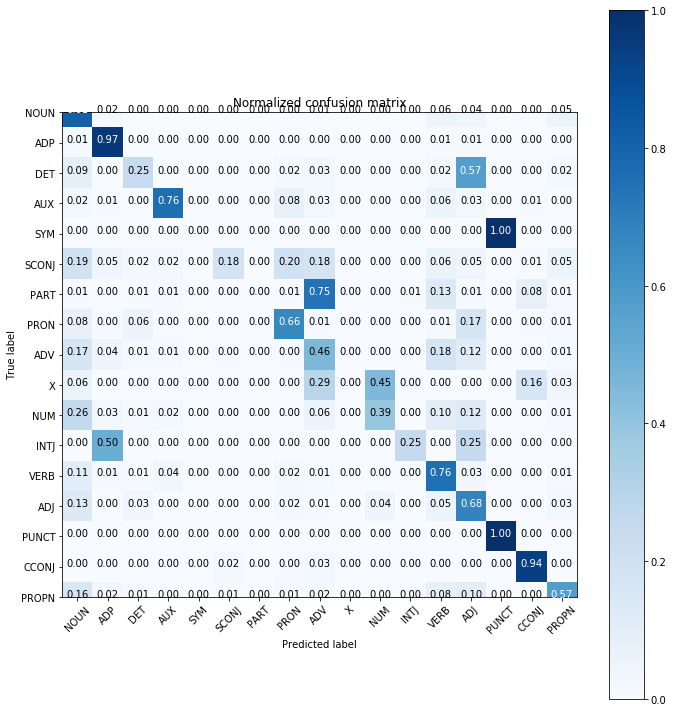

In [0]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')